## Machine learning Summative Assignment : Four perspective features for utilize Humor.
In this course work,
##### Affiliative humor
individuals who are high on this dimension tend to say funny things, to tell jokes, and to engage in spontaneous witty banter to amuse other, to facilitate relationships, and to reduce interpersonal tensions.This style humor is expected to be related to extraversion, cheerfulness and predominantly positive moods and motions.

##### Self-enhacing humor
This dimension involves a generally humorous outlook on life, a tendency to be frequently amused by the incongruities of life, and to maintain a humorous perspective even in the face of stress or adversity allows one to avoid negative emotions while maintaining a realistic perspective on a potentially aversive situation

##### Aggressive humor.
This relates to the use of sarcasm, teasing, ridicule, derision,‘‘put-down,’’ or disparagement humor (Zillman, 1983).It also includes the use of humor to manipulate others by means of an implied threat of ridicule

##### Self-defeating humor
This dimension involves excessively self-disparaging humor, attempts to amuse others by doing or saying funny things at ones own expense
as a means of ingratiating oneself or gaining approval, allowing oneself to be the
‘‘butt’’ of others humor, and laughing along with others when being ridiculed or disparaged

We hypothesized that these four dimensions of humor would be relatively independent of one another, although we expected some positive correlations among
them, due to the hypothesized overlap between the various functions of humor noted
previously.

#### This data was collection with an interactive online version of the Humor Styles Questionnaire from Martin, R. A., Puhlik-Doris, P., Larsen, G., Gray, J., & Weir, K. (2003). Individual differences in uses of humor and their relation to psychological well-being: Development of the Humor Styles Questionnaire. Journal of Research in Personality, 37, 48-75.

#### Each individual data contains 39 columns which are describe below:

##### Q1 - Q32:  were statements rated on a five point scale where 1=Never or very rarely true, 2=Rarely true, 3= Sometimes true, 4= Often true, 5=Very often or always true (-1=did not select an answer).

##### age: was entered as as text then parsed to an interger.
##### gender: chosen from drop down list (1=male, 2=female, 3=other)
##### accuracy: how accurate they thought their answers were on a scale from 0 to 100, answers were entered as text and parsed to an integer. They were instructed to enter a 0 if they did not want to be included in research.	

##### affiliative. round(((6-$_POST['Q1']) + $_POST['Q5'] + (6-$_POST['Q9']) + $_POST['Q13'] + (6-$_POST['Q17']) + $_POST['Q21'] + (6-$_POST['Q25']) + (6-$_POST['Q29']))/8, 1);
##### selfenhancing. round(($_POST['Q2'] + $_POST['Q6'] + $_POST['Q10'] + $_POST['Q14'] + $_POST['Q18'] + $_POST['Q22'] + $_POST['Q26'] + $_POST['Q30'])/8,1);
##### aggressive. round(($_POST['Q3']+ $_POST['Q7'] + $_POST['Q11'] + $_POST['Q15'] + $_POST['Q19'] + $_POST['Q23'] + $_POST['Q27'] + $_POST['Q31'])/8,1);
##### selfdefeating. round(($_POST['Q4'] + $_POST['Q8'] + $_POST['Q12'] + $_POST['Q16'] + $_POST['Q20'] + $_POST['Q24'] + $_POST['Q28'] + $_POST['Q32'])/8,1);

## Before start it is important to know that I have used 3 different code files for this coursework and combined them to one at the end, so it might make some confusion when checking, please make sure to go iteratively, and during the experiment i have also test on KNN module which have not include in the report. And the model KNN come first , then Random Tree, then Random Froest then XGboost then SVM, then 10 % outliers and accuracy 80% and above dataset , then accuracy with 70% or above.

### Data introduction
Utilized data was obtained from the Humor Styles Questionnaire from by Martin, R. A., Puhlik-Doris, P., Larsen, G., Gray, J., & Weir, K. (2003),which consist one datafile presented in CSV format.
With the column variables Q1-Q32 and affiliative,self-enhancing,agressive and self-defeating and age ,gender, accuracy.where accuracy means how accurate they thought their answers were on a scale from 0 to 100, answers were entered as text and parsed to an integer. They were instructed to enter a 0 if they did not want to be included in research.	 

### Data preparation


In [1]:

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
import seaborn as sns 
import plotly.express as px 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import graphviz
import os 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score,classification_report, accuracy_score, plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_curve
import matplotlib.ticker as mtick
from sklearn.model_selection import RandomizedSearchCV
from sklearn .model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [2]:
data=pd.read_csv('data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Q1             1071 non-null   int64  
 1   Q2             1071 non-null   int64  
 2   Q3             1071 non-null   int64  
 3   Q4             1071 non-null   int64  
 4   Q5             1071 non-null   int64  
 5   Q6             1071 non-null   int64  
 6   Q7             1071 non-null   int64  
 7   Q8             1071 non-null   int64  
 8   Q9             1071 non-null   int64  
 9   Q10            1071 non-null   int64  
 10  Q11            1071 non-null   int64  
 11  Q12            1071 non-null   int64  
 12  Q13            1071 non-null   int64  
 13  Q14            1071 non-null   int64  
 14  Q15            1071 non-null   int64  
 15  Q16            1071 non-null   int64  
 16  Q17            1071 non-null   int64  
 17  Q18            1071 non-null   int64  
 18  Q19     

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


In [3]:
data.describe()#age mean looks wrong in average we have 70 year old which is not correct, and max age is wrong

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,...,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,2.025210,3.342670,3.078431,2.833800,3.599440,4.152194,3.277311,2.535014,2.582633,2.869281,...,3.945845,2.767507,2.838469,4.010644,3.375537,2.956583,2.762745,70.966387,1.455649,87.542484
std,1.075782,1.112898,1.167877,1.160252,1.061281,0.979315,1.099974,1.231380,1.224530,1.205013,...,1.135189,1.309601,1.233889,0.708479,0.661533,0.410870,0.645982,1371.989249,0.522076,12.038483
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,1.300000,0.000000,0.000000,0.000000,14.000000,0.000000,2.000000
25%,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.600000,2.900000,2.800000,2.300000,18.500000,1.000000,80.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,...,4.000000,3.000000,3.000000,4.100000,3.400000,3.000000,2.800000,23.000000,1.000000,90.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,...,5.000000,4.000000,4.000000,4.500000,3.800000,3.300000,3.100000,31.000000,2.000000,95.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.100000,5.000000,5.000000,5.000000,44849.000000,3.000000,100.000000


In [4]:
'''Step 1 check the dumplicated data'''
print('The dupilicated data are:',data.duplicated().sum()) # returns no duplicated

The dupilicated data are: 0


In [5]:
'''Step 2 Missing value'''
#-1 means did not select an answer in the questions so we need check all the -1 values in the Q1-Q32

def OutlierCheck(data,Question,OtherV):
    '''
    #Inputs:
    #the data and number of question interesting
    #use OtherV to check if there are other values other than -1 and 1 to 5
     
    #Returns:
    #Two list: MissingValue is the position of the data rather than 1-5
    #CorrespodingQuestion is the column for that missing value
    '''
    MissingValue=[]
    CorrespodingQuestion=[]
    OtherValue=[]
    for i in range(1,Question+1):
        Q='Q'
        Qdata=data[Q+str(i)]
        Qdata=np.array(Qdata)
        Qlist=[1.0,2.0,3.0,4.0,5.0]
        count=0
        for j in range(len(Qdata)):
            if Qdata[j] not in Qlist:
                if Qdata[j]!=-1:
                    OtherValue.append(Qdata[j])
                MissingValue.append(j)
                CorrespodingQuestion.append(i)
            else:
                count+=1
            j+=1
        i=i+1
    if OtherV:
        return MissingValue,CorrespodingQuestion,OtherValue
    else:
        return MissingValue,CorrespodingQuestion
        
    

Numpydata1=np.array(data)#transfer the format of the data to numpy array 

print('The missing value is :',OutlierCheck(data,32,False))#should have no other value rather than -1 and 1 to 5 
#this will gives the missing data position
print('The Q data that witout an answer :',Numpydata1[773,4])#just double check 

print(np.shape(Numpydata1))#total of size 1071 datas and 39 columns
mean=data.describe().loc['mean']#39 columns means 
SumData=[element*1071 for element in mean]
Qmean=SumData[0:32] # we only need the first 32 columns 
#since this summation contains -1 in the data we first work out how many -1 
#say m here in each of the question's data
#then we take mean- m*(-1) divided by (1071-m) and round up to nerest integer as an input for our missing values (-1's)
#we want replace the missing values by the mean value 

MissingValue1,CorrespodingQ1=OutlierCheck(data,32,False)
df = pd.DataFrame({'freq':CorrespodingQ1})
Mvalues=list(df['freq'].value_counts().sort_index())#work out how many -1 it has for each of the Question
print('How many missing values the individual variable contains :',Mvalues)
print(len(Mvalues))
print(Qmean)
QnewMean=[]
for i in range(len(Mvalues)):
    if Mvalues[i]==0:
        QnewMean.append(round(Qmean[i]/1071))
    else:
        QnewMean.append(round((Qmean[i]-Mvalues[i]*(-1))/(1071-Mvalues[i])))#mean value and round to nearest integer

print('The length should be 32 and the correspoding mean values ')
print(len(QnewMean),QnewMean) # the length should be 32 since we have 32 question
#Then replace each -1's to the correspoding Question new mean value
for i in range(len(MissingValue1)):
    Numpydata1[MissingValue1[i],CorrespodingQ1[i]-1]=QnewMean[CorrespodingQ1[i]-1]#change the -1 by correspoding round up mean values
print('The Q data that witout an answer :',Numpydata1[773,4])

The missing value is : ([758, 958, 1025, 45, 1009, 1025, 723, 1025, 1025, 773, 1025, 85, 1025, 25, 1025, 236, 465, 534, 551, 633, 983, 1025, 3, 264, 1004, 1025, 696, 894, 1025, 806, 1025, 149, 1025, 107, 1025, 354, 715, 787, 1025, 45, 221, 350, 681, 683, 715, 1025, 121, 715, 730, 897, 1025, 55, 178, 498, 500, 526, 590, 715, 787, 878, 897, 954, 1025, 1047, 490, 715, 778, 813, 897, 1025, 501, 715, 813, 1025, 501, 529, 715, 813, 897, 1025, 59, 261, 501, 646, 715, 813, 1025, 1037, 289, 501, 704, 715, 770, 813, 1025, 451, 501, 528, 648, 655, 715, 813, 1025, 435, 449, 501, 611, 715, 813, 1025, 12, 117, 164, 447, 501, 715, 813, 979, 1025, 1052, 189, 501, 604, 715, 813, 857, 894, 1025, 1043, 501, 715, 806, 813, 1025, 501, 715, 813, 1025, 501, 638, 693, 715, 813, 1025, 315, 375, 481, 501, 535, 715, 813, 1025, 481, 501, 504, 535, 715, 813, 1025, 715, 813, 1025], [1, 1, 1, 2, 2, 2, 3, 3, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 14, 14, 15, 

In [6]:
#so now there should be no missing values in Q1-Q32
#Let change back to dataframe 
column=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20'
         ,'Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31','Q32']
QuestionData=pd.DataFrame(Numpydata1[:,0:32],columns=column)
print(('The new missing value check :',OutlierCheck(QuestionData,32,False)))#check so no other value that are not in scale 
print(QuestionData.head(5))#should be okay we know calculate the affiliative,seltenhacing, agressive and self defeating

('The new missing value check :', ([], []))
    Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  Q10  ...  Q23  Q24  Q25  Q26  \
0  2.0  2.0  3.0  1.0  4.0  5.0  4.0  3.0  4.0  3.0  ...  3.0  2.0  1.0  3.0   
1  2.0  3.0  2.0  2.0  4.0  4.0  4.0  3.0  4.0  3.0  ...  4.0  2.0  2.0  5.0   
2  3.0  4.0  3.0  3.0  4.0  4.0  3.0  1.0  2.0  4.0  ...  4.0  3.0  2.0  4.0   
3  3.0  3.0  3.0  4.0  3.0  5.0  4.0  3.0  3.0  4.0  ...  2.0  4.0  2.0  4.0   
4  1.0  4.0  2.0  2.0  3.0  5.0  4.0  1.0  4.0  4.0  ...  3.0  1.0  1.0  5.0   

   Q27  Q28  Q29  Q30  Q31  Q32  
0  2.0  4.0  2.0  4.0  2.0  2.0  
1  1.0  2.0  4.0  4.0  3.0  1.0  
2  3.0  3.0  2.0  5.0  4.0  2.0  
3  2.0  2.0  4.0  5.0  3.0  3.0  
4  2.0  3.0  2.0  5.0  4.0  2.0  

[5 rows x 32 columns]


In [7]:
#we now use Q1-Q32 to calculate the affiliative,self-enhacing,aggressive,self-defeating variables and save it as a new column
#to QuestionData
def affiliativeV(Data):
    return round(((6-Data['Q1'])+Data['Q5']+(6-Data['Q9'])+Data['Q13']+(6-Data['Q17'])+Data['Q21']+(6-Data['Q25'])+(6-Data['Q29']))/8,1)


def selfenhacingV(Data):
    return round((Data['Q2']+Data['Q6']+Data['Q10']+Data['Q14']+Data['Q18']+Data['Q22']+Data['Q26']+Data['Q30'])/8,1)

def aggressiveV(Data):
    return round((Data['Q3']+Data['Q7']+Data['Q11']+Data['Q15']+Data['Q19']+Data['Q23']+Data['Q27']+Data['Q31'])/8,1)

def selfdefeatingV(Data):
    return round((Data['Q4']+Data['Q8']+Data['Q12']+Data['Q16']+Data['Q20']+Data['Q24']+Data['Q28']+Data['Q32'])/8,1)

QuestionData['affiliative']=QuestionData.apply(lambda Data:affiliativeV(Data),axis=1)
QuestionData['selfenhacing']=QuestionData.apply(lambda Data:selfenhacingV(Data),axis=1)
QuestionData['aggressive']=QuestionData.apply(lambda Data:aggressiveV(Data),axis=1)
QuestionData['selfdefeating']=QuestionData.apply(lambda Data:selfdefeatingV(Data),axis=1)

QuestionData.head()#let check if the value has been calculated 

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q27,Q28,Q29,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,3.0,...,2.0,4.0,2.0,4.0,2.0,2.0,4.0,3.5,3.0,2.2
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,...,1.0,2.0,4.0,4.0,3.0,1.0,3.2,3.5,3.2,2.4
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.0,4.0,...,3.0,3.0,2.0,5.0,4.0,2.0,3.9,3.9,3.1,2.2
3,3.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0,...,2.0,2.0,4.0,5.0,3.0,3.0,3.2,4.0,2.9,3.2
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.0,4.0,...,2.0,3.0,2.0,5.0,4.0,2.0,4.1,4.1,2.9,2.0


In [8]:
#now add the other variables age, accuracy and sex .
OriginalData=pd.read_csv('data.csv')

QuestionData['age']=OriginalData['age']
QuestionData['gender']=OriginalData['gender']
QuestionData['accuracy']=OriginalData['accuracy']

In [9]:
QuestionData.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,3.0,...,4.0,2.0,2.0,4.0,3.5,3.0,2.2,25,2,100
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,...,4.0,3.0,1.0,3.2,3.5,3.2,2.4,44,2,90
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.0,4.0,...,5.0,4.0,2.0,3.9,3.9,3.1,2.2,50,1,75
3,3.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0,...,5.0,3.0,3.0,3.2,4.0,2.9,3.2,30,2,85
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.0,4.0,...,5.0,4.0,2.0,4.1,4.1,2.9,2.0,52,1,80


In [10]:
OriginalData.head()
#we can comapre them

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


In [11]:
#let now look at other variables age,gender and accuracy
QuestionData.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,...,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,2.033613,3.353875,3.085901,2.837535,3.608777,4.161531,3.284781,2.561158,2.597572,2.880486,...,3.983193,2.793651,2.849673,3.997479,3.378338,2.958543,2.761345,70.966387,1.455649,87.542484
std,1.063757,1.088977,1.154470,1.154322,1.042587,0.953623,1.084359,1.198030,1.204956,1.187435,...,1.050900,1.273525,1.217012,0.709365,0.643223,0.384099,0.634079,1371.989249,0.522076,12.038483
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.200000,1.000000,1.000000,1.000000,14.000000,0.000000,2.000000
25%,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.600000,3.000000,2.800000,2.400000,18.500000,1.000000,80.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,...,4.000000,3.000000,3.000000,4.100000,3.500000,3.000000,2.800000,23.000000,1.000000,90.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,...,5.000000,4.000000,4.000000,4.500000,3.800000,3.200000,3.100000,31.000000,2.000000,95.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,44849.000000,3.000000,100.000000


## The problem here :
#### From the dataframe we can see the age colomns has mean value 70.966387 with the maximum value 44849 this leads the standard variance are extremely high 1371.989249,on the other hand we have min 0.000000 in gender which is not correct as we have not specify any meaning for 0's since (1=male,2=female,3=other)

## Step 3 Outlier handling

#### We now find the outliers and fix the data for features age,gender,accuracy

 1    1038
-1      33
Name: IF, dtype: int64
(array([  23,   27,   33,   44,   51,   69,  106,  183,  293,  303,  317,
        344,  348,  434,  438,  462,  465,  501,  574,  632,  653,  667,
        671,  704,  813,  834,  897,  957,  963,  997, 1006, 1015, 1025],
      dtype=int64),) (1, 33)


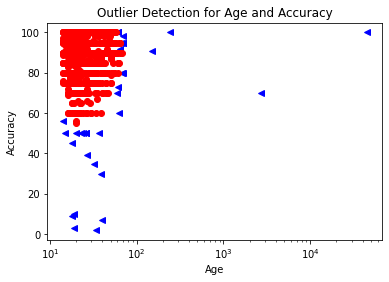

[23, 27, 33, 51, 183, 293, 303, 344, 434, 632, 957]

In [12]:
'For age and accuracy running Isolation Tree for outlier check'
#use outlier detection for isolation forest.
FdimData=QuestionData[['age','accuracy']].copy()
X=FdimData.values
DetectionModel=IsolationForest(contamination=0.03)
DetectionModel.fit(X)
pred=DetectionModel.predict(X)
data=QuestionData.copy()
data['IF']=pd.Series(pred)
position=np.where(pred<0)
print(data['IF'].value_counts())
print(position,np.shape(position))
plt.figure()
plt.plot(X[:,0][np.where(pred==-1)],X[:,1][np.where(pred==-1)],'b<',\
    X[:,0][np.where(pred==1)],X[:,1][np.where(pred==1)],'ro')
plt.xlabel('Age')
plt.ylabel('Accuracy')
plt.title('Outlier Detection for Age and Accuracy')
plt.xscale('log')
plt.show()
#for better visualization we need see the log scale
[23,27,33,51,183,293,303,344,434,632,957]

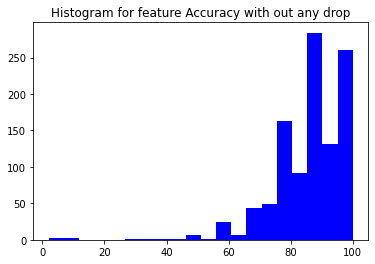

In [13]:
'''Generate the accuracy histogram'''
Accuracy=QuestionData['accuracy']
plt.hist(Accuracy,bins=20,color='blue')
plt.title('Histogram for feature Accuracy with out any drop')
plt.show()

#### From above plot, it implies it is reasonable to get rid of the accuracy below 60 % we can test the performance later, and for age there are four outlier that are obvious, we can save them in to a new dataframe and train a regression tasks to fit those values 

The idex are:  [44, 69, 106, 278, 317, 413, 434, 438, 462, 653, 667, 671, 813, 834, 897, 997, 1006, 1015, 1025]
Correspoding accuracy values [50, 9, 50, 56, 35, 55, 45, 50, 50, 39, 50, 10, 30, 7, 3, 50, 56, 50, 2]
19


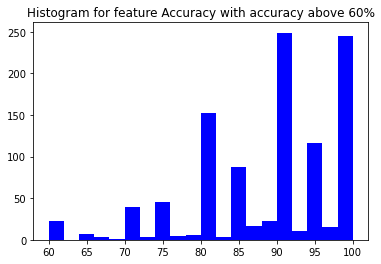

In [14]:
#Accuracy less than 60%
Accuracy=QuestionData['accuracy']
Accuracy=np.array(Accuracy)
outlierlist1=[]
value1=[]
count=-1
Accuracy=np.array(Accuracy)
for i in range(len(Accuracy)):
    if Accuracy[i]<60:
        count=count+1
        outlierlist1.append(i)
        value1.append(Accuracy[i])
        if len(outlierlist1)==1:
            Accuracy2=np.delete(Accuracy,i)
        else:
            Accuracy2=np.delete(Accuracy2,i-count)

print('The idex are: ',outlierlist1)
print('Correspoding accuracy values',value1)
print(len(value1))
plt.hist(Accuracy2,bins=20,color='blue')
plt.title('Histogram for feature Accuracy with accuracy above 60%')
plt.show()

In [15]:
QuestionData60=QuestionData.copy()#now gen|erate a new dataset with accuracy above 60 

In [16]:
#after remove all data that below 60% accuracy we get [23,33,293,303,344,632,957] as the outlier for age
#get the unknow data for train later all 0's
AgeOutliers=QuestionData60.iloc[[23,33,293,303,344,632,957],:]
AgeOutliers.index=range(len(AgeOutliers.index))
AgeOutliers#save for later use 

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
0,3.0,4.0,1.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,...,5.0,4.0,3.0,3.8,3.8,2.6,3.8,70,2,80
1,1.0,5.0,4.0,4.0,4.0,5.0,3.0,4.0,2.0,5.0,...,5.0,1.0,4.0,4.6,4.6,3.2,4.0,69,1,98
2,1.0,3.0,4.0,2.0,3.0,5.0,3.0,3.0,2.0,3.0,...,5.0,1.0,3.0,4.4,3.8,2.5,2.8,242,1,100
3,2.0,5.0,4.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0,...,5.0,1.0,4.0,4.5,4.1,3.4,3.9,151,1,91
4,2.0,3.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,2.0,3.2,3.4,3.0,2.8,67,1,80
5,2.0,4.0,4.0,2.0,4.0,5.0,4.0,2.0,2.0,4.0,...,5.0,4.0,2.0,4.0,4.0,3.4,2.2,2670,2,70
6,1.0,5.0,2.0,1.0,3.0,4.0,4.0,5.0,3.0,4.0,...,5.0,5.0,1.0,4.2,3.9,2.4,2.1,44849,0,100


In [17]:
#Let now drop the data that are less than 60%
QuestionData60=QuestionData60.drop([44, 69, 106, 278, 317, 413, 434, 438, 462, 653, 667, 671, 813, 834, 897, 997, 1006, 1015, 1025],0,inplace=False)
QuestionData60

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,3.0,...,4.0,2.0,2.0,4.0,3.5,3.0,2.2,25,2,100
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,...,4.0,3.0,1.0,3.2,3.5,3.2,2.4,44,2,90
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.0,4.0,...,5.0,4.0,2.0,3.9,3.9,3.1,2.2,50,1,75
3,3.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0,...,5.0,3.0,3.0,3.2,4.0,2.9,3.2,30,2,85
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.0,4.0,...,5.0,4.0,2.0,4.1,4.1,2.9,2.0,52,1,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,3.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,3.0,4.0,...,4.0,4.0,4.0,2.5,3.2,2.9,3.0,18,2,95
1067,1.0,4.0,5.0,2.0,4.0,4.0,1.0,2.0,2.0,5.0,...,4.0,1.0,2.0,4.8,3.9,2.5,2.4,31,1,95
1068,1.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,4.0,3.0,...,4.0,1.0,5.0,4.4,3.9,3.0,4.2,15,1,95
1069,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,...,4.0,3.0,3.0,3.1,3.6,2.9,2.8,21,2,87


In [18]:
#Drop the age outliers
QuestionData60=QuestionData60.drop([23,33,293,303,344,632,957],0,inplace=False)
QuestionData60

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,3.0,...,4.0,2.0,2.0,4.0,3.5,3.0,2.2,25,2,100
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,...,4.0,3.0,1.0,3.2,3.5,3.2,2.4,44,2,90
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.0,4.0,...,5.0,4.0,2.0,3.9,3.9,3.1,2.2,50,1,75
3,3.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0,...,5.0,3.0,3.0,3.2,4.0,2.9,3.2,30,2,85
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.0,4.0,...,5.0,4.0,2.0,4.1,4.1,2.9,2.0,52,1,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,3.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,3.0,4.0,...,4.0,4.0,4.0,2.5,3.2,2.9,3.0,18,2,95
1067,1.0,4.0,5.0,2.0,4.0,4.0,1.0,2.0,2.0,5.0,...,4.0,1.0,2.0,4.8,3.9,2.5,2.4,31,1,95
1068,1.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,4.0,3.0,...,4.0,1.0,5.0,4.4,3.9,3.0,4.2,15,1,95
1069,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,...,4.0,3.0,3.0,3.1,3.6,2.9,2.8,21,2,87


In [19]:
# now let use regression to predict those age values 
ydd=QuestionData60.iloc[:,36]
Xdd=QuestionData60.iloc[:,:-4]
Xdd['accuracy']=QuestionData60['accuracy']
test=AgeOutliers.iloc[:,:-4]
test['accuracy']=AgeOutliers['accuracy']
#linear regression
LinearR=LinearRegression().fit(Xdd,ydd)
Y_pred=LinearR.predict(Xdd)
LinearError=mean_squared_error(ydd,Y_pred,squared=False)
MeanError=mean_squared_error(ydd,[ydd.mean()]*len(ydd),squared=False)
MedianError=mean_squared_error(ydd, [ydd.median()]*len(ydd), squared=False)
#Ridge
RidgeR=linear_model.Lasso(alpha=0.1).fit(Xdd,ydd)
Y_predRidge=RidgeR.predict(Xdd)
RidgeError=mean_squared_error(ydd,Y_predRidge,squared=False)

#lasso
LassoR=linear_model.Lasso(alpha=0.1).fit(Xdd,ydd)
Y_predLasso=LassoR.predict(Xdd)
LassoError=mean_squared_error(ydd,Y_predLasso,squared=False)

fig = px.bar(y=["Linear","Mean","Median","Lasso","Ridge"], \
             x=[LinearError,MeanError,MedianError,LassoError,RidgeError],\
             title="Regression errors",\
             labels={"x": "Error","y": "Regression method"},orientation='h')


             
fig.add_hline(y=min([LinearError,MeanError,MedianError,LassoError,RidgeError]))
fig.show()

'''
All regression methods perform slightly better than using median/mean as replacements.

Among all regression methods, Linear and Ridge achieved the lowest errors (however, the difference between all regression error is very small).

We will use the prediction of the Linear model.
'''

AgePred=LinearR.predict(test)
AgeOutliers['age']=np.round(AgePred)
AgeOutliers

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
0,3.0,4.0,1.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,...,5.0,4.0,3.0,3.8,3.8,2.6,3.8,29.0,2,80
1,1.0,5.0,4.0,4.0,4.0,5.0,3.0,4.0,2.0,5.0,...,5.0,1.0,4.0,4.6,4.6,3.2,4.0,24.0,1,98
2,1.0,3.0,4.0,2.0,3.0,5.0,3.0,3.0,2.0,3.0,...,5.0,1.0,3.0,4.4,3.8,2.5,2.8,30.0,1,100
3,2.0,5.0,4.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0,...,5.0,1.0,4.0,4.5,4.1,3.4,3.9,27.0,1,91
4,2.0,3.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,2.0,3.2,3.4,3.0,2.8,31.0,1,80
5,2.0,4.0,4.0,2.0,4.0,5.0,4.0,2.0,2.0,4.0,...,5.0,4.0,2.0,4.0,4.0,3.4,2.2,30.0,2,70
6,1.0,5.0,2.0,1.0,3.0,4.0,4.0,5.0,3.0,4.0,...,5.0,5.0,1.0,4.2,3.9,2.4,2.1,30.0,0,100


In [20]:
#append to our dataset
QuestionData60=QuestionData60.append(AgeOutliers)
QuestionData60.index=range(len(QuestionData60.index))
QuestionData60

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,3.0,...,4.0,2.0,2.0,4.0,3.5,3.0,2.2,25.0,2,100
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,...,4.0,3.0,1.0,3.2,3.5,3.2,2.4,44.0,2,90
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.0,4.0,...,5.0,4.0,2.0,3.9,3.9,3.1,2.2,50.0,1,75
3,3.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0,...,5.0,3.0,3.0,3.2,4.0,2.9,3.2,30.0,2,85
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.0,4.0,...,5.0,4.0,2.0,4.1,4.1,2.9,2.0,52.0,1,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,1.0,3.0,4.0,2.0,3.0,5.0,3.0,3.0,2.0,3.0,...,5.0,1.0,3.0,4.4,3.8,2.5,2.8,30.0,1,100
1048,2.0,5.0,4.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0,...,5.0,1.0,4.0,4.5,4.1,3.4,3.9,27.0,1,91
1049,2.0,3.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,2.0,3.2,3.4,3.0,2.8,31.0,1,80
1050,2.0,4.0,4.0,2.0,4.0,5.0,4.0,2.0,2.0,4.0,...,5.0,4.0,2.0,4.0,4.0,3.4,2.2,30.0,2,70


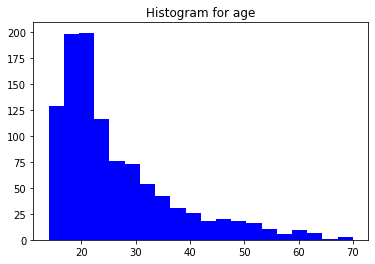

In [21]:
#let plot histogram for age now 
AgeData=np.array(QuestionData60['age'])
plt.hist(AgeData,bins=20,color='blue')
plt.title('Histogram for age')
plt.show()


#### Should looks okay now, although there are few example near 70, but their accuracy are very high, therefore it is not an outliers

we have 5 outliers which with value 0s
Let set those to class unknow first 
1047
{'Unknow': 5, 'Male': 573, 'Female': 466, 'Other': 8}
The position for that outlier is : [148, 611, 819, 822, 1051]
The coreespoding value is :, [0, 0, 0, 0, 0]


<ipython-input-22-87d871542b7c>:35: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



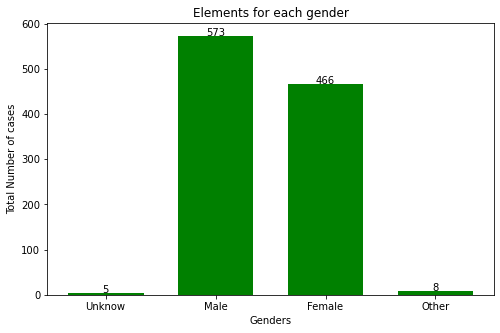

In [22]:
'Let move on to gender data'

GenderData=QuestionData60['gender']
GenderData=np.array(GenderData)
GenderList=[1.0,2.0,3.0]
count=0
cvalues=[]
unknowPosition=[]
for i in range(len(GenderData)):
    if GenderData[i] not in GenderList:
        unknowPosition.append(i)
        cvalues.append(GenderData[i])
    else:
        count+=1
print('we have 5 outliers which with value 0s')
print('Let set those to class unknow first ')
print(count)#should be 1071-outliers so the data are in correct format   
GenderData2=QuestionData60['gender'].value_counts().sort_index()
GenderDict={'Unknow':GenderData2[0],'Male':GenderData2[1],'Female':GenderData2[2],'Other':GenderData2[3]}
#we creat a new index for 0's Unknow
fig2=plt.figure(figsize=(8,5))
print(GenderDict)
Gender=list(GenderDict.keys())
value=list(GenderDict.values())

def addlabels2plot(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(Gender,value,color='Green',width=0.69)
addlabels2plot(Gender,value)
plt.xlabel('Genders')
plt.ylabel('Total Number of cases')
plt.title('Elements for each gender')
fig2.show()

print('The position for that outlier is :',unknowPosition)
print('The coreespoding value is :,',cvalues)
#print(QuestionData60.iloc[822,32:39])

### Let work out the correlation between each variable 
#### use Kernel density estimate to plot the shape of a distribution across all variables 

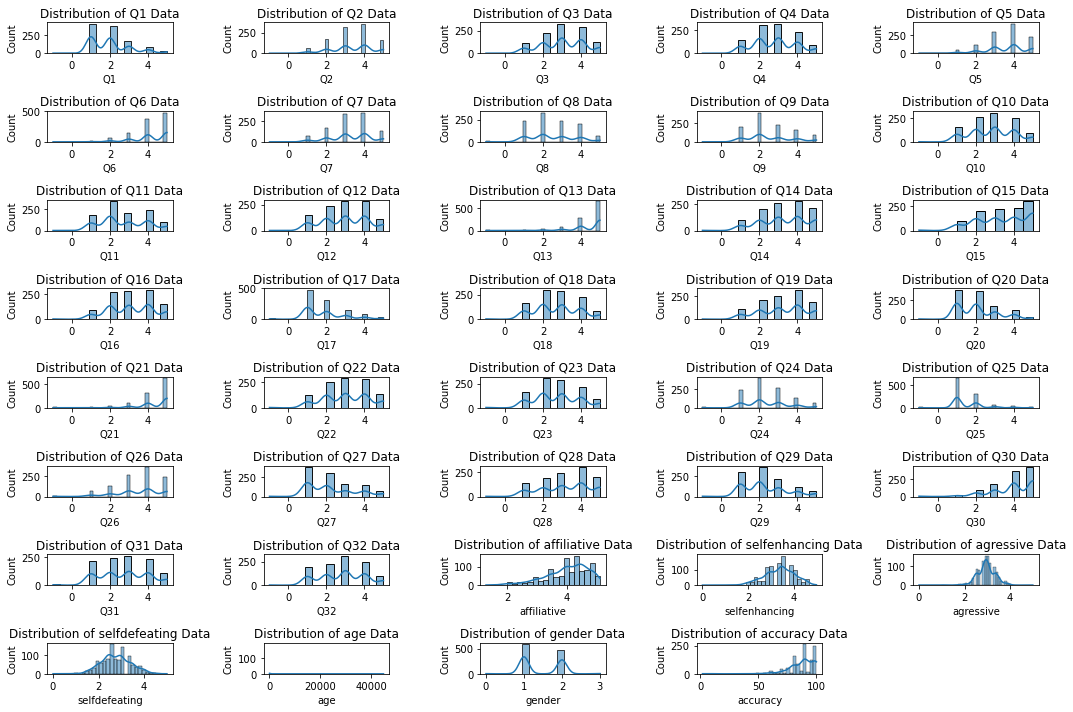

In [23]:
OriginalData=pd.read_csv('data.csv')
plt.figure(figsize=(15,10))
for i,col in enumerate(OriginalData.columns,1):
    plt.subplot(8,5,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(OriginalData[col],kde=True)
    plt.tight_layout()
    plt.plot()

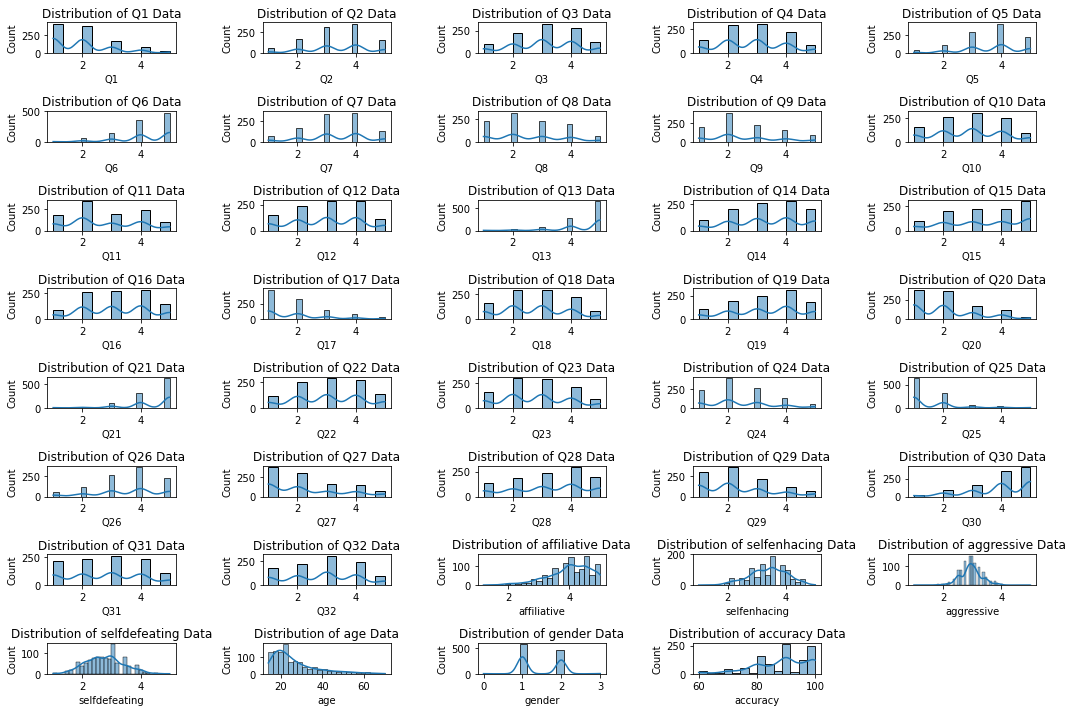

In [24]:
#for Mudified data 
plt.figure(figsize=(15,10))
for i,col in enumerate(QuestionData60.columns,1):
    plt.subplot(8,5,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(QuestionData60[col],kde=True)
    plt.tight_layout()
    plt.plot()

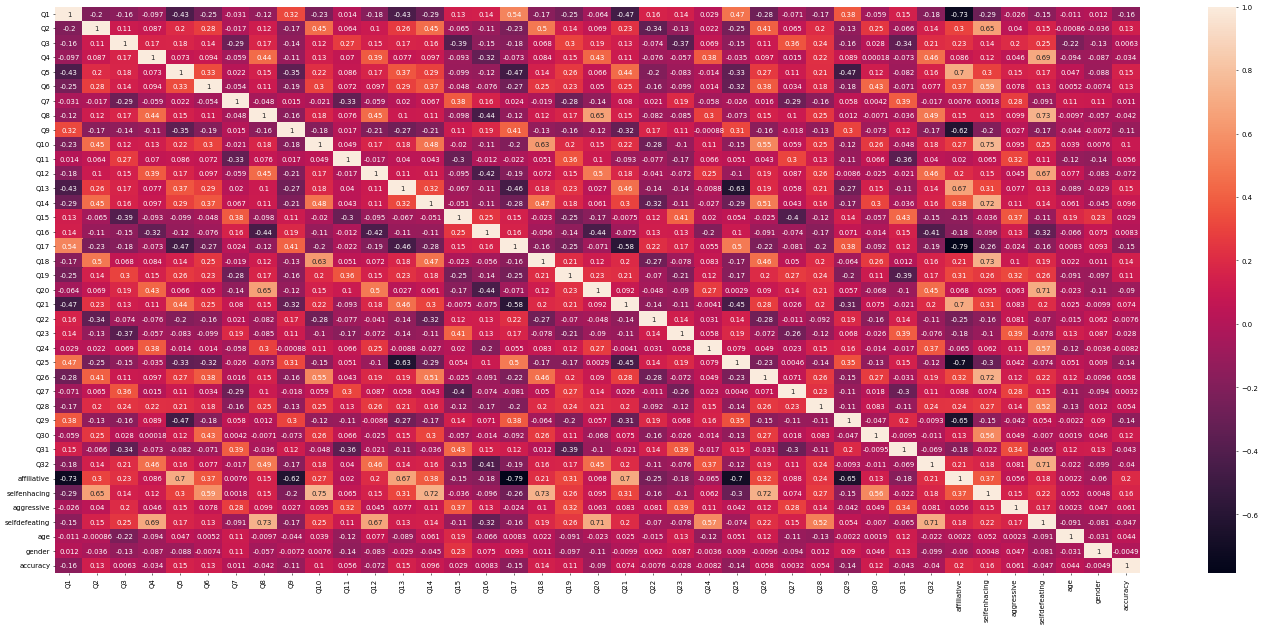

In [25]:
plt.figure(figsize=(35,15),dpi=50)
sns.heatmap(QuestionData60.corr(),annot=True)#the correlation map around all features

In [26]:
QuestionData60.corr()['gender'].sort_values(ascending=False)
#we can see the correlation are not very high

gender           1.000000
Q15              0.233400
Q31              0.125530
Q7               0.106851
Q17              0.093492
Q29              0.089516
Q23              0.087213
Q16              0.075044
Q22              0.062362
aggressive       0.047355
Q30              0.046178
Q28              0.011981
Q1               0.011587
Q18              0.010575
Q25              0.009024
Q10              0.007571
selfenhacing     0.004756
Q24             -0.003634
accuracy        -0.004891
Q9              -0.007177
Q6              -0.007436
Q26             -0.009596
Q21             -0.009946
Q13             -0.029496
age             -0.030567
Q2              -0.035925
Q14             -0.045222
Q8              -0.056826
affiliative     -0.059921
selfdefeating   -0.081438
Q12             -0.083312
Q4              -0.087320
Q5              -0.087974
Q27             -0.094285
Q19             -0.097399
Q32             -0.099278
Q20             -0.107801
Q3              -0.128157
Q11         

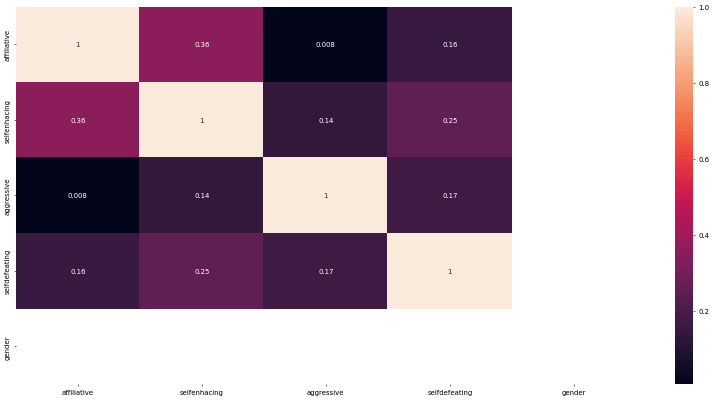

In [27]:
#four dim humor 
FdimData=QuestionData60[['affiliative','selfenhacing','aggressive','selfdefeating','gender']].copy()

MaleData=FdimData[FdimData['gender']==1]
FemaleData=FdimData[FdimData['gender']==2]
plt.figure(figsize=(20,10),dpi=50)
sns.heatmap(MaleData.corr(),annot=True)#the correlation map around all features

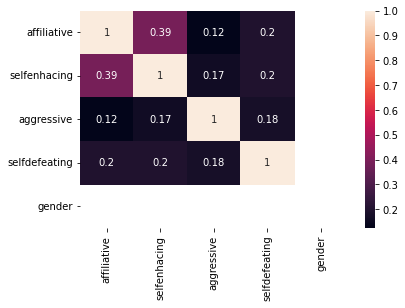

In [28]:
sns.heatmap(FemaleData.corr(),annot=True)#the correlation map around all features

In [29]:
QuestionData60.describe()
#we can compare the score between male and female by running an independent sample t-test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,...,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,2.025665,3.357414,3.084601,2.837452,3.615019,4.165399,3.292776,2.562738,2.596958,2.876426,...,3.983840,2.794677,2.849810,4.003517,3.381179,2.960741,2.762833,26.251901,1.453422,88.461027
std,1.062422,1.089528,1.156404,1.157117,1.042888,0.954343,1.079973,1.199770,1.205407,1.189846,...,1.053617,1.276163,1.217643,0.707670,0.642624,0.381854,0.634631,10.855869,0.522307,9.651166
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.200000,1.000000,1.000000,1.000000,14.000000,0.000000,60.000000
25%,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.600000,3.000000,2.800000,2.400000,18.000000,1.000000,80.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,...,4.000000,3.000000,3.000000,4.100000,3.500000,3.000000,2.800000,22.500000,1.000000,90.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,...,5.000000,4.000000,4.000000,4.500000,3.900000,3.200000,3.100000,30.000000,2.000000,95.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,70.000000,3.000000,100.000000


#### Our main tasks is to understand the difference between male and female and try to do a binary classification, use 3 predictive models to predict the gender. 

In [30]:
#KNN model to find the classification for genders.
#Let first just get rid of the Unknow data from dataset
Data60=QuestionData60.copy()

In [31]:
Data60=QuestionData60.drop([148, 611, 819, 822, 1051],0,inplace=False)
Data60

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,3.0,...,4.0,2.0,2.0,4.0,3.5,3.0,2.2,25.0,2,100
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,...,4.0,3.0,1.0,3.2,3.5,3.2,2.4,44.0,2,90
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.0,4.0,...,5.0,4.0,2.0,3.9,3.9,3.1,2.2,50.0,1,75
3,3.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0,...,5.0,3.0,3.0,3.2,4.0,2.9,3.2,30.0,2,85
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.0,4.0,...,5.0,4.0,2.0,4.1,4.1,2.9,2.0,52.0,1,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,1.0,5.0,4.0,4.0,4.0,5.0,3.0,4.0,2.0,5.0,...,5.0,1.0,4.0,4.6,4.6,3.2,4.0,24.0,1,98
1047,1.0,3.0,4.0,2.0,3.0,5.0,3.0,3.0,2.0,3.0,...,5.0,1.0,3.0,4.4,3.8,2.5,2.8,30.0,1,100
1048,2.0,5.0,4.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0,...,5.0,1.0,4.0,4.5,4.1,3.4,3.9,27.0,1,91
1049,2.0,3.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,2.0,3.2,3.4,3.0,2.8,31.0,1,80


In [32]:
#get the unknow data for train later all 0's
UnknowData60=QuestionData60.iloc[[148, 611, 819, 822, 1051],:]
UnknowData60.index=range(len(UnknowData60.index))
UnknowData60#save for later use 

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,4.0,4.0,3.0,5.0,5.0,3.0,2.0,3.0,4.0,...,5.0,2.0,4.0,4.4,4.5,2.9,2.9,39.0,0,95
1,1.0,5.0,4.0,1.0,1.0,5.0,4.0,1.0,1.0,5.0,...,5.0,2.0,2.0,4.5,4.6,3.1,1.5,27.0,0,90
2,1.0,5.0,5.0,4.0,5.0,5.0,3.0,2.0,1.0,4.0,...,5.0,1.0,5.0,5.0,3.9,3.1,3.4,15.0,0,100
3,1.0,4.0,5.0,3.0,5.0,5.0,2.0,2.0,1.0,4.0,...,5.0,1.0,4.0,5.0,4.1,3.0,3.1,15.0,0,100
4,1.0,5.0,2.0,1.0,3.0,4.0,4.0,5.0,3.0,4.0,...,5.0,5.0,1.0,4.2,3.9,2.4,2.1,30.0,0,100


In [33]:
Data60.index=range(len(Data60.index))
Data60['gender'].replace(1, 'male',inplace=True)
Data60['gender'].replace(2, 'female',inplace=True)#change labels back to male and female
Data60['gender'].replace(3, 'other',inplace=True)


In [34]:
#to check the position of 'other' class and get rid of it 
GenderData=Data60['gender']
GenderData=np.array(GenderData)
GenderList=['female','male']
count=0
cvalues=[]
unknowPosition=[]
for i in range(len(GenderData)):
    if GenderData[i] not in GenderList:
        unknowPosition.append(i)
        cvalues.append(GenderData[i])
    else:
        count+=1
print('we have 8 outliers which with string other')
print('Let set those to class unknow first ')
print(count)

print('The position for that outlier is :',unknowPosition)
print('The coreespoding value is :,',cvalues)
print(Data60.iloc[130,37])

OtherData60=Data60.iloc[[132, 194, 211, 459, 543, 733, 805, 821],:]
OtherData60.index=range(len(OtherData60.index))
OtherData60#save for later use 

we have 8 outliers which with string other
Let set those to class unknow first 
1039
The position for that outlier is : [132, 194, 211, 459, 543, 733, 805, 821]
The coreespoding value is :, ['other', 'other', 'other', 'other', 'other', 'other', 'other', 'other']
male


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
0,1.0,4.0,2.0,5.0,1.0,5.0,4.0,3.0,3.0,4.0,...,5.0,3.0,2.0,3.2,4.2,3.1,3.5,38.0,other,90
1,2.0,3.0,1.0,3.0,4.0,4.0,1.0,4.0,2.0,3.0,...,5.0,2.0,2.0,4.5,3.4,2.4,3.1,27.0,other,72
2,4.0,5.0,3.0,3.0,4.0,5.0,2.0,4.0,5.0,3.0,...,4.0,1.0,2.0,3.0,3.8,2.6,3.5,20.0,other,90
3,4.0,1.0,2.0,1.0,3.0,5.0,3.0,1.0,4.0,1.0,...,4.0,5.0,1.0,2.5,2.2,3.0,1.6,30.0,other,100
4,1.0,3.0,1.0,1.0,4.0,5.0,3.0,2.0,4.0,4.0,...,5.0,3.0,1.0,4.2,3.5,3.0,2.4,24.0,other,95
5,2.0,4.0,1.0,2.0,1.0,4.0,1.0,1.0,5.0,1.0,...,4.0,5.0,1.0,3.5,3.0,3.6,2.0,24.0,other,90
6,2.0,4.0,3.0,3.0,3.0,4.0,2.0,1.0,1.0,5.0,...,5.0,2.0,4.0,4.5,4.0,2.5,2.1,21.0,other,80
7,3.0,2.0,3.0,3.0,2.0,4.0,2.0,3.0,4.0,2.0,...,5.0,3.0,2.0,2.6,3.2,2.9,2.6,19.0,other,80


In [35]:
Data60=Data60.drop([132, 194, 211, 459, 543, 733, 805, 821],0,inplace=False)#drop the 'other' data in gender
Data60.index=range(len(Data60.index))
Data60

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,3.0,...,4.0,2.0,2.0,4.0,3.5,3.0,2.2,25.0,female,100
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,...,4.0,3.0,1.0,3.2,3.5,3.2,2.4,44.0,female,90
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.0,4.0,...,5.0,4.0,2.0,3.9,3.9,3.1,2.2,50.0,male,75
3,3.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0,...,5.0,3.0,3.0,3.2,4.0,2.9,3.2,30.0,female,85
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.0,4.0,...,5.0,4.0,2.0,4.1,4.1,2.9,2.0,52.0,male,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,1.0,5.0,4.0,4.0,4.0,5.0,3.0,4.0,2.0,5.0,...,5.0,1.0,4.0,4.6,4.6,3.2,4.0,24.0,male,98
1035,1.0,3.0,4.0,2.0,3.0,5.0,3.0,3.0,2.0,3.0,...,5.0,1.0,3.0,4.4,3.8,2.5,2.8,30.0,male,100
1036,2.0,5.0,4.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0,...,5.0,1.0,4.0,4.5,4.1,3.4,3.9,27.0,male,91
1037,2.0,3.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,2.0,3.2,3.4,3.0,2.8,31.0,male,80


0       2
1       2
2       1
3       2
4       1
       ..
1034    1
1035    1
1036    1
1037    1
1038    2
Name: gender, Length: 1039, dtype: int64


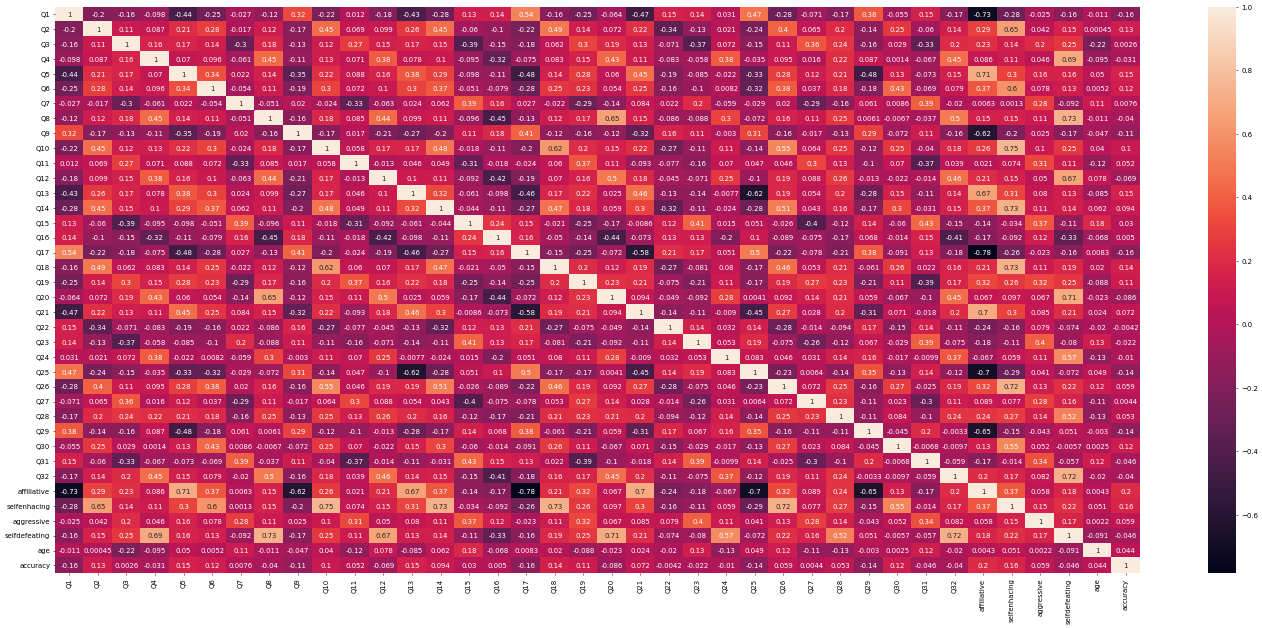

In [36]:
plt.figure(figsize=(35,15),dpi=50)
sns.heatmap(Data60.corr(),annot=True)#the correlation map around all features
Data60['gender'].replace('male', 1,inplace=True)
Data60['gender'].replace('female', 2,inplace=True)
Data60.corr()['gender'].sort_values(ascending=False)# check for the correlation
print(Data60['gender'])

In [37]:

FdimData2=Data60[['Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive', 'selfdefeating', 'age', 'accuracy','gender']].copy()
MaleData=FdimData2[FdimData2['gender']==1]
FemaleData=FdimData2[FdimData2['gender']==2]
Data60.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,...,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2.026949,3.352262,3.088547,2.841193,3.620789,4.159769,3.301251,2.564966,2.593840,2.870067,...,3.974013,2.795958,2.855630,4.004427,3.376997,2.961598,2.764870,26.263715,1.448508,88.430221
std,1.062246,1.087267,1.152970,1.155867,1.035307,0.957416,1.078208,1.198652,1.201557,1.187385,...,1.055447,1.273996,1.215009,0.705907,0.641680,0.382414,0.633816,10.892173,0.497581,9.659556
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.200000,1.000000,1.000000,1.000000,14.000000,1.000000,60.000000
25%,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.600000,3.000000,2.800000,2.400000,18.000000,1.000000,80.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,...,4.000000,3.000000,3.000000,4.100000,3.500000,3.000000,2.800000,22.000000,1.000000,90.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,...,5.000000,4.000000,4.000000,4.500000,3.800000,3.200000,3.100000,30.000000,2.000000,95.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,70.000000,2.000000,100.000000


In [38]:
mean1=MaleData.describe().loc['mean']#39 columns means1
std1=MaleData.describe().loc['std']
MaleData.describe()


,Q7,Q11,Q15,Q20,affiliative,selfenhacing,aggressive,selfdefeating,age,accuracy,gender
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.0
mean,3.169284,2.921466,3.123909,2.225131,4.026353,3.364398,2.943455,2.812914,26.575916,88.338569,1.0
std,1.077892,1.241380,1.332883,1.151131,0.711116,0.636635,0.377672,0.635412,10.808080,9.382538,0.0
min,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000,1.000000,1.000000,14.000000,60.000000,1.0
25%,3.000000,2.000000,2.000000,1.000000,3.600000,3.000000,2.800000,2.400000,19.000000,80.000000,1.0
50%,3.000000,3.000000,3.000000,2.000000,4.100000,3.400000,3.000000,2.800000,23.000000,90.000000,1.0
75%,4.000000,4.000000,4.000000,3.000000,4.500000,3.800000,3.200000,3.200000,31.000000,95.000000,1.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,70.000000,100.000000,1.0


In [39]:
mean2=FemaleData.describe().loc['mean']#39 columns means2
std2=FemaleData.describe().loc['std']
FemaleData.describe()



,Q7,Q11,Q15,Q20,affiliative,selfenhacing,aggressive,selfdefeating,age,accuracy,gender
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.0
mean,3.463519,2.540773,3.725322,1.980687,3.977468,3.392489,2.983906,2.705794,25.879828,88.542918,2.0
std,1.057365,1.207259,1.265626,1.021096,0.699268,0.648180,0.387407,0.627496,10.994160,9.998671,0.0
min,1.000000,1.000000,1.000000,1.000000,1.800000,1.800000,1.600000,1.000000,14.000000,60.000000,2.0
25%,3.000000,2.000000,3.000000,1.000000,3.500000,2.900000,2.800000,2.200000,18.000000,80.000000,2.0
50%,4.000000,2.000000,4.000000,2.000000,4.000000,3.500000,3.000000,2.600000,22.000000,90.000000,2.0
75%,4.000000,4.000000,5.000000,2.000000,4.500000,3.900000,3.200000,3.100000,30.000000,98.000000,2.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,4.800000,4.500000,69.000000,100.000000,2.0


In [40]:
print('Female',list(mean2))
print('Male',list(mean1))
print(list(std2))

Female [3.463519313304721, 2.540772532188841, 3.725321888412017, 1.98068669527897, 3.9774678111588035, 3.392489270386266, 2.983905579399142, 2.7057939914163107, 25.879828326180256, 88.54291845493562, 2.0]
Male [3.169284467713787, 2.9214659685863875, 3.1239092495636998, 2.225130890052356, 4.026352530541014, 3.3643979057591618, 2.943455497382198, 2.8129144851657935, 26.57591623036649, 88.33856893542757, 1.0]
[1.057365185820555, 1.2072588001388538, 1.2656259463008694, 1.0210959537625939, 0.6992675307826121, 0.648179771370304, 0.38740740647599825, 0.6274960587173073, 10.994159777708184, 9.99867105480291, 0.0]


In [41]:
import math
def tvalues(FemaleMean,MaleMean,MaleStd,FemaleStd,n1,n2):
    t=[]
    for i in range(len(FemaleMean)):
        t.append((-FemaleMean[i]+MaleMean[i])/math.sqrt((MaleStd[i]**2/n1)+(FemaleStd[i]**2/n2)))
    return t 

print(tvalues(mean2,mean1,std1,std2,573,466))

[-4.422283675013222, 4.991430115885419, -7.437985103692119, 3.623887191770239, 1.1122161494613303, -0.7003351070518105, -1.6927851847342354, 2.7212293969672547, 1.0227236215114615, -0.33678297952248804, -inf]


<ipython-input-41-2a1e0a00f31f>:5: RuntimeWarning:

divide by zero encountered in double_scalars



In [42]:
Data60['gender'].replace(1,'male',inplace=True)
Data60['gender'].replace(2,'female',inplace=True)
Data60

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhacing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,3.0,...,4.0,2.0,2.0,4.0,3.5,3.0,2.2,25.0,female,100
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,...,4.0,3.0,1.0,3.2,3.5,3.2,2.4,44.0,female,90
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.0,4.0,...,5.0,4.0,2.0,3.9,3.9,3.1,2.2,50.0,male,75
3,3.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0,...,5.0,3.0,3.0,3.2,4.0,2.9,3.2,30.0,female,85
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.0,4.0,...,5.0,4.0,2.0,4.1,4.1,2.9,2.0,52.0,male,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,1.0,5.0,4.0,4.0,4.0,5.0,3.0,4.0,2.0,5.0,...,5.0,1.0,4.0,4.6,4.6,3.2,4.0,24.0,male,98
1035,1.0,3.0,4.0,2.0,3.0,5.0,3.0,3.0,2.0,3.0,...,5.0,1.0,3.0,4.4,3.8,2.5,2.8,30.0,male,100
1036,2.0,5.0,4.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0,...,5.0,1.0,4.0,4.5,4.1,3.4,3.9,27.0,male,91
1037,2.0,3.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,2.0,3.2,3.4,3.0,2.8,31.0,male,80


In [43]:
#Split data in to test features and labels
y=Data60.iloc[:,37]
X=Data60.iloc[:,:-2]
X['accuracy']=Data60['accuracy']

# Train Test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train1)

X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train1, y_train1)

y_pred1 = knn.predict(X_test1)

print(classification_report(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))
print(knn.score(X_test1,y_test1))


              precision    recall  f1-score   support

      female       0.58      0.43      0.50        92
        male       0.63      0.75      0.68       116

    accuracy                           0.61       208
   macro avg       0.60      0.59      0.59       208
weighted avg       0.61      0.61      0.60       208

[[40 52]
 [29 87]]
0.6105769230769231


In [44]:
err = []
err2=[]
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train1, y_train1)
    pred_i = clf.predict(X_test1)
    pred_b = clf.predict(X_train1)
    err.append(np.mean(pred_i != y_test1))
    err2.append(np.mean(pred_b != y_train1))

Text(0, 0.5, 'Mean Error')

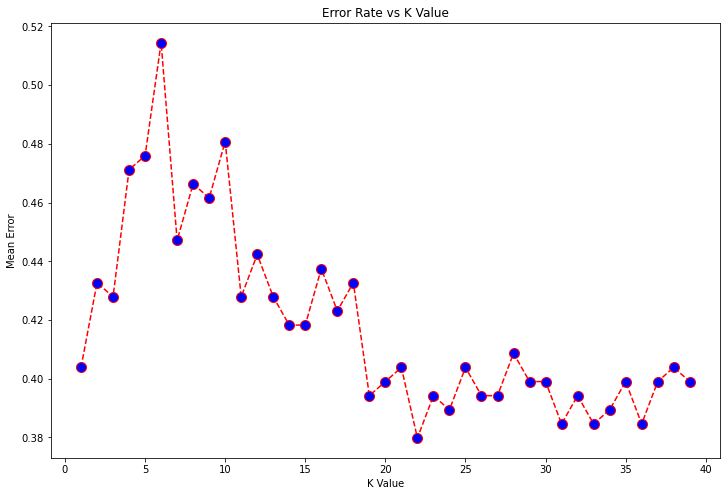

In [45]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 40), err, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
#plt.plot(range(1, 40), err2, color='black', linestyle='dashed', marker='o',
         #markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [46]:
#Decision Tree
#Feature names 
y=Data60.iloc[:,37]
X=Data60.iloc[:,:-2]
X['accuracy']=Data60['accuracy']
#tag names 
Target_names=['gender']

#features
Feature_names=list(X.columns)
print(Target_names)
print(Feature_names)

#Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2022)
print('The shape for train and test data are :',X_train.shape,X_test.shape,y_train.shape,y_test.shape)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

['gender']
['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'affiliative', 'selfenhacing', 'aggressive', 'selfdefeating', 'age', 'accuracy']
The shape for train and test data are : (727, 38) (312, 38) (727,) (312,)


In [47]:
#use information gain, split in the optimal value, no maximum deepth, 
clf=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=None,random_state=2022)
clf.fit(X_train,y_train)

#workout the accuracy 
train_acc=sum(clf.predict(X_train)==y_train)/len(y_train)
test_acc=sum(clf.predict(X_test)==y_test)/len(y_test)
y_pred=clf.predict(X_test)
print('Train Accuracy is :{:.2f}'.format(train_acc))
print('Test Accuracy is :{:.2f}'.format(test_acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
#our Train accuracy is 100% and 53% for classification this means that there are overfitting in the data 

Train Accuracy is :1.00
Test Accuracy is :0.53
[[69 76]
 [72 95]]
              precision    recall  f1-score   support

      female       0.49      0.48      0.48       145
        male       0.56      0.57      0.56       167

    accuracy                           0.53       312
   macro avg       0.52      0.52      0.52       312
weighted avg       0.52      0.53      0.53       312

0.5256410256410257


In [48]:
#to avoid overfitting we can see the max depth to some number say 3 here 
clf=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3,random_state=2022)
clf.fit(X_train,y_train)
train_acc2=sum(clf.predict(X_train)==y_train)/len(y_train)
test_acc2=sum(clf.predict(X_test)==y_test)/len(y_test)
print('Train Accuracy is :{:.2f}'.format(train_acc2))
print('Test Accuracy is :{:.2f}'.format(test_acc2))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#so we kindly realsease the overfitting

Train Accuracy is :0.64
Test Accuracy is :0.58
[[69 76]
 [72 95]]
              precision    recall  f1-score   support

      female       0.49      0.48      0.48       145
        male       0.56      0.57      0.56       167

    accuracy                           0.53       312
   macro avg       0.52      0.52      0.52       312
weighted avg       0.52      0.53      0.53       312



C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



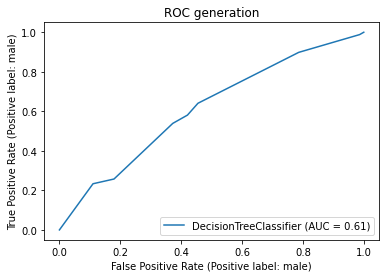

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



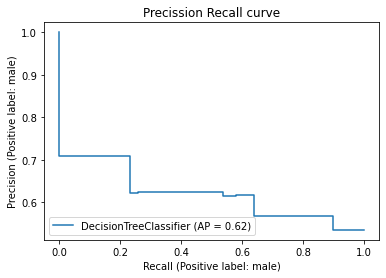

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



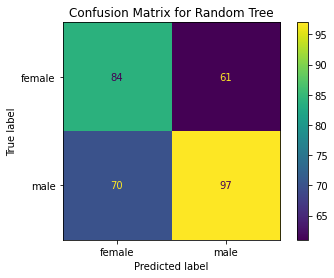

In [49]:
plot_roc_curve(clf,X_test,y_test)
plt.title('ROC generation')
plt.show()
plot_precision_recall_curve(clf,X_test,y_test)
plt.title('Precission Recall curve')
plt.show()
plot_confusion_matrix(clf, X_test, y_test)
plt.title('Confusion Matrix for Random Tree')
plt.show()

In [50]:
#we can also use graphviz to versulize the decision tree 
'''
dot_data=export_graphviz(clf,feature_names=Feature_names,out_file=None)
dot=graphviz.Source(dot_data)
dot.view()
'''

'\ndot_data=export_graphviz(clf,feature_names=Feature_names,out_file=None)\ndot=graphviz.Source(dot_data)\ndot.view()\n'

#### Random froest 
#### we get m same size data from population dataset to train m separate decision tree, for every tree random pick a certain features, compare which feature after classify it can get more classifcation accuracy, when evaluation we use every deciisoin tree to do classification, and voting for a final answer. Is a way of Bagging. 

#### k fold 

In [51]:
#generate data 
y=Data60.iloc[:,37]
X=Data60.iloc[:,:-2]
X['accuracy']=Data60['accuracy']

#Train test, split
#Is a binary classification which we want test the gender to be male or female
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=2021)
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [52]:
y=Data60.iloc[:,37]
X=Data60.iloc[:,:-2]
X['accuracy']=Data60['accuracy']
cv=KFold(n_splits=5,random_state=1,shuffle=True)
rf_model=RandomForestClassifier()
sco=cross_val_score(rf_model,X,y,scoring='accuracy',cv=cv,n_jobs=1)
print('Accuracy',sco)

Accuracy [0.64903846 0.60576923 0.57692308 0.59615385 0.66183575]


AUC test = 0.65659
AUC train = 0.84991
0.6346153846153846
0.7606602475928473
[[ 62  77]
 [ 37 136]]
              precision    recall  f1-score   support

      female       0.63      0.45      0.52       139
        male       0.64      0.79      0.70       173

    accuracy                           0.63       312
   macro avg       0.63      0.62      0.61       312
weighted avg       0.63      0.63      0.62       312



C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



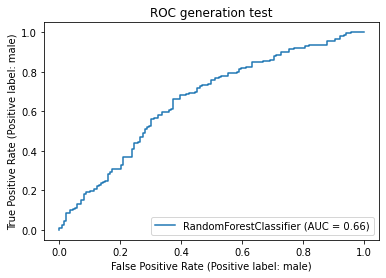

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



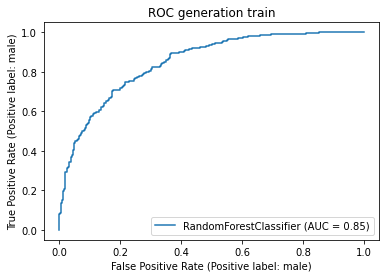

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



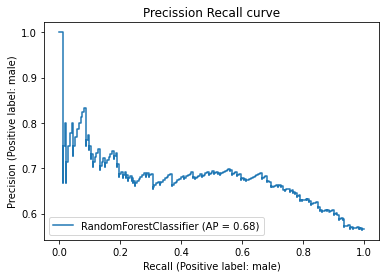

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



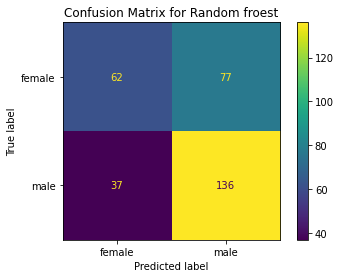

In [53]:

#creat a random froest classification  n_estimators is the number of the decision tree,we choose 100; max_features
rf_model=RandomForestClassifier(n_estimators=44,criterion='gini',max_depth=4,min_samples_split=2)
#train and evl
rf_model.fit(Xtrain,Ytrain)
y_test_pred=rf_model.predict(Xtest)
y_train_pred=rf_model.predict(Xtrain)
TestProbability=rf_model.predict_proba(Xtest)[:,1] 
TestProbabilityTrain=rf_model.predict_proba(Xtrain)[:,1] 
print('AUC test = {:.5f}'.format(roc_auc_score(Ytest, TestProbability)))
print('AUC train = {:.5f}'.format(roc_auc_score(Ytrain, TestProbabilityTrain)))
print(sum(y_test_pred==Ytest)/len(Ytest))
print(sum(y_train_pred==Ytrain)/len(Ytrain))
print(confusion_matrix(Ytest, y_test_pred))
print(classification_report(Ytest, y_test_pred))
plot_roc_curve(rf_model,Xtest,Ytest)
plt.title('ROC generation test')
plt.show()
plot_roc_curve(rf_model,Xtrain,Ytrain)
plt.title('ROC generation train')
plt.show()
plot_precision_recall_curve(rf_model,Xtest,Ytest)
plt.title('Precission Recall curve')
plt.show()
plot_confusion_matrix(rf_model, Xtest, Ytest)
plt.title('Confusion Matrix for Random froest')
plt.show()

Text(0.5, 1.0, 'Feature Importance')

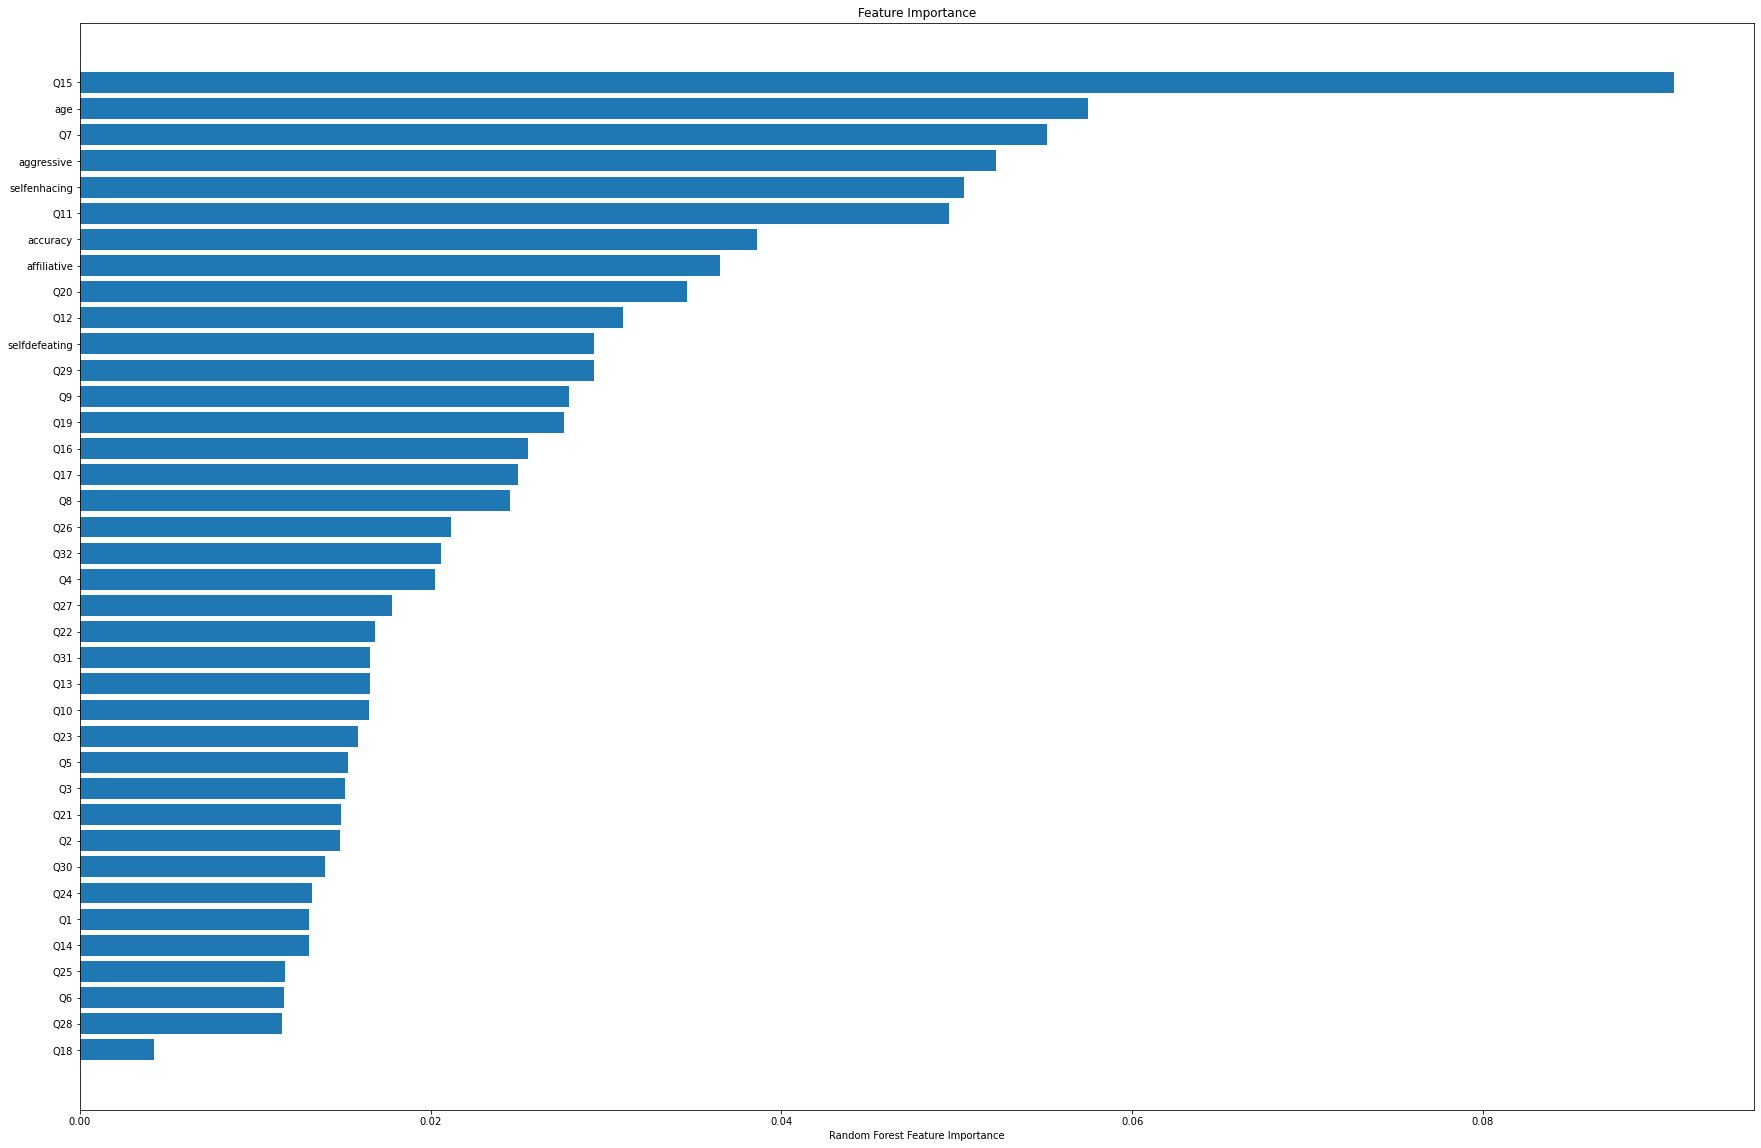

In [54]:
#generate the feature importance 
plt.figure(figsize=(30,20))
SortedIndex=rf_model.feature_importances_.argsort()
Feature_names2=np.array(Feature_names)
plt.barh(Feature_names2[SortedIndex], rf_model.feature_importances_[SortedIndex])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

In [55]:
'''
Parameters={'n_estimator':#test one by one specify,
            'max_depth':,
            'min_sample_split':,
            'min_sample_leaf':[0.1* i for i in range(0,51)]}

SvmModel=RandomForestClassifier()
Grid=GridSearchCV(SvmModel,Parameters,cv=10,refit=True,verbose=2)
Grid.fit(Xtrain,Ytrain)
print(Grid.best_params_)
'''
#which is 58,19,0.25,0.08

"\nParameters={'n_estimator':#test one by one specify,\n            'max_depth':,\n            'min_sample_split':,\n            'min_sample_leaf':[0.1* i for i in range(0,51)]}\n\nSvmModel=RandomForestClassifier()\nGrid=GridSearchCV(SvmModel,Parameters,cv=10,refit=True,verbose=2)\nGrid.fit(Xtrain,Ytrain)\nprint(Grid.best_params_)\n"

#### Hyper Parameter testing :Random Froest

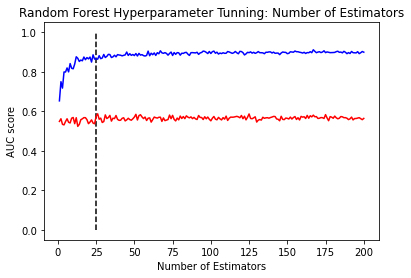

In [56]:
'Number of maximum depth'
#long time to run 
#generate data 
y=Data60.iloc[:,37]
X=Data60.iloc[:,32:-2]
X['accuracy']=Data60['accuracy']

#Train test, split
#Is a binary classification which we want test the gender to be male or female
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=2021)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
TrainAuc = []
TestAuc=[]
# Calculating error for K values between 1 and 40
for i in range(1,201):
    rf_model=RandomForestClassifier(n_estimators=i,criterion='gini',max_depth=6,min_samples_split=2)
    rf_model.fit(Xtrain,Ytrain)
    TestProbability=rf_model.predict_proba(Xtest)[:,1] 
    TestProbabilityTrain=rf_model.predict_proba(Xtrain)[:,1] 
    AUCtrain=roc_auc_score(Ytrain, TestProbabilityTrain)
    AUCtest=roc_auc_score(Ytest, TestProbability)
    TrainAuc.append(AUCtrain)
    TestAuc.append(AUCtest)

plt.plot(range(1,201), TestAuc, color='red')
plt.plot(range(1,201), TrainAuc, color='blue')
plt.title('Random Forest Hyperparameter Tunning: Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC score')
plt.vlines(x=25,colors='black',ymin=0,ymax=1,linestyles='--')

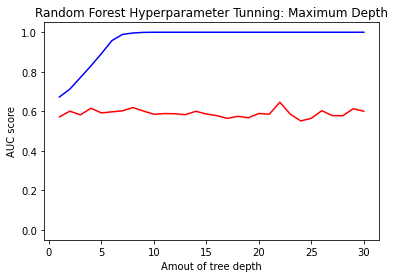

In [57]:
'''Hyperparameter Tuning: Max Depth'''
#generate data 
y=Data60.iloc[:,37]
X=Data60.iloc[:,:-2]
X['accuracy']=Data60['accuracy']

#Train test, split
#Is a binary classification which we want test the gender to be male or female
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=20)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
TrainAuc = []
TestAuc=[]
# Calculating error for K values between 1 and 40
for i in range(1,31):
    rf_model=RandomForestClassifier(n_estimators=44,criterion='gini',max_depth=i,min_samples_split=2)
    rf_model.fit(Xtrain,Ytrain)
    TestProbability=rf_model.predict_proba(Xtest)[:,1] 
    TestProbabilityTrain=rf_model.predict_proba(Xtrain)[:,1] 
    AUCtrain=roc_auc_score(Ytrain, TestProbabilityTrain)
    AUCtest=roc_auc_score(Ytest, TestProbability)
    TrainAuc.append(AUCtrain)
    TestAuc.append(AUCtest)
plt.ylim=(0,1)
plt.plot(range(1,31), TestAuc, color='red')
plt.plot(range(1,31), TrainAuc, color='blue')
plt.title('Random Forest Hyperparameter Tunning: Maximum Depth')
plt.xlabel('Amout of tree depth')
plt.ylabel('AUC score')

plt.vlines(x=5,ymin=0,ymax=1,linestyles='--',colors='w')

#### Feature Selection methods, recursive feature elimination

In [58]:

#generate data 
y=Data60.iloc[:,37]
X=Data60.iloc[:,:-2]
X['accuracy']=Data60['accuracy']

#Train test, split
#Is a binary classification which we want test the gender to be male or female
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=2021)
scaler = StandardScaler()
scaler.fit(X_train)
Xtrain2 = scaler.transform(Xtrain)
Xtest2 = scaler.transform(Xtest)

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



In [59]:
#creat a random froest classification  n_estimators is the number of the decision tree,we choose 44; max_features
rf=RandomForestClassifier(n_estimators=44,criterion='gini',max_depth=4,min_samples_split=2)
# Init the transformer
rfe = RFE(estimator=rf, n_features_to_select=10)
#train and evl
rfe.fit(Xtrain2,Ytrain)
#check for the columns that keeps 
print(Xtrain.loc[:, rfe.support_])
print(Xtrain.columns[rfe.support_])
# use . transform() to get a new numpy array with the relevant features.
rf.fit(rfe.transform(Xtrain2),Ytrain)
print('The Accuracy is :',rf.score(rfe.transform(Xtest2), Ytest))

      Q7  Q11  Q12  Q15  affiliative  selfenhacing  aggressive  selfdefeating  \
45   3.0  4.0  3.0  4.0          4.0           3.0         3.1            2.9   
90   2.0  4.0  1.0  2.0          2.1           3.4         2.5            2.6   
495  5.0  2.0  1.0  5.0          3.1           3.0         3.4            2.8   
569  3.0  2.0  2.0  4.0          3.4           2.2         2.8            2.0   
183  2.0  2.0  5.0  3.0          4.2           3.6         2.2            3.0   
..   ...  ...  ...  ...          ...           ...         ...            ...   
669  3.0  3.0  3.0  2.0          4.0           3.2         2.6            2.9   
830  3.0  5.0  3.0  5.0          4.1           3.6         4.8            2.4   
44   1.0  5.0  1.0  1.0          3.9           3.6         2.5            2.0   
621  3.0  2.0  4.0  2.0          4.8           3.6         2.8            3.0   
57   3.0  3.0  3.0  3.0          3.2           3.1         3.0            2.8   

      age  accuracy  
45   

#### REFCV class Recursive Feature Elimination with cross-validation and automatically finds the optimal number of features to keep.

In [60]:

Data60['gender'].replace('male', 0,inplace=True)
Data60['gender'].replace('female', 1,inplace=True)
#generate data 
y=Data60.iloc[:,37]
X=Data60.iloc[:,:-2]
X['accuracy']=Data60['accuracy']

#Train test, split
#Is a binary classification which we want test the gender to be male or female
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=2021)
scaler = StandardScaler()
scaler.fit(X_train)
Xtrain2 = scaler.transform(Xtrain)
Xtest2 = scaler.transform(Xtest)
print(y)

0       1
1       1
2       0
3       1
4       0
       ..
1034    0
1035    0
1036    0
1037    0
1038    1
Name: gender, Length: 1039, dtype: int64


C:\Users\Allen\anaconda3\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



In [61]:
rf=RandomForestClassifier(n_estimators=44,criterion='gini',max_depth=4,min_samples_split=2)
rfecv=RFECV(estimator=rf,min_features_to_select=6,step=5,n_jobs=-1,scoring="r2",cv=5)
rfecv.fit(Xtrain2,Ytrain)
#check for the columns that keeps 
print(Xtrain.loc[:, rfecv.support_])
print(Xtrain.columns[rfecv.support_])
# use . transform() to get a new numpy array with the relevant features.
rf.fit(rfecv.transform(Xtrain2),Ytrain)
print('The Accuracy is :',rf.score(rfecv.transform(Xtest2), Ytest))


      Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q9  Q11  Q12  ...  Q27  Q28  Q29  \
45   2.0  2.0  3.0  3.0  3.0  4.0  3.0  3.0  4.0  3.0  ...  3.0  3.0  2.0   
90   4.0  4.0  3.0  2.0  1.0  1.0  2.0  5.0  4.0  1.0  ...  2.0  3.0  2.0   
495  3.0  4.0  3.0  3.0  3.0  3.0  5.0  3.0  2.0  1.0  ...  4.0  3.0  3.0   
569  2.0  2.0  2.0  1.0  4.0  3.0  3.0  5.0  2.0  2.0  ...  2.0  2.0  2.0   
183  1.0  4.0  2.0  2.0  4.0  4.0  2.0  4.0  2.0  5.0  ...  2.0  3.0  2.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
669  2.0  4.0  3.0  4.0  4.0  4.0  3.0  3.0  3.0  3.0  ...  3.0  2.0  2.0   
830  5.0  5.0  5.0  1.0  3.0  5.0  3.0  1.0  5.0  3.0  ...  5.0  5.0  2.0   
44   4.0  4.0  3.0  1.0  3.0  5.0  1.0  5.0  5.0  1.0  ...  4.0  5.0  1.0   
621  1.0  2.0  3.0  4.0  5.0  5.0  3.0  2.0  2.0  4.0  ...  4.0  2.0  1.0   
57   3.0  2.0  3.0  2.0  4.0  4.0  3.0  2.0  3.0  3.0  ...  3.0  3.0  3.0   

     Q32  affiliative  selfenhacing  aggressive  selfdefeating   age  accur

#### We now try to train with the feature selection and to create more feature use polynomial features

In [62]:
NewData60=Data60.filter(['Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive',
       'selfdefeating', 'age', 'accuracy'],axis=1)
Poly=PolynomialFeatures(degree=2,interaction_only=True)
PolyData=Poly.fit_transform(NewData60)
print(np.shape(PolyData))
print(list(Poly.get_feature_names_out(NewData60.columns)))# a list of names 
FeatureData=PolyData[:,1:33]
TargetData=Data60.iloc[:,37]
TargetData

(1039, 56)
['1', 'Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive', 'selfdefeating', 'age', 'accuracy', 'Q7 Q11', 'Q7 Q15', 'Q7 Q20', 'Q7 affiliative', 'Q7 selfenhacing', 'Q7 aggressive', 'Q7 selfdefeating', 'Q7 age', 'Q7 accuracy', 'Q11 Q15', 'Q11 Q20', 'Q11 affiliative', 'Q11 selfenhacing', 'Q11 aggressive', 'Q11 selfdefeating', 'Q11 age', 'Q11 accuracy', 'Q15 Q20', 'Q15 affiliative', 'Q15 selfenhacing', 'Q15 aggressive', 'Q15 selfdefeating', 'Q15 age', 'Q15 accuracy', 'Q20 affiliative', 'Q20 selfenhacing', 'Q20 aggressive', 'Q20 selfdefeating', 'Q20 age', 'Q20 accuracy', 'affiliative selfenhacing', 'affiliative aggressive', 'affiliative selfdefeating', 'affiliative age', 'affiliative accuracy', 'selfenhacing aggressive', 'selfenhacing selfdefeating', 'selfenhacing age', 'selfenhacing accuracy', 'aggressive selfdefeating', 'aggressive age', 'aggressive accuracy', 'selfdefeating age', 'selfdefeating accuracy', 'age accuracy']


0       1
1       1
2       0
3       1
4       0
       ..
1034    0
1035    0
1036    0
1037    0
1038    1
Name: gender, Length: 1039, dtype: int64

In [63]:
#Train test, split
#Is a binary classification which we want test the gender to be male or female
Xtrain,Xtest,Ytrain,Ytest=train_test_split(FeatureData,TargetData,test_size=0.3,random_state=2021)
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)
Ytrain

45     0
90     0
495    0
569    1
183    0
      ..
669    0
830    1
44     1
621    0
57     1
Name: gender, Length: 727, dtype: int64

AUC test = 0.66728
AUC train = 0.67263
Test 0.6346153846153846
0.6231086657496562
[[125  48]
 [ 66  73]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.69       173
           1       0.60      0.53      0.56       139

    accuracy                           0.63       312
   macro avg       0.63      0.62      0.62       312
weighted avg       0.63      0.63      0.63       312



C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



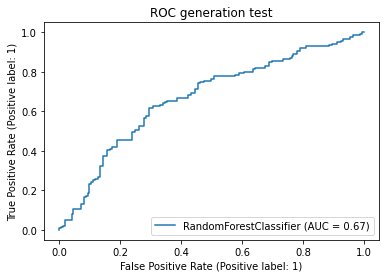

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



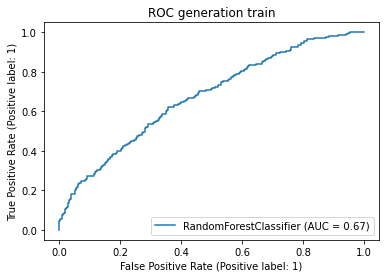

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



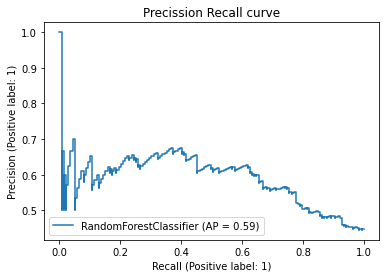

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



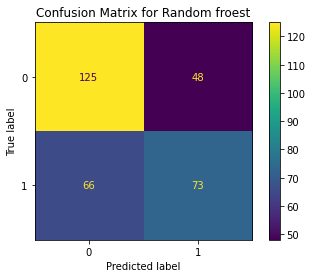

In [64]:
#creat a random froest classification  n_estimators is the number of the decision tree,we choose 100; max_features
rf_model=RandomForestClassifier(n_estimators=58,criterion='gini',max_depth=19,min_samples_split=0.25,min_samples_leaf=0.08)
#train and evl
rf_model.fit(Xtrain,Ytrain)
y_test_pred=rf_model.predict(Xtest)
y_train_pred=rf_model.predict(Xtrain)
TestProbability=rf_model.predict_proba(Xtest)[:,1] 
TestProbabilityTrain=rf_model.predict_proba(Xtrain)[:,1] 
fpr1,tpr1,thresholds=roc_curve(Ytest,TestProbability)
print('AUC test = {:.5f}'.format(roc_auc_score(Ytest, TestProbability)))
print('AUC train = {:.5f}'.format(roc_auc_score(Ytrain, TestProbabilityTrain)))
print('Test',sum(y_test_pred==Ytest)/len(Ytest))
print(sum(y_train_pred==Ytrain)/len(Ytrain))
print(confusion_matrix(Ytest, y_test_pred))
print(classification_report(Ytest, y_test_pred))
plot_roc_curve(rf_model,Xtest,Ytest)
plt.title('ROC generation test')
plt.show()
plot_roc_curve(rf_model,Xtrain,Ytrain)
plt.title('ROC generation train')
plt.show()
plot_precision_recall_curve(rf_model,Xtest,Ytest)
plt.title('Precission Recall curve')
plt.show()
plot_confusion_matrix(rf_model, Xtest, Ytest)
plt.title('Confusion Matrix for Random froest')
plt.show()

In [65]:
print(list(fpr1),list(tpr1))

[0.0, 0.0, 0.005780346820809248, 0.005780346820809248, 0.011560693641618497, 0.011560693641618497, 0.017341040462427744, 0.017341040462427744, 0.04046242774566474, 0.04046242774566474, 0.046242774566473986, 0.046242774566473986, 0.06936416184971098, 0.06936416184971098, 0.08092485549132948, 0.08092485549132948, 0.08670520231213873, 0.08670520231213873, 0.09248554913294797, 0.09248554913294797, 0.09826589595375723, 0.09826589595375723, 0.10404624277456648, 0.10404624277456648, 0.10982658959537572, 0.10982658959537572, 0.11560693641618497, 0.11560693641618497, 0.12716763005780346, 0.12716763005780346, 0.1329479768786127, 0.1329479768786127, 0.14450867052023122, 0.14450867052023122, 0.15606936416184972, 0.15606936416184972, 0.1676300578034682, 0.1676300578034682, 0.17341040462427745, 0.17341040462427745, 0.1907514450867052, 0.1907514450867052, 0.23699421965317918, 0.23699421965317918, 0.24855491329479767, 0.24855491329479767, 0.26011560693641617, 0.26011560693641617, 0.2774566473988439, 0

[Text(167.4, 181.2, 'X[15] <= -0.006\ngini = 0.494\nsamples = 454\nvalue = [402, 325]'),
 Text(83.7, 108.72, 'X[7] <= -0.137\ngini = 0.462\nsamples = 236\nvalue = [234, 133]'),
 Text(41.85, 36.23999999999998, 'gini = 0.488\nsamples = 100\nvalue = [93, 68]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.432\nsamples = 136\nvalue = [141, 65]'),
 Text(251.10000000000002, 108.72, 'X[7] <= -0.533\ngini = 0.498\nsamples = 218\nvalue = [168, 192]'),
 Text(209.25, 36.23999999999998, 'gini = 0.406\nsamples = 68\nvalue = [32, 81]'),
 Text(292.95, 36.23999999999998, 'gini = 0.495\nsamples = 150\nvalue = [136, 111]')]

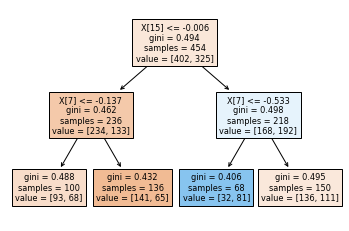

In [66]:
from sklearn import tree
tree.plot_tree(rf_model.estimators_[4],filled=True)

In [67]:
'''
Parameters={'n_estimator':#test one by one specify,
            'max_depth':,
            'min_sample_split':,
            'min_sample_leaf':[0.1* i for i in range(0,51)]}

SvmModel=RandomForestClassifier()
Grid=GridSearchCV(SvmModel,Parameters,cv=10,refit=True,verbose=2)
Grid.fit(Xtrain,Ytrain)
print(Grid.best_params_)
'''
#which is 58,19,0.25,0.08

"\nParameters={'n_estimator':#test one by one specify,\n            'max_depth':,\n            'min_sample_split':,\n            'min_sample_leaf':[0.1* i for i in range(0,51)]}\n\nSvmModel=RandomForestClassifier()\nGrid=GridSearchCV(SvmModel,Parameters,cv=10,refit=True,verbose=2)\nGrid.fit(Xtrain,Ytrain)\nprint(Grid.best_params_)\n"

In [68]:
#hyperparameter tuning
'Number of maximum estimators'
#long time to run 
#generate data 
TrainAuc = []
TestAuc=[]
# Calculating error for K values between 1 and 40
for i in range(1,201):
    rf_model=RandomForestClassifier(n_estimators=i,criterion='gini',max_depth=6,min_samples_split=2)
    rf_model.fit(Xtrain,Ytrain)
    y_test_pred=rf_model.predict(Xtest)
    y_train_pred=rf_model.predict(Xtrain)
    AccuracyTest=sum(y_test_pred==Ytest)/len(Ytest)
    AccuracyTrain=sum(y_train_pred==Ytrain)/len(Ytrain)
    TrainAuc.append(AccuracyTrain)
    TestAuc.append(AccuracyTest)



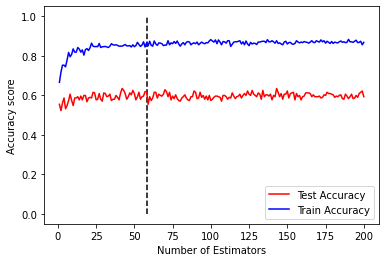

In [69]:
plt.plot(range(1,201), TestAuc, color='red',label='Test Accuracy')
plt.plot(range(1,201), TrainAuc, color='blue',label='Train Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy score')
plt.legend(loc=4)
plt.vlines(x=58,colors='black',ymin=0,ymax=1,linestyles='--')

In [70]:
NewData60=Data60.filter(['Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive',
       'selfdefeating', 'age', 'accuracy'],axis=1)
print(NewData60)
Poly=PolynomialFeatures(degree=2,interaction_only=True)
PolyData=Poly.fit_transform(NewData60)
Poly.get_feature_names_out(NewData60.columns)# a list of names 

       Q7  Q11  Q15  Q20  affiliative  selfenhacing  aggressive  \
0     4.0  3.0  4.0  1.0          4.0           3.5         3.0   
1     4.0  4.0  5.0  2.0          3.2           3.5         3.2   
2     3.0  3.0  3.0  1.0          3.9           3.9         3.1   
3     4.0  2.0  4.0  3.0          3.2           4.0         2.9   
4     4.0  2.0  4.0  1.0          4.1           4.1         2.9   
...   ...  ...  ...  ...          ...           ...         ...   
1034  3.0  5.0  2.0  4.0          4.6           4.6         3.2   
1035  3.0  2.0  3.0  2.0          4.4           3.8         2.5   
1036  3.0  4.0  4.0  4.0          4.5           4.1         3.4   
1037  4.0  2.0  5.0  1.0          3.2           3.4         3.0   
1038  4.0  2.0  5.0  2.0          4.0           4.0         3.4   

      selfdefeating   age  accuracy  
0               2.2  25.0       100  
1               2.4  44.0        90  
2               2.2  50.0        75  
3               3.2  30.0        85  
4    

array(['1', 'Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing',
       'aggressive', 'selfdefeating', 'age', 'accuracy', 'Q7 Q11',
       'Q7 Q15', 'Q7 Q20', 'Q7 affiliative', 'Q7 selfenhacing',
       'Q7 aggressive', 'Q7 selfdefeating', 'Q7 age', 'Q7 accuracy',
       'Q11 Q15', 'Q11 Q20', 'Q11 affiliative', 'Q11 selfenhacing',
       'Q11 aggressive', 'Q11 selfdefeating', 'Q11 age', 'Q11 accuracy',
       'Q15 Q20', 'Q15 affiliative', 'Q15 selfenhacing', 'Q15 aggressive',
       'Q15 selfdefeating', 'Q15 age', 'Q15 accuracy', 'Q20 affiliative',
       'Q20 selfenhacing', 'Q20 aggressive', 'Q20 selfdefeating',
       'Q20 age', 'Q20 accuracy', 'affiliative selfenhacing',
       'affiliative aggressive', 'affiliative selfdefeating',
       'affiliative age', 'affiliative accuracy',
       'selfenhacing aggressive', 'selfenhacing selfdefeating',
       'selfenhacing age', 'selfenhacing accuracy',
       'aggressive selfdefeating', 'aggressive age',
       'aggressive accuracy', '

In [71]:
TrainAuc = []
TestAuc=[]
#test how many features to chhose 
for i in range(2,57):
    FeatureData=PolyData[:,1:i]
    TargetData=Data60.iloc[:,37]
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(FeatureData,TargetData,test_size=0.3,random_state=2021)
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)
    rf_model=RandomForestClassifier(n_estimators=58,criterion='gini',max_depth=19,min_samples_split=0.25,min_samples_leaf=0.08)
    rf_model.fit(Xtrain,Ytrain)
    y_test_pred=rf_model.predict(Xtest)
    y_train_pred=rf_model.predict(Xtrain)
    AccuracyTest=sum(y_test_pred==Ytest)/len(Ytest)
    AccuracyTrain=sum(y_train_pred==Ytrain)/len(Ytrain)
    TrainAuc.append(AccuracyTrain)
    TestAuc.append(AccuracyTest)

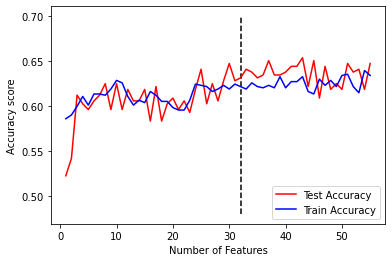

In [72]:
plt.plot(range(1,56), TestAuc, color='red',label='Test Accuracy')
plt.plot(range(1,56), TrainAuc, color='blue',label='Train Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy score')
plt.legend(loc=4)
plt.vlines(x=32,colors='black',ymin=0.48,ymax=0.7,linestyles='--')

plt.show()


In [73]:
TrainAuc = []
TestAuc=[]
# Calculating error for K values between 1 and 40
for i in range(1,31):
    rf_model=RandomForestClassifier(n_estimators=58,criterion='gini',max_depth=i,min_samples_split=0.16,min_samples_leaf=0.24)
    rf_model.fit(Xtrain,Ytrain)
    y_test_pred=rf_model.predict(Xtest)
    y_train_pred=rf_model.predict(Xtrain)
    AccuracyTest=sum(y_test_pred==Ytest)/len(Ytest)
    AccuracyTrain=sum(y_train_pred==Ytrain)/len(Ytrain)
    TrainAuc.append(AccuracyTrain)
    TestAuc.append(AccuracyTest)


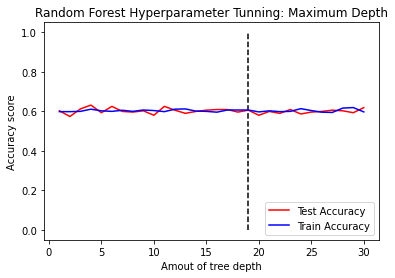

In [74]:
plt.ylim=(0,1)
plt.plot(range(1,31), TestAuc, color='red',label='Test Accuracy')
plt.plot(range(1,31), TrainAuc, color='blue',label='Train Accuracy')
plt.title('Random Forest Hyperparameter Tunning: Maximum Depth')
plt.xlabel('Amout of tree depth')
plt.ylabel('Accuracy score')
plt.legend(loc=4)
plt.vlines(x=19,ymin=0,ymax=1,linestyles='--',colors='black')

In [75]:
'Min Samples Split'
TrainAuc = []
TestAuc=[]
for i in range(0,100):
    rf_model=RandomForestClassifier(n_estimators=55,criterion='gini',max_depth=19,min_samples_split=0.01+i*0.01)
    rf_model.fit(Xtrain,Ytrain)
    y_test_pred=rf_model.predict(Xtest)
    y_train_pred=rf_model.predict(Xtrain)
    AccuracyTest=sum(y_test_pred==Ytest)/len(Ytest)
    AccuracyTrain=sum(y_train_pred==Ytrain)/len(Ytrain)
    TrainAuc.append(AccuracyTrain)
    TestAuc.append(AccuracyTest)

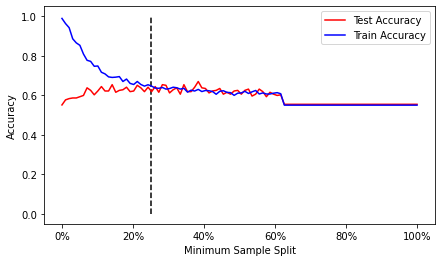

"\nplt.plot(range(0,100), TestAuc, color='red',label='Test AUC')\nplt.plot(range(0,100), TrainAuc, color='blue',label='Train AUC')\nplt.xlim(0,1)\nplt.xlabel('Percentage')\nplt.ylabel('AUC score')\nplt.legend(loc=4)\n\n"

In [76]:

perc = np.linspace(0, 100, len(TestAuc))
fig = plt.figure(1, (7, 4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(perc, TestAuc, color='red',label='Test Accuracy')
ax.plot(perc, TrainAuc, color='blue',label='Train Accuracy')
fmt = '%.0f%%'
# Format you want the ticks, e.g.
'40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
plt.legend(loc=1)
plt.ylim=(0,1)
plt.ylabel('Accuracy')
plt.xlabel('Minimum Sample Split')
plt.vlines(x=25,ymin=0,ymax=1,linestyles='--',colors='black')
plt.show()
'''
plt.plot(range(0,100), TestAuc, color='red',label='Test AUC')
plt.plot(range(0,100), TrainAuc, color='blue',label='Train AUC')
plt.xlim(0,1)
plt.xlabel('Percentage')
plt.ylabel('AUC score')
plt.legend(loc=4)

'''

In [77]:
'Min Samples Split'
TrainAuc = []
TestAuc=[]
for i in range(0,50):
    rf_model=RandomForestClassifier(n_estimators=58,criterion='gini',max_depth=19,min_samples_split=0.25,min_samples_leaf=0.01+i*0.01)
    rf_model.fit(Xtrain,Ytrain)
    y_test_pred=rf_model.predict(Xtest)
    y_train_pred=rf_model.predict(Xtrain)
    AccuracyTest=sum(y_test_pred==Ytest)/len(Ytest)
    AccuracyTrain=sum(y_train_pred==Ytrain)/len(Ytrain)
    TrainAuc.append(AccuracyTrain)
    TestAuc.append(AccuracyTest)

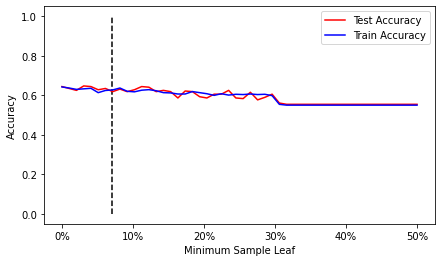

In [78]:
perc = np.linspace(0, 50, len(TestAuc))
fig = plt.figure(1, (7, 4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(perc, TestAuc, color='red',label='Test Accuracy')
ax.plot(perc, TrainAuc, color='blue',label='Train Accuracy')
fmt = '%.0f%%'
# Format you want the ticks, e.g.
'40%'
plt.ylabel('Accuracy')
plt.xlabel('Minimum Sample Leaf')
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
plt.legend(loc=1)
plt.ylim=(0,1)
plt.vlines(x=7,ymin=0,ymax=1,linestyles='--',colors='black')
plt.show()

      principal component 1  principal component 2  principal component 3
0                  1.358965              -2.295627               2.827373
1                 -2.320345              -3.643635               3.237337
2                  1.262803              -1.764171               2.764110
3                 -2.308007              -1.751895              -2.669877
4                  0.952955              -5.205835               1.708087
...                     ...                    ...                    ...
1034              -9.428698               5.441517               1.989501
1035               0.191412              -0.156470              -0.725348
1036              -9.042415               1.629498               0.294012
1037               1.840564              -3.843502              -0.143470
1038              -0.246201              -3.946718              -0.047732

[1039 rows x 3 columns]


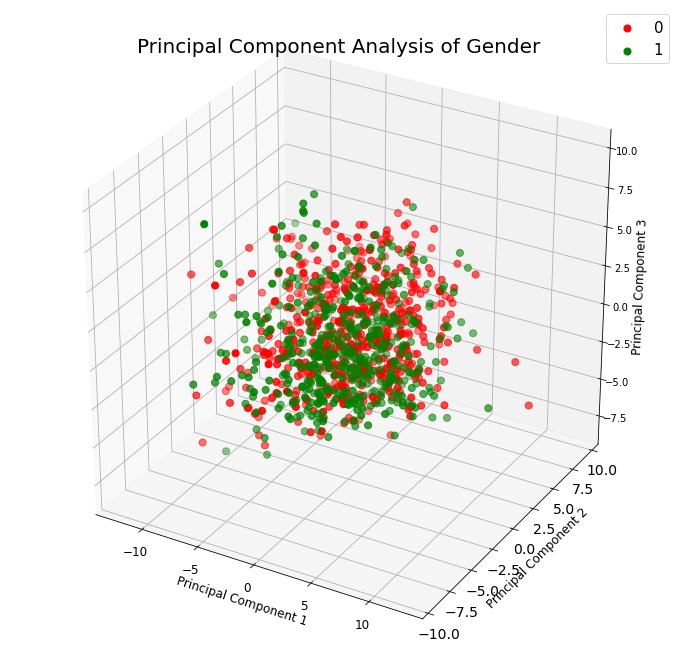

In [79]:
X=StandardScaler().fit_transform(FeatureData) # normalizing the features
pca_gender = PCA(n_components=3)
principalComponents_gender = pca_gender.fit_transform(X)
principalComponents_gender.shape
principal_gender_Df = pd.DataFrame(data=principalComponents_gender, columns=['principal component 1','principal component 2','principal component 3'])
print(principal_gender_Df)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
targets = [0, 1]
colors = ['r', 'g']
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title('Principal Component Analysis of Gender ',fontsize=20)
ax.set_xlabel('Principal Component 1',fontsize=12)
ax.set_ylabel('Principal Component 2',fontsize=12)
ax.set_zlabel('Principal Component 3',fontsize=12)
for target, color in zip(targets,colors):
    indicesToKeep = Data60['gender'] == target
    if color=='r':
        mark="o"
    else:
        mark="o"
    ax.scatter(principal_gender_Df.loc[indicesToKeep, 'principal component 1']
               , principal_gender_Df.loc[indicesToKeep, 'principal component 2']
               ,principal_gender_Df.loc[indicesToKeep, 'principal component 3'] , c=color, s=50)

plt.legend(targets,prop={'size':15})

#### From the plot it suggest that the model can train well on test set as number of tree depth increase, but the predictin AUC score can not be significantly increase, the main reason is that the features which predict female is very similar for the features that use to predict male, on other word, is very hard to classify with those features which may be erroneous. To see  this let carefully consider the pairwire bivariate distribution and use PCA to generate data in to 3d or 2d try to identify the similarity partten

In [80]:
Data60['gender'].replace(0,'male',inplace=True)
Data60['gender'].replace(1,'female',inplace=True)

In [81]:
#Let train PCA to visualize them
#Decision Tree
#Feature names 
y=Data60.iloc[:,37]
X=Data60.iloc[:,:-2]
X['accuracy']=Data60['accuracy']
#tag names 
Target_names=['gender']

#features
Feature_names=np.array(X.columns)
print(Target_names)
print(Feature_names)

['gender']
['Q1' 'Q2' 'Q3' 'Q4' 'Q5' 'Q6' 'Q7' 'Q8' 'Q9' 'Q10' 'Q11' 'Q12' 'Q13'
 'Q14' 'Q15' 'Q16' 'Q17' 'Q18' 'Q19' 'Q20' 'Q21' 'Q22' 'Q23' 'Q24' 'Q25'
 'Q26' 'Q27' 'Q28' 'Q29' 'Q30' 'Q31' 'Q32' 'affiliative' 'selfenhacing'
 'aggressive' 'selfdefeating' 'age' 'accuracy']


In [82]:
features_labels = np.append(Feature_names,'gender')
features_labels
X=StandardScaler().fit_transform(X) # normalizing the features
pca_gender = PCA(n_components=3)
principalComponents_gender = pca_gender.fit_transform(X)
principalComponents_gender.shape


(1039, 3)

In [83]:
principal_gender_Df = pd.DataFrame(data=principalComponents_gender, columns=['principal component 1','principal component 2','principal component 3'])

principal_gender_Df

,principal component 1,principal component 2,principal component 3
0,0.795328,-2.205338,0.393122
1,2.313058,-0.778388,-2.145248
2,0.359112,-1.549769,-1.617878
3,0.042070,1.624816,-2.679275
4,0.094086,-3.741428,-1.829158
...,...,...,...
1034,-6.688061,2.649929,-0.273522
1035,-1.914733,-0.957060,0.900102
1036,-4.930735,1.911614,-0.971139
1037,2.354026,0.327121,-2.307069


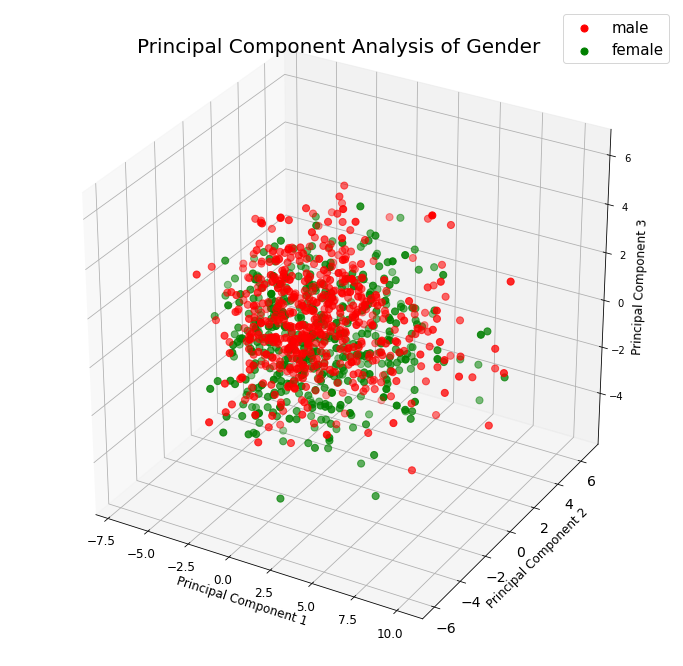

In [84]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
targets = ['male', 'female']
colors = ['r', 'g']
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title('Principal Component Analysis of Gender ',fontsize=20)
ax.set_xlabel('Principal Component 1',fontsize=12)
ax.set_ylabel('Principal Component 2',fontsize=12)
ax.set_zlabel('Principal Component 3',fontsize=12)
for target, color in zip(targets,colors):
    indicesToKeep = Data60['gender'] == target
    if color=='r':
        mark="o"
    else:
        mark="o"
    ax.scatter(principal_gender_Df.loc[indicesToKeep, 'principal component 1']
               , principal_gender_Df.loc[indicesToKeep, 'principal component 2']
               ,principal_gender_Df.loc[indicesToKeep, 'principal component 3'] , c=color, s=50)

plt.legend(targets,prop={'size':15})

In [85]:
'''
#need modification of pca to run by change components to 2 

plt.figure()
plt.figure(figsize=(8,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title('Principal Component Analysis of Gender ',fontsize=20)

targets = ['male', 'female']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = Data60['gender'] == target
    if color=='r':
        mark="o"
    else:
        mark="o"
    plt.scatter(principal_gender_Df.loc[indicesToKeep, 'principal component 1']
               , principal_gender_Df.loc[indicesToKeep, 'principal component 2'], c=color,marker=mark, s=50)

plt.legend(targets,prop={'size':15})
'''

'\n#need modification of pca to run by change components to 2 \n\nplt.figure()\nplt.figure(figsize=(8,5))\nplt.xticks(fontsize=12)\nplt.yticks(fontsize=14)\nplt.xlabel(\'Principal Component - 1\',fontsize=20)\nplt.ylabel(\'Principal Component - 2\',fontsize=20)\nplt.title(\'Principal Component Analysis of Gender \',fontsize=20)\n\ntargets = [\'male\', \'female\']\ncolors = [\'r\', \'g\']\n\nfor target, color in zip(targets,colors):\n    indicesToKeep = Data60[\'gender\'] == target\n    if color==\'r\':\n        mark="o"\n    else:\n        mark="o"\n    plt.scatter(principal_gender_Df.loc[indicesToKeep, \'principal component 1\']\n               , principal_gender_Df.loc[indicesToKeep, \'principal component 2\'], c=color,marker=mark, s=50)\n\nplt.legend(targets,prop={\'size\':15})\n'

### If the code not running, try below change categorical variable to 0 and 1 

In [86]:

Data60['gender'].replace('male',0,inplace=True)
Data60['gender'].replace('female',1,inplace=True)

#### The above plot suggests that the current feature selection are not great, since in majurity the data are tight together, which is hard to classify.

In [87]:
### Model 2 XGBboost
NewData60=Data60.filter(['Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive',
       'selfdefeating', 'age', 'accuracy'],axis=1)
Poly=PolynomialFeatures(degree=2,interaction_only=True)
PolyData=Poly.fit_transform(NewData60)
print(np.shape(PolyData))
print(list(Poly.get_feature_names_out(NewData60.columns)))# a list of names 
FeatureData=PolyData[:,1:32]
TargetData=Data60.iloc[:,37]

(1039, 56)
['1', 'Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive', 'selfdefeating', 'age', 'accuracy', 'Q7 Q11', 'Q7 Q15', 'Q7 Q20', 'Q7 affiliative', 'Q7 selfenhacing', 'Q7 aggressive', 'Q7 selfdefeating', 'Q7 age', 'Q7 accuracy', 'Q11 Q15', 'Q11 Q20', 'Q11 affiliative', 'Q11 selfenhacing', 'Q11 aggressive', 'Q11 selfdefeating', 'Q11 age', 'Q11 accuracy', 'Q15 Q20', 'Q15 affiliative', 'Q15 selfenhacing', 'Q15 aggressive', 'Q15 selfdefeating', 'Q15 age', 'Q15 accuracy', 'Q20 affiliative', 'Q20 selfenhacing', 'Q20 aggressive', 'Q20 selfdefeating', 'Q20 age', 'Q20 accuracy', 'affiliative selfenhacing', 'affiliative aggressive', 'affiliative selfdefeating', 'affiliative age', 'affiliative accuracy', 'selfenhacing aggressive', 'selfenhacing selfdefeating', 'selfenhacing age', 'selfenhacing accuracy', 'aggressive selfdefeating', 'aggressive age', 'aggressive accuracy', 'selfdefeating age', 'selfdefeating accuracy', 'age accuracy']


In [88]:
#Train test, split
#Is a binary classification which we want test the gender to be male or female
Xtrain,Xtest,Ytrain,Ytest=train_test_split(FeatureData,TargetData,test_size=0.3,random_state=2021)
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)
Ytrain

45     0
90     0
495    0
569    1
183    0
      ..
669    0
830    1
44     1
621    0
57     1
Name: gender, Length: 727, dtype: int64

In [89]:
XGBboost_classifier=xgboost.XGBClassifier(objective='binary:logistic',seed=20)
XGBboost_classifier.fit(Xtrain,Ytrain,verbose=True,early_stopping_rounds=20,eval_metric='error',eval_set=[(Xtest,Ytest)])
#aucpr: area under the PR curve
#print the results for each tree 
test_pred=XGBboost_classifier.predict(Xtest)
train_pred=XGBboost_classifier.predict(Xtrain)
TestProbability=XGBboost_classifier.predict_proba(Xtest)[:,1] 
TestProbabilityTrain=XGBboost_classifier.predict_proba(Xtrain)[:,1] 

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[0]	validation_0-error:0.41987
[1]	validation_0-error:0.43910
[2]	validation_0-error:0.41987
[3]	validation_0-error:0.43269
[4]	validation_0-error:0.41346
[5]	validation_0-error:0.41346
[6]	validation_0-error:0.42628
[7]	validation_0-error:0.42628
[8]	validation_0-error:0.42949
[9]	validation_0-error:0.44872
[10]	validation_0-error:0.45513
[11]	validation_0-error:0.45192
[12]	validation_0-error:0.45513
[13]	validation_0-error:0.44231
[14]	validation_0-error:0.45192
[15]	validation_0-error:0.43590
[16]	validation_0-error:0.44872
[17]	validation_0-error:0.44551
[18]	validation_0-error:0.44231
[19]	validation_0-error:0.43910
[20]	validation_0-error:0.43269
[21]	validation_0-error:0.44231
[22]	validation_0-error:0.43910
[23]	validation_0-error:0.45513
[24]	validation_0-error:0.45513


AUC test = 0.59020
AUC train = 0.94613
0.5865384615384616
0.8734525447042641
[[109  64]
 [ 65  74]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       173
           1       0.54      0.53      0.53       139

    accuracy                           0.59       312
   macro avg       0.58      0.58      0.58       312
weighted avg       0.59      0.59      0.59       312



C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



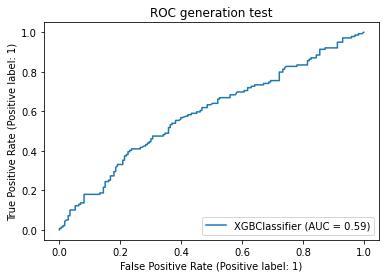

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



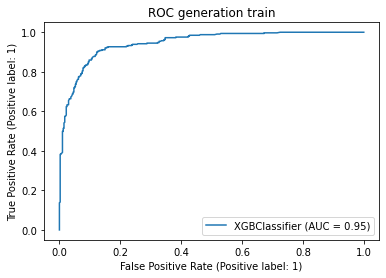

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



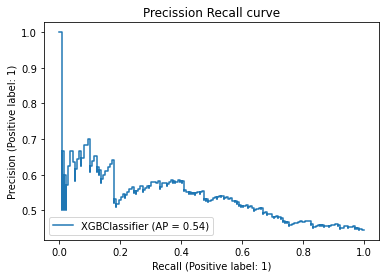

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



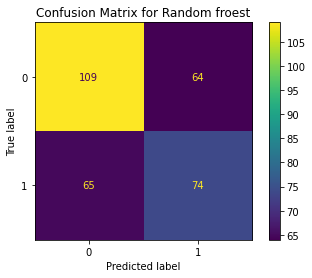

In [90]:

fpr1,tpr1,thresholds=roc_curve(Ytest,TestProbability)
print('AUC test = {:.5f}'.format(roc_auc_score(Ytest, TestProbability)))
print('AUC train = {:.5f}'.format(roc_auc_score(Ytrain, TestProbabilityTrain)))
print(sum(test_pred==Ytest)/len(Ytest))
print(sum(train_pred==Ytrain)/len(Ytrain))
print(confusion_matrix(Ytest, test_pred))
print(classification_report(Ytest, test_pred))
plot_roc_curve(XGBboost_classifier,Xtest,Ytest)
plt.title('ROC generation test')
plt.show()
plot_roc_curve(XGBboost_classifier,Xtrain,Ytrain)
plt.title('ROC generation train')
plt.show()
plot_precision_recall_curve(XGBboost_classifier,Xtest,Ytest)
plt.title('Precission Recall curve')
plt.show()
plot_confusion_matrix(XGBboost_classifier, Xtest, Ytest)
plt.title('Confusion Matrix for Random froest')
plt.show()
#so the problem here it cotains the overfitting

In [91]:
print(list(fpr1),list(tpr1))
tprA=tpr1
fprA=fpr1

[0.0, 0.0, 0.005780346820809248, 0.005780346820809248, 0.011560693641618497, 0.011560693641618497, 0.017341040462427744, 0.017341040462427744, 0.023121387283236993, 0.028901734104046242, 0.028901734104046242, 0.03468208092485549, 0.03468208092485549, 0.03468208092485549, 0.03468208092485549, 0.05202312138728324, 0.05202312138728324, 0.06358381502890173, 0.06358381502890173, 0.06936416184971098, 0.06936416184971098, 0.08092485549132948, 0.08092485549132948, 0.09826589595375723, 0.10982658959537572, 0.1329479768786127, 0.1329479768786127, 0.14450867052023122, 0.14450867052023122, 0.15028901734104047, 0.15028901734104047, 0.16184971098265896, 0.16184971098265896, 0.1676300578034682, 0.1676300578034682, 0.1791907514450867, 0.1791907514450867, 0.18497109826589594, 0.18497109826589594, 0.18497109826589594, 0.1907514450867052, 0.1907514450867052, 0.20809248554913296, 0.20809248554913296, 0.20809248554913296, 0.2138728323699422, 0.2138728323699422, 0.21965317919075145, 0.21965317919075145, 0.2

In [92]:
#we need adjust our parameter 
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40],
    "max_depth":[1,2,3,4,5,6,7,8,10,15,20],
    "scale_pos_weight":[1,2,3,4,5],
    "gamma":[0.01,0.05,0.10,0.20,0.30,0.50,0.75,1.0],
    "reg_lambda":[0.0,0.2,0.3,0.5,1.0,2.0,3.0,5.0,8.0,10.0,50,80,70,60,100,120,200,150,165,300,500,1000],
    "min_child_weight":[1,3,5,7,9,11,20,50,200,2000,60],
    "max_leaves":[1,2,3,4,10,15,20,25,30,35,50,70,100],
    }
Clff=RandomizedSearchCV(XGBboost_classifier,param_distributions=params,n_iter=10,scoring='accuracy',cv=10,verbose=3)
Clff.fit(Xtrain,Ytrain)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[23:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/10] END gamma=1.0, learning_rate=0.15, max_depth=3, max_leaves=15, min_child_weight=200, reg_lambda=1000, scale_pos_weight=1;, score=0.548 total time=   0.9s
[23:47:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/10] END gamma=1.0, learning_rate=0.15, max_depth=3, max_leaves=15, min_child_weight=200, reg_lambda=1000, scale_pos_weight=1;, score=0.548 total time=   0.3s
[23:47:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/10] END gamma=1.0, learning_rate=0.15, max_depth=3, max_leaves=15, min_child_weight=200, reg_lambda=1000, scale_pos_weight=1;, score=0.548 total time=   0.2s
[23:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/10] END gamma=1.0, learning_rate=0.15, max_depth=3, max_leaves=15, min_child_weight=200, reg_lambda=1000, scale_pos_weight=1;, score=0.548 total time=   0.5s
[23:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/10] END gamma=1.0, learning_rate=0.15, max_depth=3, max_leaves=15, min_child_weight=200, reg_lambda=1000, scale_pos_weight=1;, score=0.548 total time=   0.2s
[23:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 6/10] END gamma=1.0, learning_rate=0.15, max_depth=3, max_leaves=15, min_child_weight=200, reg_lambda=1000, scale_pos_weight=1;, score=0.548 total time=   0.2s
[23:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 7/10] END gamma=1.0, learning_rate=0.15, max_depth=3, max_leaves=15, min_child_weight=200, reg_lambda=1000, scale_pos_weight=1;, score=0.548 total time=   0.1s
[23:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 8/10] END gamma=1.0, learning_rate=0.15, max_depth=3, max_leaves=15, min_child_weight=200, reg_lambda=1000, scale_pos_weight=1;, score=0.556 total time=   0.4s
[23:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 9/10] END gamma=1.0, learning_rate=0.15, max_depth=3, max_leaves=15, min_child_weight=200, reg_lambda=1000, scale_pos_weight=1;, score=0.556 total time=   0.1s
[23:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 10/10] END gamma=1.0, learning_rate=0.15, max_depth=3, max_leaves=15, min_child_weight=200, reg_lambda=1000, scale_pos_weight=1;, score=0.556 total time=   0.1s
[23:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/10] END gamma=0.05, learning_rate=0.25, max_depth=10, max_leaves=30, min_child_weight=9, reg_lambda=100, scale_pos_weight=2;, score=0.507 total time=   0.2s
[23:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/10] END gamma=0.05, learning_rate=0.25, max_depth=10, max_leaves=30, min_child_weight=9, reg_lambda=100, scale_pos_weight=2;, score=0.438 total time=   0.4s
[23:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/10] END gamma=0.05, learning_rate=0.25, max_depth=10, max_leaves=30, min_child_weight=9, reg_lambda=100, scale_pos_weight=2;, score=0.616 total time=   0.2s
[23:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/10] END gamma=0.05, learning_rate=0.25, max_depth=10, max_leaves=30, min_child_weight=9, reg_lambda=100, scale_pos_weight=2;, score=0.521 total time=   0.2s
[23:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/10] END gamma=0.05, learning_rate=0.25, max_depth=10, max_leaves=30, min_child_weight=9, reg_lambda=100, scale_pos_weight=2;, score=0.548 total time=   0.2s
[23:47:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 6/10] END gamma=0.05, learning_rate=0.25, max_depth=10, max_leaves=30, min_child_weight=9, reg_lambda=100, scale_pos_weight=2;, score=0.521 total time=   0.3s
[23:47:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 7/10] END gamma=0.05, learning_rate=0.25, max_depth=10, max_leaves=30, min_child_weight=9, reg_lambda=100, scale_pos_weight=2;, score=0.493 total time=   0.1s
[23:47:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 8/10] END gamma=0.05, learning_rate=0.25, max_depth=10, max_leaves=30, min_child_weight=9, reg_lambda=100, scale_pos_weight=2;, score=0.514 total time=   0.1s
[23:47:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 9/10] END gamma=0.05, learning_rate=0.25, max_depth=10, max_leaves=30, min_child_weight=9, reg_lambda=100, scale_pos_weight=2;, score=0.528 total time=   0.1s
[23:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 10/10] END gamma=0.05, learning_rate=0.25, max_depth=10, max_leaves=30, min_child_weight=9, reg_lambda=100, scale_pos_weight=2;, score=0.639 total time=   0.3s
[23:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/10] END gamma=0.75, learning_rate=0.2, max_depth=7, max_leaves=3, min_child_weight=7, reg_lambda=500, scale_pos_weight=3;, score=0.479 total time=   0.1s
[23:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/10] END gamma=0.75, learning_rate=0.2, max_depth=7, max_leaves=3, min_child_weight=7, reg_lambda=500, scale_pos_weight=3;, score=0.479 total time=   0.2s
[23:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/10] END gamma=0.75, learning_rate=0.2, max_depth=7, max_leaves=3, min_child_weight=7, reg_lambda=500, scale_pos_weight=3;, score=0.479 total time=   0.1s
[23:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/10] END gamma=0.75, learning_rate=0.2, max_depth=7, max_leaves=3, min_child_weight=7, reg_lambda=500, scale_pos_weight=3;, score=0.548 total time=   0.3s
[23:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/10] END gamma=0.75, learning_rate=0.2, max_depth=7, max_leaves=3, min_child_weight=7, reg_lambda=500, scale_pos_weight=3;, score=0.479 total time=   0.1s
[23:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 6/10] END gamma=0.75, learning_rate=0.2, max_depth=7, max_leaves=3, min_child_weight=7, reg_lambda=500, scale_pos_weight=3;, score=0.452 total time=   0.1s
[23:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 7/10] END gamma=0.75, learning_rate=0.2, max_depth=7, max_leaves=3, min_child_weight=7, reg_lambda=500, scale_pos_weight=3;, score=0.466 total time=   0.2s
[23:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 8/10] END gamma=0.75, learning_rate=0.2, max_depth=7, max_leaves=3, min_child_weight=7, reg_lambda=500, scale_pos_weight=3;, score=0.528 total time=   0.3s
[23:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 9/10] END gamma=0.75, learning_rate=0.2, max_depth=7, max_leaves=3, min_child_weight=7, reg_lambda=500, scale_pos_weight=3;, score=0.472 total time=   0.2s
[23:48:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 10/10] END gamma=0.75, learning_rate=0.2, max_depth=7, max_leaves=3, min_child_weight=7, reg_lambda=500, scale_pos_weight=3;, score=0.500 total time=   2.5s


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END gamma=0.05, learning_rate=0.1, max_depth=2, max_leaves=50, min_child_weight=9, reg_lambda=5.0, scale_pos_weight=2;, score=0.521 total time=   0.6s
[23:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/10] END gamma=0.05, learning_rate=0.1, max_depth=2, max_leaves=50, min_child_weight=9, reg_lambda=5.0, scale_pos_weight=2;, score=0.466 total time=   0.1s
[23:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/10] END gamma=0.05, learning_rate=0.1, max_depth=2, max_leaves=50, min_child_weight=9, reg_lambda=5.0, scale_pos_weight=2;, score=0.589 total time=   0.2s
[23:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/10] END gamma=0.05, learning_rate=0.1, max_depth=2, max_leaves=50, min_child_weight=9, reg_lambda=5.0, scale_pos_weight=2;, score=0.562 total time=   1.8s
[23:48:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/10] END gamma=0.05, learning_rate=0.1, max_depth=2, max_leaves=50, min_child_weight=9, reg_lambda=5.0, scale_pos_weight=2;, score=0.562 total time=   1.9s
[23:48:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 6/10] END gamma=0.05, learning_rate=0.1, max_depth=2, max_leaves=50, min_child_weight=9, reg_lambda=5.0, scale_pos_weight=2;, score=0.493 total time=   0.1s


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:48:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 7/10] END gamma=0.05, learning_rate=0.1, max_depth=2, max_leaves=50, min_child_weight=9, reg_lambda=5.0, scale_pos_weight=2;, score=0.521 total time=   0.2s
[23:48:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 8/10] END gamma=0.05, learning_rate=0.1, max_depth=2, max_leaves=50, min_child_weight=9, reg_lambda=5.0, scale_pos_weight=2;, score=0.542 total time=   0.1s
[23:48:08] WARNING: C:/Users/Administrator/workspace/xgboo

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 9/10] END gamma=0.05, learning_rate=0.1, max_depth=2, max_leaves=50, min_child_weight=9, reg_lambda=5.0, scale_pos_weight=2;, score=0.556 total time=   0.2s
[23:48:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 10/10] END gamma=0.05, learning_rate=0.1, max_depth=2, max_leaves=50, min_child_weight=9, reg_lambda=5.0, scale_pos_weight=2;, score=0.542 total time=   0.1s
[23:48:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[CV 1/10] END gamma=0.5, learning_rate=0.15, max_depth=4, max_leaves=35, min_child_weight=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.507 total time=   0.7s
[23:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/10] END gamma=0.5, learning_rate=0.15, max_depth=4, max_leaves=35, min_child_weight=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.466 total time=   0.2s
[23:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/10] END gamma=0.5, learning_rate=0.15, max_depth=4, max_leaves=35, min_child_weight=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.507 total time=   0.1s
[23:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/10] END gamma=0.5, learning_rate=0.15, max_depth=4, max_leaves=35, min_child_weight=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.521 total time=   0.2s
[23:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/10] END gamma=0.5, learning_rate=0.15, max_depth=4, max_leaves=35, min_child_weight=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.575 total time=   0.3s
[23:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 6/10] END gamma=0.5, learning_rate=0.15, max_depth=4, max_leaves=35, min_child_weight=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.493 total time=   0.1s
[23:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 7/10] END gamma=0.5, learning_rate=0.15, max_depth=4, max_leaves=35, min_child_weight=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.575 total time=   0.1s

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 8/10] END gamma=0.5, learning_rate=0.15, max_depth=4, max_leaves=35, min_child_weight=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.500 total time=   0.2s
[23:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 9/10] END gamma=0.5, learning_rate=0.15, max_depth=4, max_leaves=35, min_child_weight=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.472 total time=   0.3s
[23:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 10/10] END gamma=0.5, learning_rate=0.15, max_depth=4, max_leaves=35, min_child_weight=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.653 total time=   0.1s

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END gamma=0.2, learning_rate=0.05, max_depth=8, max_leaves=30, min_child_weight=2000, reg_lambda=80, scale_pos_weight=1;, score=0.548 total time=   0.0s
[23:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/10] END gamma=0.2, learning_rate=0.05, max_depth=8, max_leaves=30, min_child_weight=2000, reg_lambda=80, scale_pos_weight=1;, score=0.548 total time=   0.2s
[23:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/10] END gamma=0.2, learning_rate=0.05, max_depth=8, max_leaves=30, min_child_weight=2000, reg_lambda=80, scale_pos_weight=1;, score=0.548 total time=   0.0s
[23:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/10] END gamma=0.2, learning_rate=0.05, max_depth=8, max_leaves=30, min_child_weight=2000, reg_lambda=80, scale_pos_weight=1;, score=0.548 total time=   0.2s
[23:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/10] END gamma=0.2, learning_rate=0.05, max_depth=8, max_leaves=30, min_child_weight=2000, reg_lambda=80, scale_pos_weight=1;, score=0.548 total time=   0.0s
[23:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 6/10] END gamma=0.2, learning_rate=0.05, max_depth=8, max_leaves=30, min_child_weight=2000, reg_lambda=80, scale_pos_weight=1;, score=0.548 total time=   0.0s
[23:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 7/10] END gamma=0.2, learning_rate=0.05, max_depth=8, max_leaves=30, min_child_weight=2000, reg_lambda=80, scale_pos_weight=1;, score=0.548 total time=   0.0s
[23:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 8/10] END gamma=0.2, learning_rate=0.05, max_depth=8, max_leaves=30, min_child_weight=2000, reg_lambda=80, scale_pos_weight=1;, score=0.556 total time=   0.2s
[23:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 9/10] END gamma=0.2, learning_rate=0.05, max_depth=8, max_leaves=30, min_child_weight=2000, reg_lambda=80, scale_pos_weight=1;, score=0.556 total time=   0.1s
[23:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 10/10] END gamma=0.2, learning_rate=0.05, max_depth=8, max_leaves=30, min_child_weight=2000, reg_lambda=80, scale_pos_weight=1;, score=0.556 total time=   0.1s
[23:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END gamma=0.3, learning_rate=0.35, max_depth=3, max_leaves=70, min_child_weight=11, reg_lambda=0.5, scale_pos_weight=5;, score=0.493 total time=   0.1s


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do th

[23:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/10] END gamma=0.3, learning_rate=0.35, max_depth=3, max_leaves=70, min_child_weight=11, reg_lambda=0.5, scale_pos_weight=5;, score=0.507 total time=   0.1s
[23:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/10] END gamma=0.3, learning_rate=0.35, max_depth=3, max_leaves=70, min_child_weight=11, reg_lambda=0.5, scale_pos_weight=5;, score=0.507 total time=   0.2s
[23:48:15] WARNING: C:/Users/Administrator/workspace/xgb

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/10] END gamma=0.3, learning_rate=0.35, max_depth=3, max_leaves=70, min_child_weight=11, reg_lambda=0.5, scale_pos_weight=5;, score=0.548 total time=   0.3s
[23:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/10] END gamma=0.3, learning_rate=0.35, max_depth=3, max_leaves=70, min_child_weight=11, reg_lambda=0.5, scale_pos_weight=5;, score=0.534 total time=   0.1s

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 6/10] END gamma=0.3, learning_rate=0.35, max_depth=3, max_leaves=70, min_child_weight=11, reg_lambda=0.5, scale_pos_weight=5;, score=0.438 total time=   0.1s
[23:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 7/10] END gamma=0.3, learning_rate=0.35, max_depth=3, max_leaves=70, min_child_weight=11, reg_lambda=0.5, scale_pos_weight=5;, score=0.521 total time=   0.1s


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 8/10] END gamma=0.3, learning_rate=0.35, max_depth=3, max_leaves=70, min_child_weight=11, reg_lambda=0.5, scale_pos_weight=5;, score=0.472 total time=   0.4s
[23:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 9/10] END gamma=0.3, learning_rate=0.35, max_depth=3, max_leaves=70, min_child_weight=11, reg_lambda=0.5, scale_pos_weight=5;, score=0.514 total time=   0.1s


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 10/10] END gamma=0.3, learning_rate=0.35, max_depth=3, max_leaves=70, min_child_weight=11, reg_lambda=0.5, scale_pos_weight=5;, score=0.583 total time=   0.1s


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END gamma=0.1, learning_rate=0.3, max_depth=3, max_leaves=3, min_child_weight=9, reg_lambda=80, scale_pos_weight=3;, score=0.534 total time=   0.1s
[23:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/10] END gamma=0.1, learning_rate=0.3, max_depth=3, max_leaves=3, min_child_weight=9, reg_lambda=80, scale_pos_weight=3;, score=0.493 total time=   0.4s
[23:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/10] END gamma=0.1, learning_rate=0.3, max_depth=3, max_leaves=3, min_child_weight=9, reg_lambda=80, scale_pos_weight=3;, score=0.562 total time=   0.1s
[23:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/10] END gamma=0.1, learning_rate=0.3, max_depth=3, max_leaves=3, min_child_weight=9, reg_lambda=80, scale_pos_weight=3;, score=0.521 total time=   0.1s


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/10] END gamma=0.1, learning_rate=0.3, max_depth=3, max_leaves=3, min_child_weight=9, reg_lambda=80, scale_pos_weight=3;, score=0.534 total time=   0.1s
[23:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[CV 6/10] END gamma=0.1, learning_rate=0.3, max_depth=3, max_leaves=3, min_child_weight=9, reg_lambda=80, scale_pos_weight=3;, score=0.493 total time=   0.4s
[23:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 7/10] END gamma=0.1, learning_rate=0.3, max_depth=3, max_leaves=3, min_child_weight=9, reg_lambda=80, scale_pos_weight=3;, score=0.521 total time=   0.1s


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 8/10] END gamma=0.1, learning_rate=0.3, max_depth=3, max_leaves=3, min_child_weight=9, reg_lambda=80, scale_pos_weight=3;, score=0.556 total time=   0.1s

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 9/10] END gamma=0.1, learning_rate=0.3, max_depth=3, max_leaves=3, min_child_weight=9, reg_lambda=80, scale_pos_weight=3;, score=0.514 total time=   0.1s

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 10/10] END gamma=0.1, learning_rate=0.3, max_depth=3, max_leaves=3, min_child_weight=9, reg_lambda=80, scale_pos_weight=3;, score=0.597 total time=   0.1s
[23:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/10] END gamma=0.75, learning_rate=0.2, max_depth=10, max_leaves=15, min_child_weight=5, reg_lambda=10.0, scale_pos_weight=4;, score=0.507 total time=   0.4s
[23:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/10] END gamma=0.75, learning_rate=0.2, max_depth=10, max_leaves=15, min_child_weight=5, reg_lambda=10.0, scale_pos_weight=4;, score=0.411 total time=   0.2s
[23:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/10] END gamma=0.75, learning_rate=0.2, max_depth=10, max_leaves=15, min_child_weight=5, reg_lambda=10.0, scale_pos_weight=4;, score=0.521 total time=   0.2s
[23:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/10] END gamma=0.75, learning_rate=0.2, max_depth=10, max_leaves=15, min_child_weight=5, reg_lambda=10.0, scale_pos_weight=4;, score=0.521 total time=   0.5s
[23:48:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/10] END gamma=0.75, learning_rate=0.2, max_depth=10, max_leaves=15, min_child_weight=5, reg_lambda=10.0, scale_pos_weight=4;, score=0.548 total time=   0.2s
[23:48:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 6/10] END gamma=0.75, learning_rate=0.2, max_depth=10, max_leaves=15, min_child_weight=5, reg_lambda=10.0, scale_pos_weight=4;, score=0.438 total time=   0.4s
[23:48:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 7/10] END gamma=0.75, learning_rate=0.2, max_depth=10, max_leaves=15, min_child_weight=5, reg_lambda=10.0, scale_pos_weight=4;, score=0.589 total time=   0.2s
[23:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 8/10] END gamma=0.75, learning_rate=0.2, max_depth=10, max_leaves=15, min_child_weight=5, reg_lambda=10.0, scale_pos_weight=4;, score=0.514 total time=   0.2s
[23:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 9/10] END gamma=0.75, learning_rate=0.2, max_depth=10, max_leaves=15, min_child_weight=5, reg_lambda=10.0, scale_pos_weight=4;, score=0.556 total time=   0.5s
[23:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 10/10] END gamma=0.75, learning_rate=0.2, max_depth=10, max_leaves=15, min_child_weight=5, reg_lambda=10.0, scale_pos_weight=4;, score=0.611 total time=   0.2s
[23:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/10] END gamma=0.5, learning_rate=0.25, max_depth=5, max_leaves=10, min_child_weight=7, reg_lambda=70, scale_pos_weight=3;, score=0.521 total time=   0.1s
[23:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/10] END gamma=0.5, learning_rate=0.25, max_depth=5, max_leaves=10, min_child_weight=7, reg_lambda=70, scale_pos_weight=3;, score=0.493 total time=   0.3s
[23:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/10] END gamma=0.5, learning_rate=0.25, max_depth=5, max_leaves=10, min_child_weight=7, reg_lambda=70, scale_pos_weight=3;, score=0.575 total time=   0.2s
[23:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/10] END gamma=0.5, learning_rate=0.25, max_depth=5, max_leaves=10, min_child_weight=7, reg_lambda=70, scale_pos_weight=3;, score=0.548 total time=   0.1s
[23:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/10] END gamma=0.5, learning_rate=0.25, max_depth=5, max_leaves=10, min_child_weight=7, reg_lambda=70, scale_pos_weight=3;, score=0.562 total time=   0.2s
[23:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 6/10] END gamma=0.5, learning_rate=0.25, max_depth=5, max_leaves=10, min_child_weight=7, reg_lambda=70, scale_pos_weight=3;, score=0.493 total time=   0.3s
[23:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 7/10] END gamma=0.5, learning_rate=0.25, max_depth=5, max_leaves=10, min_child_weight=7, reg_lambda=70, scale_pos_weight=3;, score=0.534 total time=   0.1s
[23:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 8/10] END gamma=0.5, learning_rate=0.25, max_depth=5, max_leaves=10, min_child_weight=7, reg_lambda=70, scale_pos_weight=3;, score=0.556 total time=   0.1s
[23:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 9/10] END gamma=0.5, learning_rate=0.25, max_depth=5, max_leaves=10, min_child_weight=7, reg_lambda=70, scale_pos_weight=3;, score=0.500 total time=   0.3s
[23:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 10/10] END gamma=0.5, learning_rate=0.25, max_depth=5, max_leaves=10, min_child_weight=7, reg_lambda=70, scale_pos_weight=3;, score=0.611 total time=   0.3s
[23:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estima...
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                         

In [93]:
Clff.best_params_

{'scale_pos_weight': 1,
 'reg_lambda': 1000,
 'min_child_weight': 200,
 'max_leaves': 15,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 1.0}

In [94]:
Clff.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1.0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_delta_step=0,
              max_depth=3, max_leaves=15, min_child_weight=200, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=20,
              reg_alpha=0, reg_lambda=1000, scale_pos_weight=1, seed=20,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [95]:
Model=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.75, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_delta_step=0,
              max_depth=5, max_leaves=50, min_child_weight=9, 
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=20,
              reg_alpha=0, reg_lambda=100, scale_pos_weight=1, seed=20,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
Model.fit(Xtrain,Ytrain,verbose=True,early_stopping_rounds=20,eval_metric='error',eval_set=[(Xtest,Ytest)])
test_pred=Model.predict(Xtest)
train_pred=Model.predict(Xtrain)
TestProbability=Model.predict_proba(Xtest)[:,1] 
TestProbabilityTrain=Model.predict_proba(Xtrain)[:,1] 

[0]	validation_0-error:0.42949
[1]	validation_0-error:0.42949
[2]	validation_0-error:0.40385
[3]	validation_0-error:0.36539
[4]	validation_0-error:0.36539
[5]	validation_0-error:0.35577
[6]	validation_0-error:0.34936
[7]	validation_0-error:0.35256
[8]	validation_0-error:0.35256
[9]	validation_0-error:0.35577
[10]	validation_0-error:0.35256
[11]	validation_0-error:0.33974
[12]	validation_0-error:0.35897
[13]	validation_0-error:0.33974
[14]	validation_0-error:0.34936
[15]	validation_0-error:0.35256
[16]	validation_0-error:0.34615
[17]	validation_0-error:0.34295
[18]	validation_0-error:0.34936
[19]	validation_0-error:0.34295
[20]	validation_0-error:0.33654
[21]	validation_0-error:0.35897
[22]	validation_0-error:0.35577
[23]	validation_0-error:0.35577
[24]	validation_0-error:0.35577
[25]	validation_0-error:0.35577
[26]	validation_0-error:0.35577
[27]	validation_0-error:0.36218
[28]	validation_0-error:0.36218
[29]	validation_0-error:0.37179
[30]	validation_0-error:0.35577
[31]	validation_0-

In [110]:
fpr1,tpr1,thresholds=roc_curve(Ytest,TestProbability)
print('AUC test = {:.5f}'.format(roc_auc_score(Ytest, TestProbability)))
print('AUC train = {:.5f}'.format(roc_auc_score(Ytrain, TestProbabilityTrain)))
print('Ytest',sum(test_pred==Ytest)/len(Ytest))
print(confusion_matrix(Ytest, test_pred))
print(classification_report(Ytest, test_pred))
plot_roc_curve(Model,Xtest,Ytest)
plt.title('ROC generation test')
plt.show()
plot_roc_curve(Model,Xtrain,Ytrain)
plt.title('ROC generation train')
plt.show()
plot_precision_recall_curve(Model,Xtest,Ytest)
plt.title('Precission Recall curve')
plt.show()
plot_confusion_matrix(Model, Xtest, Ytest)
plt.title('Confusion Matrix for Random froest')
plt.show()

AUC test = 0.59737
AUC train = 0.66778
Ytest 0.5256410256410257
[[100  62]
 [ 86  64]]
              precision    recall  f1-score   support

           0       0.54      0.62      0.57       162
           1       0.51      0.43      0.46       150

    accuracy                           0.53       312
   macro avg       0.52      0.52      0.52       312
weighted avg       0.52      0.53      0.52       312



C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



ValueError: Feature shape mismatch, expected: 31, got 10

In [97]:
fprB=[0.0, 0.005780346820809248, 0.005780346820809248, 0.011560693641618497, 0.011560693641618497, 0.017341040462427744, 0.017341040462427744, 0.023121387283236993, 0.023121387283236993, 0.03468208092485549, 0.04046242774566474, 0.04046242774566474, 0.046242774566473986, 0.046242774566473986, 0.06358381502890173, 0.06358381502890173, 0.06936416184971098, 0.06936416184971098, 0.08670520231213873, 0.08670520231213873, 0.09248554913294797, 0.09826589595375723, 0.09826589595375723, 0.10404624277456648, 0.10404624277456648, 0.10982658959537572, 0.10982658959537572, 0.12138728323699421, 0.12138728323699421, 0.13872832369942195, 0.13872832369942195, 0.15028901734104047, 0.15028901734104047, 0.15028901734104047, 0.15028901734104047, 0.15606936416184972, 0.15606936416184972, 0.16184971098265896, 0.16184971098265896, 0.1676300578034682, 0.1676300578034682, 0.17341040462427745, 0.17341040462427745, 0.17341040462427745, 0.1791907514450867, 0.1791907514450867, 0.18497109826589594, 0.18497109826589594, 0.2023121387283237, 0.2023121387283237, 0.20809248554913296, 0.20809248554913296, 0.2138728323699422, 0.2138728323699422, 0.21965317919075145, 0.21965317919075145, 0.2254335260115607, 0.2254335260115607, 0.23699421965317918, 0.23699421965317918, 0.24855491329479767, 0.24855491329479767, 0.2658959537572254, 0.2658959537572254, 0.27167630057803466, 0.27167630057803466, 0.3179190751445087, 0.3179190751445087, 0.3236994219653179, 0.3236994219653179, 0.3468208092485549, 0.3468208092485549, 0.3583815028901734, 0.3583815028901734, 0.36416184971098264, 0.36416184971098264, 0.3699421965317919, 0.3699421965317919, 0.37572254335260113, 0.37572254335260113, 0.3815028901734104, 0.3815028901734104, 0.41040462427745666, 0.41040462427745666, 0.4277456647398844, 0.4277456647398844, 0.4624277456647399, 0.4624277456647399, 0.4797687861271676, 0.4797687861271676, 0.48554913294797686, 0.48554913294797686, 0.4913294797687861, 0.4913294797687861, 0.5028901734104047, 0.5086705202312138, 0.5086705202312138, 0.5202312138728323, 0.5202312138728323, 0.5664739884393064, 0.5664739884393064, 0.5953757225433526, 0.5953757225433526, 0.630057803468208, 0.630057803468208, 0.6358381502890174, 0.6358381502890174, 0.6416184971098265, 0.6416184971098265, 0.6647398843930635, 0.6647398843930635, 0.6705202312138728, 0.6705202312138728, 0.6820809248554913, 0.6820809248554913, 0.6994219653179191, 0.6994219653179191, 0.7052023121387283, 0.7052023121387283, 0.7109826589595376, 0.7109826589595376, 0.7514450867052023, 0.7514450867052023, 0.7630057803468208, 0.7630057803468208, 0.7687861271676301, 0.7687861271676301, 0.7803468208092486, 0.7803468208092486, 0.8034682080924855, 0.8034682080924855, 0.815028901734104, 0.8265895953757225, 0.8323699421965318, 0.8323699421965318, 0.838150289017341, 0.838150289017341, 0.8439306358381503, 0.8439306358381503, 0.8554913294797688, 0.8554913294797688, 0.861271676300578, 0.861271676300578, 0.8670520231213873, 0.8670520231213873, 0.884393063583815, 0.884393063583815, 0.8959537572254336, 0.8959537572254336, 0.9017341040462428, 0.9017341040462428, 0.9364161849710982, 0.9364161849710982, 0.953757225433526, 0.976878612716763, 0.976878612716763, 0.9884393063583815, 0.9884393063583815, 1.0]
tprB=[0.0, 0.0, 0.007194244604316547, 0.007194244604316547, 0.02158273381294964, 0.02158273381294964, 0.06474820143884892, 0.07194244604316546, 0.07913669064748201, 0.09352517985611511, 0.09352517985611511, 0.10071942446043165, 0.10071942446043165, 0.1223021582733813, 0.1223021582733813, 0.14388489208633093, 0.14388489208633093, 0.15827338129496402, 0.15827338129496402, 0.17985611510791366, 0.18705035971223022, 0.18705035971223022, 0.19424460431654678, 0.19424460431654678, 0.22302158273381295, 0.22302158273381295, 0.2446043165467626, 0.2446043165467626, 0.2517985611510791, 0.2517985611510791, 0.2589928057553957, 0.2589928057553957, 0.2733812949640288, 0.28776978417266186, 0.2949640287769784, 0.2949640287769784, 0.30935251798561153, 0.30935251798561153, 0.34532374100719426, 0.34532374100719426, 0.3597122302158273, 0.3597122302158273, 0.38848920863309355, 0.4028776978417266, 0.4028776978417266, 0.4316546762589928, 0.4316546762589928, 0.45323741007194246, 0.45323741007194246, 0.460431654676259, 0.460431654676259, 0.4676258992805755, 0.4676258992805755, 0.4748201438848921, 0.48201438848920863, 0.5179856115107914, 0.5179856115107914, 0.5251798561151079, 0.5251798561151079, 0.5323741007194245, 0.5323741007194245, 0.5539568345323741, 0.5539568345323741, 0.5755395683453237, 0.5755395683453237, 0.5827338129496403, 0.5827338129496403, 0.5899280575539568, 0.5899280575539568, 0.5971223021582733, 0.5971223021582733, 0.60431654676259, 0.60431654676259, 0.6187050359712231, 0.6187050359712231, 0.6258992805755396, 0.6258992805755396, 0.6330935251798561, 0.6330935251798561, 0.6402877697841727, 0.6402877697841727, 0.6546762589928058, 0.6546762589928058, 0.6690647482014388, 0.6690647482014388, 0.6762589928057554, 0.6762589928057554, 0.6834532374100719, 0.6834532374100719, 0.697841726618705, 0.697841726618705, 0.7122302158273381, 0.7122302158273381, 0.7194244604316546, 0.7194244604316546, 0.7194244604316546, 0.7266187050359713, 0.7266187050359713, 0.7338129496402878, 0.7338129496402878, 0.7410071942446043, 0.7410071942446043, 0.7482014388489209, 0.7482014388489209, 0.7553956834532374, 0.7553956834532374, 0.762589928057554, 0.762589928057554, 0.7697841726618705, 0.7697841726618705, 0.7841726618705036, 0.7841726618705036, 0.7913669064748201, 0.7913669064748201, 0.8057553956834532, 0.8057553956834532, 0.8129496402877698, 0.8201438848920863, 0.8273381294964028, 0.8273381294964028, 0.8345323741007195, 0.8345323741007195, 0.841726618705036, 0.841726618705036, 0.8489208633093526, 0.8489208633093526, 0.8561151079136691, 0.8561151079136691, 0.8705035971223022, 0.8705035971223022, 0.8776978417266187, 0.8776978417266187, 0.8776978417266187, 0.8776978417266187, 0.8848920863309353, 0.8848920863309353, 0.8920863309352518, 0.8920863309352518, 0.8992805755395683, 0.8992805755395683, 0.9064748201438849, 0.9064748201438849, 0.9136690647482014, 0.9136690647482014, 0.920863309352518, 0.920863309352518, 0.9280575539568345, 0.9280575539568345, 0.935251798561151, 0.935251798561151, 0.9424460431654677, 0.9424460431654677, 0.9568345323741008, 0.9640287769784173, 0.9640287769784173, 0.9712230215827338, 0.9784172661870504, 0.9928057553956835, 1.0]

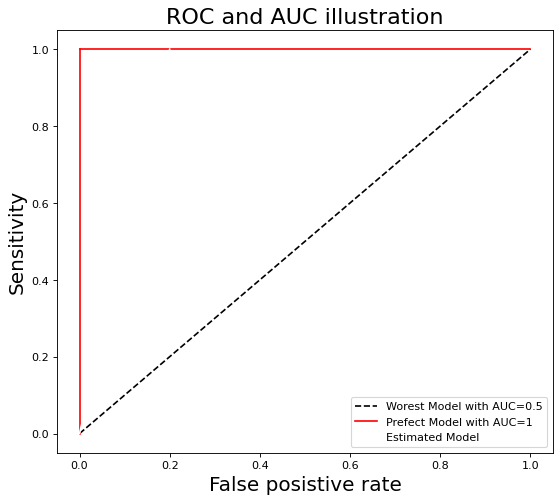

In [16]:
from matplotlib.pyplot import figure

figure(figsize=(8, 7), dpi=80)
plt.plot([0,1],[0,1], 'k--',label='Worest Model with AUC=0.5')
plt.plot([0,0],[0,1], '-',color='r')
#plt.plot(fpr1, tpr1, label= "Random Froest:10% Outliers 80 Accuracy",color='r')
#plt.plot(fprD,tprD,color='teal',label= "Random Froest:2% Outliers 70 Accuracy")
#plt.plot(fprC,tprC,color='peru',label= "Random Froest:Hyperparameter Tun")
plt.plot([0,1],[1,1], '-',color='r',label='Prefect Model with AUC=1')
plt.plot([0,0.2],[0,1], '-',color='white',label='Estimated Model')
plt.xlabel('False posistive rate',fontsize=18)
plt.ylabel('Sensitivity',fontsize=18)
plt.title('ROC and AUC illustration',fontsize=20)
plt.legend()
plt.show()

### Model 3 SVM


In [99]:
### Model 3 SVM
NewData60=Data60.filter(['Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive',
       'selfdefeating', 'age', 'accuracy'],axis=1)
Poly=PolynomialFeatures(degree=2,interaction_only=True)
PolyData=Poly.fit_transform(NewData60)
print(np.shape(PolyData))
print(list(Poly.get_feature_names_out(NewData60.columns)))# a list of names 
FeatureData=PolyData[:,1:32]
print('The features we are choosing {}'.format(len(FeatureData[1,:])))
TargetData=Data60.iloc[:,37]

(1039, 56)
['1', 'Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive', 'selfdefeating', 'age', 'accuracy', 'Q7 Q11', 'Q7 Q15', 'Q7 Q20', 'Q7 affiliative', 'Q7 selfenhacing', 'Q7 aggressive', 'Q7 selfdefeating', 'Q7 age', 'Q7 accuracy', 'Q11 Q15', 'Q11 Q20', 'Q11 affiliative', 'Q11 selfenhacing', 'Q11 aggressive', 'Q11 selfdefeating', 'Q11 age', 'Q11 accuracy', 'Q15 Q20', 'Q15 affiliative', 'Q15 selfenhacing', 'Q15 aggressive', 'Q15 selfdefeating', 'Q15 age', 'Q15 accuracy', 'Q20 affiliative', 'Q20 selfenhacing', 'Q20 aggressive', 'Q20 selfdefeating', 'Q20 age', 'Q20 accuracy', 'affiliative selfenhacing', 'affiliative aggressive', 'affiliative selfdefeating', 'affiliative age', 'affiliative accuracy', 'selfenhacing aggressive', 'selfenhacing selfdefeating', 'selfenhacing age', 'selfenhacing accuracy', 'aggressive selfdefeating', 'aggressive age', 'aggressive accuracy', 'selfdefeating age', 'selfdefeating accuracy', 'age accuracy']
The features we are choosing 31


In [100]:
#Train test, split
#Is a binary classification which we want test the gender to be male or female
Xtrain,Xtest,Ytrain,Ytest=train_test_split(FeatureData,TargetData,test_size=0.3,random_state=2021)
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)
Ytest

931    1
419    0
530    1
99     0
324    1
      ..
602    0
973    0
384    0
123    1
734    1
Name: gender, Length: 312, dtype: int64

In [101]:
FeatureData = scaler.transform(FeatureData)
pca_gender = PCA(n_components=2)
principalComponents_gender = pca_gender.fit_transform(FeatureData)
principalComponents_gender.shape
principal_gender_Df = pd.DataFrame(data=principalComponents_gender, columns=['principal component 1','principal component 2'])
print(principal_gender_Df)
X=principal_gender_Df.values.tolist()
y=TargetData.values.tolist()
print(X)
print(y)

      principal component 1  principal component 2
0                 -1.275833               1.064668
1                 -1.060860               4.473139
2                  0.700421              -0.088978
3                 -2.417984               0.358671
4                 -2.817941              -0.324021
...                     ...                    ...
1034               4.370187               5.617243
1035              -0.152727              -1.804241
1036               1.187894               5.101651
1037              -2.895401              -0.400696
1038              -3.558116               0.732276

[1039 rows x 2 columns]
[[-1.2758333937650532, 1.0646678306906587], [-1.0608598622855787, 4.473138757626505], [0.7004212428128067, -0.08897796920108868], [-2.417983604471034, 0.3586711346145091], [-2.8179409637092725, -0.3240211182358742], [-1.112859344959989, 1.2184227139465231], [3.1595287089580277, -1.5183937888456371], [-0.832977448903672, 2.253175407424067], [-0.08435707285626845

<Figure size 432x288 with 0 Axes>

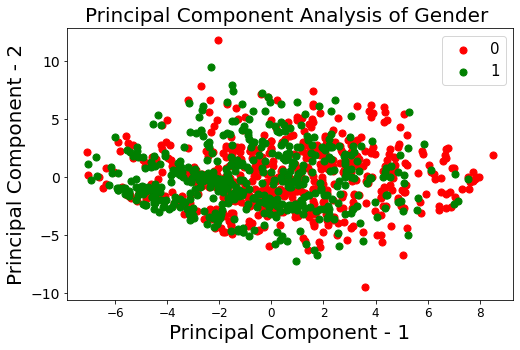

In [102]:
plt.figure()
plt.figure(figsize=(8,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title('Principal Component Analysis of Gender ',fontsize=20)

targets = [0, 1]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = Data60['gender'] == target
    if color=='r':
        mark="o"
    else:
        mark="o"
    plt.scatter(principal_gender_Df.loc[indicesToKeep, 'principal component 1']
               , principal_gender_Df.loc[indicesToKeep, 'principal component 2'], c=color,marker=mark, s=50)

plt.legend(targets,prop={'size':15})

In [103]:
def DrawPlot(Feature,Target,Model):
    MinX1,MinX2=np.min(Feature,axis=0)-1
    MaxX1,MaxX2=np.max(Feature,axis=0)+1
    X1,X2=np.meshgrid(np.arange(MinX1,MaxX1,0.01),np.arange(MinX2,MaxX2,0.01))
    model=Model.predict(np.transpose(np.array([X1.ravel(),X2.ravel()]))).reshape(X1.shape)
    plt.figure(figsize=(8,5))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel('Principal Component - 1',fontsize=20)
    plt.ylabel('Principal Component - 2',fontsize=20)


    plt.contourf(X1,X2,model)
    #plt.legend(targets,prop={'size':15})
    targets = [0, 1]
    colors = ['red', 'green']
    for target, colos in zip(targets,colors):
        indicesToKeep = Data60['gender'] == target
        if colos=='red':
            mark="x"
            lab='Male'
        else:
            mark="."
            lab='Female'
        plt.scatter(principal_gender_Df.loc[indicesToKeep, 'principal component 1']
                , principal_gender_Df.loc[indicesToKeep, 'principal component 2'], color=colos,marker=mark,label=lab, s=50)
    plt.legend()
    plt.show()

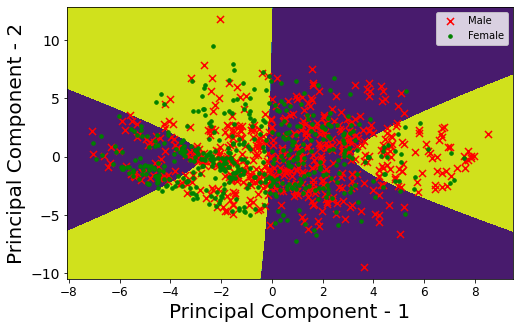

In [104]:
CLF=SVC(kernel='sigmoid',random_state=2022,gamma=0.1,C=20.0)
CLF.fit(X,y)
DrawPlot(X,y,CLF)


In [105]:
NewData60=Data60.filter(['Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive',
       'selfdefeating', 'age', 'accuracy'],axis=1)
Poly=PolynomialFeatures(degree=2,interaction_only=True)
PolyData=Poly.fit_transform(NewData60)
print(np.shape(PolyData))
print(list(Poly.get_feature_names_out(NewData60.columns)))# a list of names 
FeatureData=PolyData[:,1:16]
TargetData=Data60.iloc[:,37]


(1039, 56)
['1', 'Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive', 'selfdefeating', 'age', 'accuracy', 'Q7 Q11', 'Q7 Q15', 'Q7 Q20', 'Q7 affiliative', 'Q7 selfenhacing', 'Q7 aggressive', 'Q7 selfdefeating', 'Q7 age', 'Q7 accuracy', 'Q11 Q15', 'Q11 Q20', 'Q11 affiliative', 'Q11 selfenhacing', 'Q11 aggressive', 'Q11 selfdefeating', 'Q11 age', 'Q11 accuracy', 'Q15 Q20', 'Q15 affiliative', 'Q15 selfenhacing', 'Q15 aggressive', 'Q15 selfdefeating', 'Q15 age', 'Q15 accuracy', 'Q20 affiliative', 'Q20 selfenhacing', 'Q20 aggressive', 'Q20 selfdefeating', 'Q20 age', 'Q20 accuracy', 'affiliative selfenhacing', 'affiliative aggressive', 'affiliative selfdefeating', 'affiliative age', 'affiliative accuracy', 'selfenhacing aggressive', 'selfenhacing selfdefeating', 'selfenhacing age', 'selfenhacing accuracy', 'aggressive selfdefeating', 'aggressive age', 'aggressive accuracy', 'selfdefeating age', 'selfdefeating accuracy', 'age accuracy']


In [106]:
#X=QuestionData60[:,:-2]
#X['accuracy']=QuestionData60['accuracy']
#y=QuestionData60[:,37]
y=TargetData
X=FeatureData
cv=KFold(n_splits=5,random_state=1,shuffle=True)
rf_model=SVC(probability=True,kernel='rbf')
sco=cross_val_score(rf_model,X,y,scoring='accuracy',cv=cv,n_jobs=1)
print('Accuracy',sco)

Accuracy [0.5625     0.61538462 0.56730769 0.55288462 0.62318841]


In [107]:
'''Data=Data60.copy()
Data['gender'].replace(1, 0,inplace=True)#change labels back to male and female
Data['gender'].replace(2, 1,inplace=True) #make sure change the correct variable run '''

"Data=Data60.copy()\nData['gender'].replace(1, 0,inplace=True)#change labels back to male and female\nData['gender'].replace(2, 1,inplace=True) #make sure change the correct variable run "

In [108]:
NewData60=Data60.filter(['Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive',
       'selfdefeating', 'age', 'accuracy'],axis=1)
Poly=PolynomialFeatures(degree=2,interaction_only=True)
PolyData=Poly.fit_transform(NewData60)
print(np.shape(PolyData))
print(list(Poly.get_feature_names_out(NewData60.columns)))# a list of names 
FeatureData=PolyData[:,1:13]
TargetData=Data60.iloc[:,37]

(1039, 56)
['1', 'Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive', 'selfdefeating', 'age', 'accuracy', 'Q7 Q11', 'Q7 Q15', 'Q7 Q20', 'Q7 affiliative', 'Q7 selfenhacing', 'Q7 aggressive', 'Q7 selfdefeating', 'Q7 age', 'Q7 accuracy', 'Q11 Q15', 'Q11 Q20', 'Q11 affiliative', 'Q11 selfenhacing', 'Q11 aggressive', 'Q11 selfdefeating', 'Q11 age', 'Q11 accuracy', 'Q15 Q20', 'Q15 affiliative', 'Q15 selfenhacing', 'Q15 aggressive', 'Q15 selfdefeating', 'Q15 age', 'Q15 accuracy', 'Q20 affiliative', 'Q20 selfenhacing', 'Q20 aggressive', 'Q20 selfdefeating', 'Q20 age', 'Q20 accuracy', 'affiliative selfenhacing', 'affiliative aggressive', 'affiliative selfdefeating', 'affiliative age', 'affiliative accuracy', 'selfenhacing aggressive', 'selfenhacing selfdefeating', 'selfenhacing age', 'selfenhacing accuracy', 'aggressive selfdefeating', 'aggressive age', 'aggressive accuracy', 'selfdefeating age', 'selfdefeating accuracy', 'age accuracy']


In [111]:
perftest=[]
perftrain=[]
for i in range(11,57):
    Feature=PolyData[:,1:i]
    Target=Data60.iloc[:,37]
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(Feature,Target,test_size=0.3,random_state=20)
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    print(np.shape(Xtrain))
    Xtest = scaler.transform(Xtest)
    rf_model=SVC(probability=True,kernel='linear')
#train and evl
    rf_model.fit(Xtrain,Ytrain)
    y_test_pred=rf_model.predict(Xtest)
    y_train_pred=rf_model.predict(Xtrain)
    TestProbability=rf_model.predict_proba(Xtest)[:,1] 
    TestProbabilityTrain=rf_model.predict_proba(Xtrain)[:,1] 
    AccuracyTest=sum(y_test_pred==Ytest)/len(Ytest)
    AccuracyTrain=sum(y_train_pred==Ytrain)/len(Ytrain)
    perftrain.append(AccuracyTrain)
    perftest.append(AccuracyTest)

(727, 10)
(727, 11)
(727, 12)
(727, 13)
(727, 14)
(727, 15)
(727, 16)
(727, 17)
(727, 18)
(727, 19)
(727, 20)
(727, 21)
(727, 22)
(727, 23)
(727, 24)
(727, 25)
(727, 26)
(727, 27)
(727, 28)
(727, 29)
(727, 30)
(727, 31)
(727, 32)
(727, 33)
(727, 34)
(727, 35)
(727, 36)
(727, 37)
(727, 38)
(727, 39)
(727, 40)
(727, 41)
(727, 42)
(727, 43)
(727, 44)
(727, 45)
(727, 46)
(727, 47)
(727, 48)
(727, 49)
(727, 50)
(727, 51)
(727, 52)
(727, 53)
(727, 54)
(727, 55)


ValueError: x and y must have same first dimension, but have shapes (100,) and (46,)

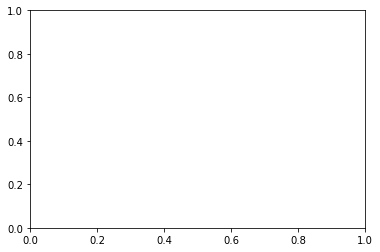

In [112]:
plt.plot(range(1,101),perftest,label='test accuracy')
plt.plot(range(1,101),perftrain,label='train accuracy')
plt.xlabel('Number of feature')
plt.ylabel('Accuracy Score')
plt.legend(loc=4)
plt.vlines(x=13,color='black',ymin=0.5,ymax=0.6,linestyles='--')
plt.show()

In [ ]:
#Train test, split
#Is a binary classification which we want test the gender to be male or female
Xtrain,Xtest,Ytrain,Ytest=train_test_split(FeatureData,TargetData,test_size=0.3,random_state=2021)
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)
Ytrain

45     1
90     1
495    1
569    2
183    1
      ..
669    1
830    2
44     2
621    1
57     2
Name: gender, Length: 727, dtype: int64

AUC test = 0.58207
AUC train = 0.80153
0.5833333333333334
0.7125171939477304
[[122  51]
 [ 79  60]]
              precision    recall  f1-score   support

           0       0.61      0.71      0.65       173
           1       0.54      0.43      0.48       139

    accuracy                           0.58       312
   macro avg       0.57      0.57      0.57       312
weighted avg       0.58      0.58      0.58       312



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



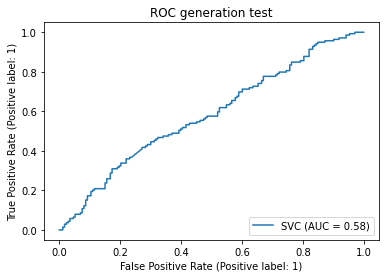

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



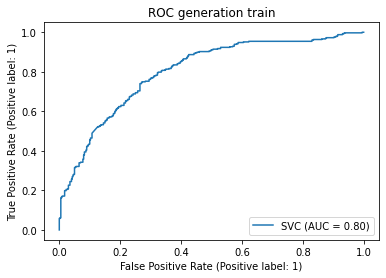

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



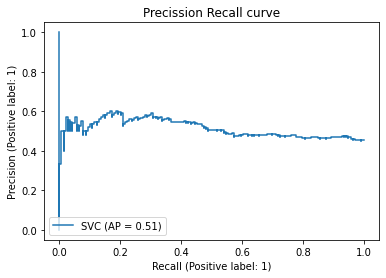

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



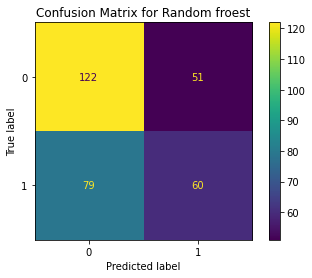

In [ ]:
#svm
rf_model=SVC(probability=True,kernel='rbf')
#train and evl
rf_model.fit(Xtrain,Ytrain)
y_test_pred=rf_model.predict(Xtest)
y_train_pred=rf_model.predict(Xtrain)
TestProbability=rf_model.predict_proba(Xtest)[:,1] 
TestProbabilityTrain=rf_model.predict_proba(Xtrain)[:,1] 
fpr1,tpr1,thresholds=roc_curve(Ytest,TestProbability)
print('AUC test = {:.5f}'.format(roc_auc_score(Ytest, TestProbability)))
print('AUC train = {:.5f}'.format(roc_auc_score(Ytrain, TestProbabilityTrain)))
print(sum(y_test_pred==Ytest)/len(Ytest))
print(sum(y_train_pred==Ytrain)/len(Ytrain))
print(confusion_matrix(Ytest, y_test_pred))
print(classification_report(Ytest, y_test_pred))
plot_roc_curve(rf_model,Xtest,Ytest)
plt.title('ROC generation test')
plt.show()
plot_roc_curve(rf_model,Xtrain,Ytrain)
plt.title('ROC generation train')
plt.show()
plot_precision_recall_curve(rf_model,Xtest,Ytest)
plt.title('Precission Recall curve')
plt.show()
plot_confusion_matrix(rf_model, Xtest, Ytest)
plt.title('Confusion Matrix for Random froest')
plt.show()

In [ ]:
#X=QuestionData60[:,:-2]
#X['accuracy']=QuestionData60['accuracy']
#y=QuestionData60[:,37]
y=TargetData
X=FeatureData
cv=KFold(n_splits=5,random_state=1,shuffle=True)
rf_model=SVC(probability=True,kernel='linear')
sco=cross_val_score(rf_model,X,y,scoring='accuracy',cv=cv,n_jobs=1)
print('Accuracy',sco)

KeyboardInterrupt: 

AUC test = 0.65644
AUC train = 0.63287
0.6282051282051282
0.5845942228335625
[[130  43]
 [ 73  66]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       173
           1       0.61      0.47      0.53       139

    accuracy                           0.63       312
   macro avg       0.62      0.61      0.61       312
weighted avg       0.62      0.63      0.62       312



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



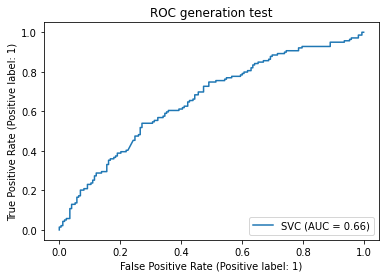

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



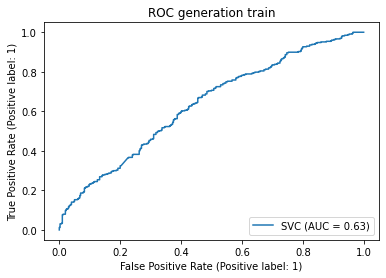

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



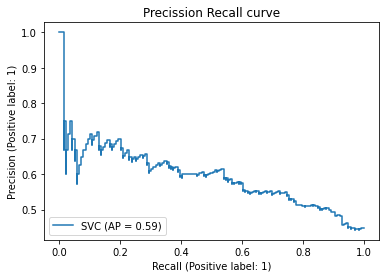

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



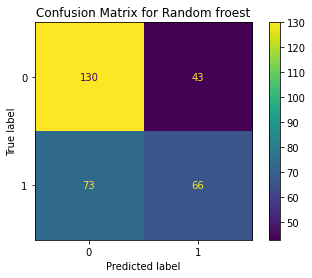

In [ ]:
#svm
rf_model=SVC(probability=True,kernel='linear')
#train and evl
rf_model.fit(Xtrain,Ytrain)
y_test_pred=rf_model.predict(Xtest)
y_train_pred=rf_model.predict(Xtrain)
TestProbability=rf_model.predict_proba(Xtest)[:,1] 
TestProbabilityTrain=rf_model.predict_proba(Xtrain)[:,1] 
fpr2,tpr2,thresholds=roc_curve(Ytest,TestProbability)
print('AUC test = {:.5f}'.format(roc_auc_score(Ytest, TestProbability)))
print('AUC train = {:.5f}'.format(roc_auc_score(Ytrain, TestProbabilityTrain)))
print(sum(y_test_pred==Ytest)/len(Ytest))
print(sum(y_train_pred==Ytrain)/len(Ytrain))
print(confusion_matrix(Ytest, y_test_pred))
print(classification_report(Ytest, y_test_pred))
plot_roc_curve(rf_model,Xtest,Ytest)
plt.title('ROC generation test')
plt.show()
plot_roc_curve(rf_model,Xtrain,Ytrain)
plt.title('ROC generation train')
plt.show()
plot_precision_recall_curve(rf_model,Xtest,Ytest)
plt.title('Precission Recall curve')
plt.show()
plot_confusion_matrix(rf_model, Xtest, Ytest)
plt.title('Confusion Matrix for Random froest')
plt.show()

In [ ]:
#X=QuestionData60[:,:-2]
#X['accuracy']=QuestionData60['accuracy']
#y=QuestionData60[:,37]
y=TargetData
X=FeatureData
cv=KFold(n_splits=5,random_state=1,shuffle=True)
rf_model=SVC(probability=True,kernel='poly')
sco=cross_val_score(rf_model,X,y,scoring='accuracy',cv=cv,n_jobs=1)
print('Accuracy',sco)

Accuracy [0.60576923 0.61057692 0.55769231 0.5625     0.66666667]


AUC test = 0.58864
AUC train = 0.79716
0.5673076923076923
0.7097661623108665
[[135  38]
 [ 97  42]]
              precision    recall  f1-score   support

           0       0.58      0.78      0.67       173
           1       0.53      0.30      0.38       139

    accuracy                           0.57       312
   macro avg       0.55      0.54      0.53       312
weighted avg       0.56      0.57      0.54       312



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



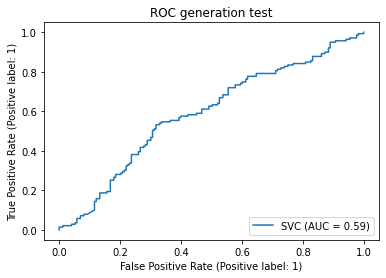

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



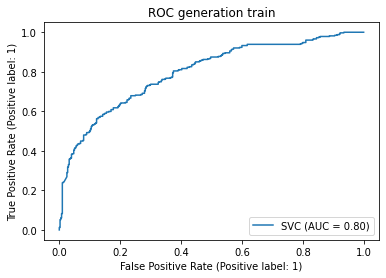

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



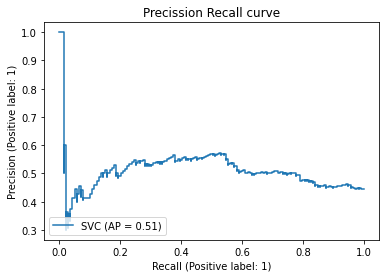

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



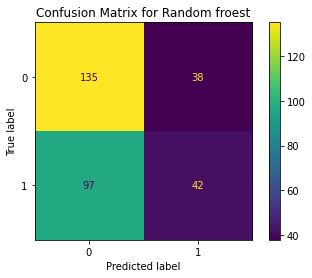

In [ ]:
#svm
rf_model=SVC(probability=True,kernel='poly')
#train and evl
rf_model.fit(Xtrain,Ytrain)
y_test_pred=rf_model.predict(Xtest)
y_train_pred=rf_model.predict(Xtrain)
TestProbability=rf_model.predict_proba(Xtest)[:,1] 
TestProbabilityTrain=rf_model.predict_proba(Xtrain)[:,1] 
fpr3,tpr3,thresholds=roc_curve(Ytest,TestProbability)
print('AUC test = {:.5f}'.format(roc_auc_score(Ytest, TestProbability)))
print('AUC train = {:.5f}'.format(roc_auc_score(Ytrain, TestProbabilityTrain)))
print(sum(y_test_pred==Ytest)/len(Ytest))
print(sum(y_train_pred==Ytrain)/len(Ytrain))
print(confusion_matrix(Ytest, y_test_pred))
print(classification_report(Ytest, y_test_pred))
plot_roc_curve(rf_model,Xtest,Ytest)
plt.title('ROC generation test')
plt.show()
plot_roc_curve(rf_model,Xtrain,Ytrain)
plt.title('ROC generation train')
plt.show()
plot_precision_recall_curve(rf_model,Xtest,Ytest)
plt.title('Precission Recall curve')
plt.show()
plot_confusion_matrix(rf_model, Xtest, Ytest)
plt.title('Confusion Matrix for Random froest')
plt.show()

In [ ]:
#X=QuestionData60[:,:-2]
#X['accuracy']=QuestionData60['accuracy']
#y=QuestionData60[:,37]
y=TargetData
X=FeatureData
cv=KFold(n_splits=5,random_state=1,shuffle=True)
rf_model=SVC(probability=True,kernel='sigmoid')
sco=cross_val_score(rf_model,X,y,scoring='accuracy',cv=cv,n_jobs=1)
print('Accuracy',sco)


Accuracy [0.53846154 0.54326923 0.58653846 0.51923077 0.60869565]


AUC test = 0.61829
AUC train = 0.45198
0.6057692307692307
0.4855570839064649
[[111  62]
 [ 61  78]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       173
           1       0.56      0.56      0.56       139

    accuracy                           0.61       312
   macro avg       0.60      0.60      0.60       312
weighted avg       0.61      0.61      0.61       312



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



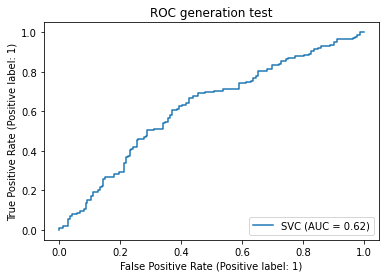

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



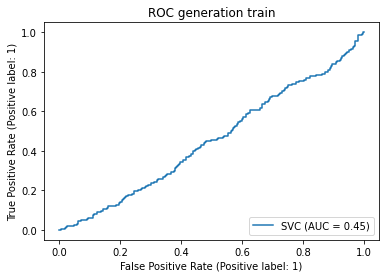

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



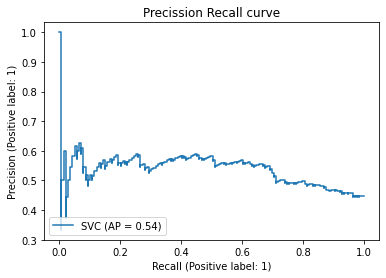

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



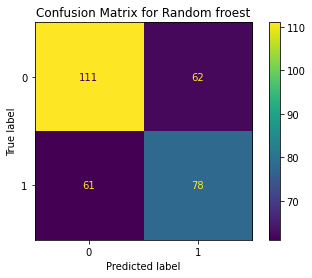

In [ ]:
#svm
rf_model=SVC(probability=True,kernel='sigmoid')
#train and evl
rf_model.fit(Xtrain,Ytrain)
y_test_pred=rf_model.predict(Xtest)
y_train_pred=rf_model.predict(Xtrain)
TestProbability=rf_model.predict_proba(Xtest)[:,1] 
TestProbabilityTrain=rf_model.predict_proba(Xtrain)[:,1] 
fpr4,tpr4,thresholds=roc_curve(Ytest,TestProbability)
print('AUC test = {:.5f}'.format(roc_auc_score(Ytest, TestProbability)))
print('AUC train = {:.5f}'.format(roc_auc_score(Ytrain, TestProbabilityTrain)))
print(sum(y_test_pred==Ytest)/len(Ytest))
print(sum(y_train_pred==Ytrain)/len(Ytrain))
print(confusion_matrix(Ytest, y_test_pred))
print(classification_report(Ytest, y_test_pred))
plot_roc_curve(rf_model,Xtest,Ytest)
plt.title('ROC generation test')
plt.show()
plot_roc_curve(rf_model,Xtrain,Ytrain)
plt.title('ROC generation train')
plt.show()
plot_precision_recall_curve(rf_model,Xtest,Ytest)
plt.title('Precission Recall curve')
plt.show()
plot_confusion_matrix(rf_model, Xtest, Ytest)
plt.title('Confusion Matrix for Random froest')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
Parameters={'kernel':['linear'],
            'C':[0.1 *i for i in range(1,101)],
            'gamma':[1.0]}   

SvmModel=SVC()
Grid=GridSearchCV(SvmModel,Parameters,cv=10,refit=True,verbose=2)
Grid.fit(Xtrain,Ytrain)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ....................C=0.1, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ....................C=0.2, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ....................C=0.2, gamma=1.

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8, 0.9,
                               1.0, 1.1, 1.2000000000000002, 1.3,
                               1.4000000000000001, 1.5, 1.6, 1.7000000000000002,
                               1.8, 1.9000000000000001, 2.0, 2.1, 2.2,
                               2.3000000000000003, 2.4000000000000004, 2.5, 2.6,
                               2.7, 2.8000000000000003, 2.9000000000000004, 3.0, ...],
                         'gamma': [1.0], 'kernel': ['linear']},
             verbose=2)

In [ ]:
Grid.best_params_


{'C': 0.1, 'gamma': 1.0, 'kernel': 'linear'}

In [ ]:
Grid.best_estimator_

SVC(C=0.1, gamma=1.0, kernel='linear')

In [ ]:
Data=Data60.copy()
Data['gender'].replace(1, 0,inplace=True)#change labels back to male and female
Data['gender'].replace(2, 1,inplace=True) #make sure change the correct variable

In [ ]:
NewData60=Data60.filter(['Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive',
       'selfdefeating', 'age', 'accuracy'],axis=1)
Poly=PolynomialFeatures(degree=2,interaction_only=True)
PolyData=Poly.fit_transform(NewData60)

print(np.shape(PolyData))
print(list(Poly.get_feature_names_out(NewData60.columns)))# a list of names 
FeatureData=PolyData[:,1:13]
TargetData=Data.iloc[:,37]

(1039, 56)
['1', 'Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive', 'selfdefeating', 'age', 'accuracy', 'Q7 Q11', 'Q7 Q15', 'Q7 Q20', 'Q7 affiliative', 'Q7 selfenhacing', 'Q7 aggressive', 'Q7 selfdefeating', 'Q7 age', 'Q7 accuracy', 'Q11 Q15', 'Q11 Q20', 'Q11 affiliative', 'Q11 selfenhacing', 'Q11 aggressive', 'Q11 selfdefeating', 'Q11 age', 'Q11 accuracy', 'Q15 Q20', 'Q15 affiliative', 'Q15 selfenhacing', 'Q15 aggressive', 'Q15 selfdefeating', 'Q15 age', 'Q15 accuracy', 'Q20 affiliative', 'Q20 selfenhacing', 'Q20 aggressive', 'Q20 selfdefeating', 'Q20 age', 'Q20 accuracy', 'affiliative selfenhacing', 'affiliative aggressive', 'affiliative selfdefeating', 'affiliative age', 'affiliative accuracy', 'selfenhacing aggressive', 'selfenhacing selfdefeating', 'selfenhacing age', 'selfenhacing accuracy', 'aggressive selfdefeating', 'aggressive age', 'aggressive accuracy', 'selfdefeating age', 'selfdefeating accuracy', 'age accuracy']


In [ ]:
#Train test, split
#Is a binary classification which we want test the gender to be male or female
Xtrain,Xtest,Ytrain,Ytest=train_test_split(FeatureData,TargetData,test_size=0.3,random_state=2021)
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)
Ytrain

45     0
90     0
495    0
569    1
183    0
      ..
669    0
830    1
44     1
621    0
57     1
Name: gender, Length: 727, dtype: int64

AUC test = 0.66353
AUC train = 0.63388
0.6378205128205128
0.5955983493810179
[[130  43]
 [ 70  69]]
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       173
           1       0.62      0.50      0.55       139

    accuracy                           0.64       312
   macro avg       0.63      0.62      0.62       312
weighted avg       0.63      0.64      0.63       312



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



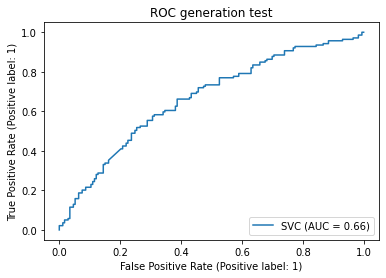

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



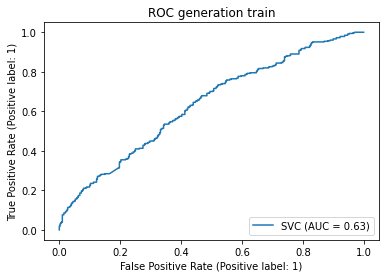

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



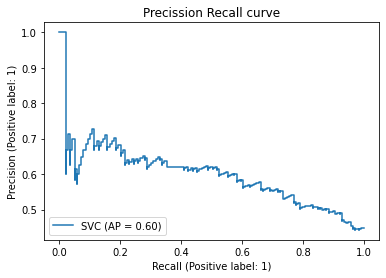

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



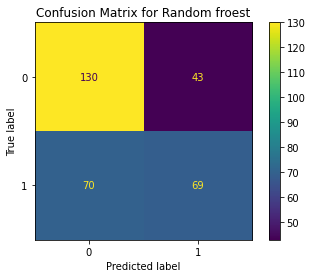

In [ ]:
rf_model=SVC(C=0.2, gamma=1, kernel='linear',probability=True)
#train and evl
rf_model.fit(Xtrain,Ytrain)
y_test_pred=rf_model.predict(Xtest)
y_train_pred=rf_model.predict(Xtrain)
TestProbability=rf_model.predict_proba(Xtest)[:,1] 
TestProbabilityTrain=rf_model.predict_proba(Xtrain)[:,1] 
fpr5,tpr5,thresholds=roc_curve(Ytest,TestProbability)
print('AUC test = {:.5f}'.format(roc_auc_score(Ytest, TestProbability)))
print('AUC train = {:.5f}'.format(roc_auc_score(Ytrain, TestProbabilityTrain)))
print(sum(y_test_pred==Ytest)/len(Ytest))
print(sum(y_train_pred==Ytrain)/len(Ytrain))
print(confusion_matrix(Ytest, y_test_pred))
print(classification_report(Ytest, y_test_pred))
plot_roc_curve(rf_model,Xtest,Ytest)
plt.title('ROC generation test')
plt.show()
plot_roc_curve(rf_model,Xtrain,Ytrain)
plt.title('ROC generation train')
plt.show()
plot_precision_recall_curve(rf_model,Xtest,Ytest)
plt.title('Precission Recall curve')
plt.show()
plot_confusion_matrix(rf_model, Xtest, Ytest)
plt.title('Confusion Matrix for Random froest')
plt.show()

In [ ]:
print(list(fpr5),list(tpr5))

[0.0, 0.0, 0.0, 0.011560693641618497, 0.011560693641618497, 0.017341040462427744, 0.017341040462427744, 0.028901734104046242, 0.028901734104046242, 0.03468208092485549, 0.03468208092485549, 0.046242774566473986, 0.046242774566473986, 0.05202312138728324, 0.05202312138728324, 0.06358381502890173, 0.06358381502890173, 0.07514450867052024, 0.07514450867052024, 0.08670520231213873, 0.08670520231213873, 0.10404624277456648, 0.10404624277456648, 0.10982658959537572, 0.10982658959537572, 0.11560693641618497, 0.11560693641618497, 0.12138728323699421, 0.12138728323699421, 0.12716763005780346, 0.12716763005780346, 0.14450867052023122, 0.14450867052023122, 0.15028901734104047, 0.15028901734104047, 0.16184971098265896, 0.16184971098265896, 0.1676300578034682, 0.1676300578034682, 0.17341040462427745, 0.17341040462427745, 0.19653179190751446, 0.19653179190751446, 0.20809248554913296, 0.20809248554913296, 0.21965317919075145, 0.21965317919075145, 0.2254335260115607, 0.2254335260115607, 0.236994219653

In [ ]:
plt.plot(fpr1,tpr1,color='purple',label= "SVM:rbf kernel")
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr2,tpr2,label='SVM:linear kernel',color='r')
plt.plot([0,0],[0,1], '-',color='b')
plt.plot(fpr3, tpr3, label= "SVM:poly kernel",color='g')
plt.plot(fpr4,tpr4,color='teal',label= "SVM:sigmoid kernel")
plt.plot([0,1],[1,1], '-',color='b',label='Prefect Model')
plt.plot(fpr5,tpr5,color='lightcoral',label= "SVM:linear with Hyperparameter tun")
plt.xlabel('False posistive rate')
plt.ylabel('True posistive Rate')
plt.legend()
plt.show()

#### Below are the dataset created for accuracy below 70 and 80 separately, the reason doing this way is that i have been working on 3 ipynb file for easy comparsion, apologies to make confusion here  

data=pd.read_csv('data.csv')
data.info()
data.head()

In [ ]:
'''Step 2 Missing value'''
#-1 means did not select an answer in the questions so we need check all the -1 values in the Q1-Q32

def OutlierCheck(data,Question,OtherV):
    '''
    #Inputs:
    #the data and number of question interesting
    #use OtherV to check if there are other values other than -1 and 1 to 5
     
    #Returns:
    #Two list: MissingValue is the position of the data rather than 1-5
    #CorrespodingQuestion is the column for that missing value
    '''
    MissingValue=[]
    CorrespodingQuestion=[]
    OtherValue=[]
    for i in range(1,Question+1):
        Q='Q'
        Qdata=data[Q+str(i)]
        Qdata=np.array(Qdata)
        Qlist=[1.0,2.0,3.0,4.0,5.0]
        count=0
        for j in range(len(Qdata)):
            if Qdata[j] not in Qlist:
                if Qdata[j]!=-1:
                    OtherValue.append(Qdata[j])
                MissingValue.append(j)
                CorrespodingQuestion.append(i)
            else:
                count+=1
            j+=1
        i=i+1
    if OtherV:
        return MissingValue,CorrespodingQuestion,OtherValue
    else:
        return MissingValue,CorrespodingQuestion
        
    

Numpydata1=np.array(data)#transfer the format of the data to numpy array 

print('The missing value is :',OutlierCheck(data,32,False))#should have no other value rather than -1 and 1 to 5 
#this will gives the missing data position
print('The Q data that witout an answer :',Numpydata1[773,4])#just double check 

print(np.shape(Numpydata1))#total of size 1071 datas and 39 columns
mean=data.describe().loc['mean']#39 columns means 
SumData=[element*1071 for element in mean]
Qmean=SumData[0:32] # we only need the first 32 columns 
#since this summation contains -1 in the data we first work out how many -1 
#say m here in each of the question's data
#then we take mean- m*(-1) divided by (1071-m) and round up to nerest integer as an input for our missing values (-1's)
#we want replace the missing values by the mean value 

MissingValue1,CorrespodingQ1=OutlierCheck(data,32,False)
df = pd.DataFrame({'freq':CorrespodingQ1})
Mvalues=list(df['freq'].value_counts().sort_index())#work out how many -1 it has for each of the Question
print('How many missing values the individual variable contains :',Mvalues)
print(len(Mvalues))
print(Qmean)
QnewMean=[]
for i in range(len(Mvalues)):
    if Mvalues[i]==0:
        QnewMean.append(round(Qmean[i]/1071))
    else:
        QnewMean.append(round((Qmean[i]-Mvalues[i]*(-1))/(1071-Mvalues[i])))#mean value and round to nearest integer

print('The length should be 32 and the correspoding mean values ')
print(len(QnewMean),QnewMean) # the length should be 32 since we have 32 question
#Then replace each -1's to the correspoding Question new mean value
for i in range(len(MissingValue1)):
    Numpydata1[MissingValue1[i],CorrespodingQ1[i]-1]=QnewMean[CorrespodingQ1[i]-1]#change the -1 by correspoding round up mean values
print('The Q data that witout an answer :',Numpydata1[773,4])

In [ ]:
#so now there should be no missing values in Q1-Q32
#Let change back to dataframe 
column=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20'
         ,'Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31','Q32']
QuestionData=pd.DataFrame(Numpydata1[:,0:32],columns=column)
print(('The new missing value check :',OutlierCheck(QuestionData,32,False)))#check so no other value that are not in scale 
print(QuestionData.head(5))#should be okay we know calculate the affiliative,seltenhacing, agressive and self defeating

In [ ]:
#we now use Q1-Q32 to calculate the affiliative,self-enhacing,aggressive,self-defeating variables and save it as a new column
#to QuestionData
def affiliativeV(Data):
    return round(((6-Data['Q1'])+Data['Q5']+(6-Data['Q9'])+Data['Q13']+(6-Data['Q17'])+Data['Q21']+(6-Data['Q25'])+(6-Data['Q29']))/8,1)


def selfenhacingV(Data):
    return round((Data['Q2']+Data['Q6']+Data['Q10']+Data['Q14']+Data['Q18']+Data['Q22']+Data['Q26']+Data['Q30'])/8,1)

def aggressiveV(Data):
    return round((Data['Q3']+Data['Q7']+Data['Q11']+Data['Q15']+Data['Q19']+Data['Q23']+Data['Q27']+Data['Q31'])/8,1)

def selfdefeatingV(Data):
    return round((Data['Q4']+Data['Q8']+Data['Q12']+Data['Q16']+Data['Q20']+Data['Q24']+Data['Q28']+Data['Q32'])/8,1)

QuestionData['affiliative']=QuestionData.apply(lambda Data:affiliativeV(Data),axis=1)
QuestionData['selfenhacing']=QuestionData.apply(lambda Data:selfenhacingV(Data),axis=1)
QuestionData['aggressive']=QuestionData.apply(lambda Data:aggressiveV(Data),axis=1)
QuestionData['selfdefeating']=QuestionData.apply(lambda Data:selfdefeatingV(Data),axis=1)

QuestionData.head()#let check if the value has been calculated 

In [ ]:
#now add the other variables age, accuracy and sex .
OriginalData=pd.read_csv('data.csv')

QuestionData['age']=OriginalData['age']
QuestionData['gender']=OriginalData['gender']
QuestionData['accuracy']=OriginalData['accuracy']

In [ ]:
QuestionData.head()

In [ ]:
OriginalData.head()
#we can comapre them

## Step 3 Outlier handling

#### We now find the outliers and fix the data for features age,gender,accuracy

In [ ]:
'For age and accuracy running Isolation Tree for outlier check'
#use outlier detection for isolation forest.
FdimData=QuestionData[['age','accuracy']].copy()
X=FdimData.values
DetectionModel=IsolationForest(contamination=0.1)
DetectionModel.fit(X)
pred=DetectionModel.predict(X)
data=QuestionData.copy()
data['IF']=pd.Series(pred)
position=np.where(pred<0)
print(data['IF'].value_counts())
print(position,np.shape(position))
plt.figure()
plt.plot(X[:,0][np.where(pred==-1)],X[:,1][np.where(pred==-1)],'b<',\
    X[:,0][np.where(pred==1)],X[:,1][np.where(pred==1)],'ro')
plt.xlabel('Age')
plt.ylabel('Accuracy')
plt.title('Outlier Detection for Age and Accuracy')
plt.xscale('log')
plt.show()
#for better visualization we need see the log scale
[23,27,33,51,183,293,303,344,434,632,957]

In [ ]:
#Accuracy less than 80%
Accuracy=QuestionData['accuracy']
Accuracy=np.array(Accuracy)
outlierlist1=[]
value1=[]
count=-1
Accuracy=np.array(Accuracy)
for i in range(len(Accuracy)):
    if Accuracy[i]<80:
        count=count+1
        outlierlist1.append(i)
        value1.append(Accuracy[i])
        if len(outlierlist1)==1:
            Accuracy2=np.delete(Accuracy,i)
        else:
            Accuracy2=np.delete(Accuracy2,i-count)

print('The idex are: ',outlierlist1)
print('Correspoding accuracy values',value1)
print(len(value1))
plt.hist(Accuracy2,bins=20,color='blue')
plt.title('Histogram for feature Accuracy with accuracy above 60%')
plt.show()

In [ ]:
QuestionData60=QuestionData.copy()#now generate a new dataset with accuracy above 80 

In [ ]:
#after remove all data that below 60% accuracy we get [23,33,293,303,344,632,957] as the outlier for age
#get the unknow data for train later all 0's
AgeOutliers=QuestionData60.iloc[[4,23,33,52,114, 127,136,161,172,175,218,238,240,246,293,298,303,308,339,342,344,348,366,367,379,385,386,465,483,501,528,550,560,574,591
 ,628,700,704,713,745,756,768,863,870,878,881,936,957,963,1016,1052],:]
AgeOutliers.index=range(len(AgeOutliers.index))
AgeOutliers#save for later use 

In [ ]:
QuestionData60=QuestionData60.drop([2, 5, 6, 15, 27, 28, 29, 32, 43, 44, 47, 48, 49, 51, 56, 61, 65, 68, 69, 73, 106, 111, 119, 128, 130, 138, 147, 149, 160, 164, 167, 169, 177, 183, 192, 200, 229, 236, 248, 251, 272, 273, 274, 276, 277, 278, 280, 283, 288, 296, 304, 309, 317, 321, 326, 330, 337, 353, 362, 368, 384, 400, 413, 433, 434, 438, 443, 446, 451, 459, 462, 481, 484, 486, 492, 498, 503, 504, 526, 536, 542, 552, 565, 566, 568, 572, 576, 594, 595, 604, 605, 611, 618, 620, 623, 626, 632, 636, 640, 647, 649, 653, 667, 669, 671, 693, 695, 696, 697, 707, 762, 769, 773, 783, 792, 805, 813, 823, 825, 834, 853, 858, 861, 873, 876, 896, 897, 912, 926, 933, 950, 952, 953, 958, 977, 979, 986, 992, 997, 1001, 1006, 1015, 1020, 1022, 1024, 1025, 1034, 1035, 1045, 1050, 1060, 1070],0,inplace=False)
QuestionData60

In [ ]:
#Drop the age outliers
QuestionData60=QuestionData60.drop([4,23,33,52,114, 127,136,161,172,175,218,238,240,246,293,298,303,308,339,342,344,348,366,367,379,385,386,465,483,501,528,550,560,574,591
 ,628,700,704,713,745,756,768,863,870,878,881,936,957,963,1016,1052],0,inplace=False)
QuestionData60

In [ ]:
# now let use regression to predict those age values 
ydd=QuestionData60.iloc[:,36]
Xdd=QuestionData60.iloc[:,:-4]
Xdd['accuracy']=QuestionData60['accuracy']
test=AgeOutliers.iloc[:,:-4]
test['accuracy']=AgeOutliers['accuracy']
#linear regression
LinearR=LinearRegression().fit(Xdd,ydd)
Y_pred=LinearR.predict(Xdd)
LinearError=mean_squared_error(ydd,Y_pred,squared=False)
MeanError=mean_squared_error(ydd,[ydd.mean()]*len(ydd),squared=False)
MedianError=mean_squared_error(ydd, [ydd.median()]*len(ydd), squared=False)
#Ridge
RidgeR=linear_model.Lasso(alpha=0.1).fit(Xdd,ydd)
Y_predRidge=RidgeR.predict(Xdd)
RidgeError=mean_squared_error(ydd,Y_predRidge,squared=False)

#lasso
LassoR=linear_model.Lasso(alpha=0.1).fit(Xdd,ydd)
Y_predLasso=LassoR.predict(Xdd)
LassoError=mean_squared_error(ydd,Y_predLasso,squared=False)

fig = px.bar(x=["Linear","Mean","Median","Lasso","Ridge"], 
             y=[LinearError,MeanError,MedianError,LassoError,RidgeError],
             title="Regression errors",
             labels={"y": "Error","x": "Regression method"})
fig.add_hline(y=min([LinearError,MeanError,MedianError,LassoError,RidgeError]))
fig.show()

'''
All regression methods perform slightly better than using median/mean as replacements.

Among all regression methods, Linear and Ridge achieved the lowest errors (however, the difference between all regression error is very small).

We will use the prediction of the Linear model.
'''

AgePred=LinearR.predict(test)
AgeOutliers['age']=np.round(AgePred)
AgeOutliers

In [ ]:
#append to our dataset
QuestionData60=QuestionData60.append(AgeOutliers)
QuestionData60.index=range(len(QuestionData60.index))
QuestionData60

In [ ]:
'Let move on to gender data'

GenderData=QuestionData60['gender']
GenderData=np.array(GenderData)
GenderList=[1.0,2.0,3.0]
count=0
cvalues=[]
unknowPosition=[]
for i in range(len(GenderData)):
    if GenderData[i] not in GenderList:
        unknowPosition.append(i)
        cvalues.append(GenderData[i])
    else:
        count+=1
print('we have 5 outliers which with value 0s')
print('Let set those to class unknow first ')
print(count)#should be 1071-outliers so the data are in correct format   
GenderData2=QuestionData60['gender'].value_counts().sort_index()
GenderDict={'Unknow':GenderData2[0],'Male':GenderData2[1],'Female':GenderData2[2],'Other':GenderData2[3]}
#we creat a new index for 0's Unknow
fig2=plt.figure(figsize=(8,5))
print(GenderDict)
Gender=list(GenderDict.keys())
value=list(GenderDict.values())

def addlabels2plot(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(Gender,value,color='Green',width=0.69)
addlabels2plot(Gender,value)
plt.xlabel('Genders')
plt.ylabel('Total Number of cases')
plt.title('Elements for each gender')
fig2.show()

print('The position for that outlier is :',unknowPosition)
print('The coreespoding value is :,',cvalues)
#print(QuestionData60.iloc[822,32:39])

In [ ]:
Data60=QuestionData60.copy()

In [ ]:
Data60=QuestionData60.drop([118, 495, 677, 680, 915],0,inplace=False)
Data60.index=range(len(Data60.index))

In [ ]:
Data60['gender'].replace(1,'male',inplace=True)
Data60['gender'].replace(2,'female',inplace=True)
Data60['gender'].replace(3,'other',inplace=True)
Data60

In [ ]:
#get the unknow data for train later all 0's
UnknowData60=QuestionData60.iloc[[118, 495, 677, 680, 915],:]
UnknowData60.index=range(len(UnknowData60.index))
UnknowData60#save for later use 

In [ ]:
#to check the position of 'other' class and get rid of it 
GenderData=Data60['gender']
GenderData=np.array(GenderData)
GenderList=['female','male']
count=0
cvalues=[]
unknowPosition=[]
for i in range(len(GenderData)):
    if GenderData[i] not in GenderList:
        unknowPosition.append(i)
        cvalues.append(GenderData[i])
    else:
        count+=1
print('we have 8 outliers which with string other')
print('Let set those to class unknow first ')
print(count)

print('The position for that outlier is :',unknowPosition)
print('The coreespoding value is :,',cvalues)
print(Data60.iloc[130,37])

OtherData60=Data60.iloc[[105, 170, 374, 443, 601, 663, 679],:]
OtherData60.index=range(len(OtherData60.index))
OtherData60#save for later use 

In [ ]:
Data60=Data60.drop([105, 170, 374, 443, 601, 663, 679],0,inplace=False)#drop the 'other' data in gender
Data60.index=range(len(Data60.index))
Data60

In [ ]:
Data60.describe()
FdimData2=Data60[['Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive', 'selfdefeating', 'age', 'accuracy','gender']].copy()
MaleData=FdimData2[FdimData2['gender']=='male']
FemaleData=FdimData2[FdimData2['gender']=='female']
std1=FemaleData.describe().loc['mean']
print(std1)

In [ ]:
Data60['gender'].replace('male',0,inplace=True)
Data60['gender'].replace('female',1,inplace=True)
NewData60=Data60.filter(['Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive',
       'selfdefeating', 'age', 'accuracy'],axis=1)
Poly=PolynomialFeatures(degree=2,interaction_only=True)
PolyData=Poly.fit_transform(NewData60)
print(np.shape(PolyData))
Poly.get_feature_names_out(NewData60.columns)# a list of names 
FeatureData=PolyData[:,1:56]
TargetData=Data60.iloc[:,37]
TargetData
FeatureData

In [ ]:
#Train test, split
#Is a binary classification which we want test the gender to be male or female
Xtrain,Xtest,Ytrain,Ytest=train_test_split(FeatureData,TargetData,test_size=0.3,random_state=2021,stratify=TargetData)
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)
Ytrain

In [ ]:
#creat a random froest classification  n_estimators is the number of the decision tree,we choose 100; max_features
rf_model=RandomForestClassifier(n_estimators=44,criterion='gini',max_depth=4,min_samples_split=2)
#train and evl
rf_model.fit(Xtrain,Ytrain)
y_test_pred=rf_model.predict(Xtest)
y_train_pred=rf_model.predict(Xtrain)
TestProbability=rf_model.predict_proba(Xtest)[:,1] 
TestProbabilityTrain=rf_model.predict_proba(Xtrain)[:,1] 

print('AUC test = {:.5f}'.format(roc_auc_score(Ytest, TestProbability)))
print('AUC train = {:.5f}'.format(roc_auc_score(Ytrain, TestProbabilityTrain)))
print(sum(y_test_pred==Ytest)/len(Ytest))
print(sum(y_train_pred==Ytrain)/len(Ytrain))
print(confusion_matrix(Ytest, y_test_pred))
print(classification_report(Ytest, y_test_pred))
plot_roc_curve(rf_model,Xtest,Ytest)
plt.title('ROC generation test')
plt.show()
plot_roc_curve(rf_model,Xtrain,Ytrain)
plt.title('ROC generation train')
plt.show()
plot_precision_recall_curve(rf_model,Xtest,Ytest)
plt.title('Precission Recall curve')
plt.show()
plot_confusion_matrix(rf_model, Xtest, Ytest)
plt.title('Confusion Matrix for Random froest')
plt.show()

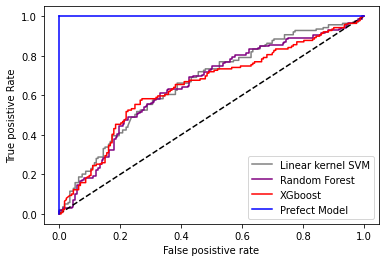

In [ ]:
fprA=[0.0, 0.00684931506849315, 0.0136986301369863, 0.0136986301369863, 0.02054794520547945, 0.02054794520547945, 0.0273972602739726, 0.0273972602739726, 0.03424657534246575, 0.03424657534246575, 0.0410958904109589, 0.0410958904109589, 0.04794520547945205, 0.04794520547945205, 0.0821917808219178, 0.0821917808219178, 0.0958904109589041, 0.0958904109589041, 0.10273972602739725, 0.10273972602739725, 0.1095890410958904, 0.1095890410958904, 0.11643835616438356, 0.11643835616438356, 0.1232876712328767, 0.1232876712328767, 0.136986301369863, 0.136986301369863, 0.1643835616438356, 0.1643835616438356, 0.17123287671232876, 0.17123287671232876, 0.1780821917808219, 0.1780821917808219, 0.18493150684931506, 0.18493150684931506, 0.19863013698630136, 0.19863013698630136, 0.2054794520547945, 0.2054794520547945, 0.21232876712328766, 0.21232876712328766, 0.2191780821917808, 0.2191780821917808, 0.22602739726027396, 0.22602739726027396, 0.2328767123287671, 0.2328767123287671, 0.23972602739726026, 0.23972602739726026, 0.2465753424657534, 0.2465753424657534, 0.2671232876712329, 0.2671232876712329, 0.273972602739726, 0.273972602739726, 0.2945205479452055, 0.2945205479452055, 0.3082191780821918, 0.3082191780821918, 0.3287671232876712, 0.3287671232876712, 0.3356164383561644, 0.3356164383561644, 0.3424657534246575, 0.3424657534246575, 0.3561643835616438, 0.3561643835616438, 0.3698630136986301, 0.3698630136986301, 0.3767123287671233, 0.3767123287671233, 0.3835616438356164, 0.3835616438356164, 0.3904109589041096, 0.3904109589041096, 0.410958904109589, 0.410958904109589, 0.4315068493150685, 0.4315068493150685, 0.4383561643835616, 0.4383561643835616, 0.4794520547945205, 0.4794520547945205, 0.4863013698630137, 0.4863013698630137, 0.4931506849315068, 0.4931506849315068, 0.5068493150684932, 0.5068493150684932, 0.5205479452054794, 0.5205479452054794, 0.5342465753424658, 0.5342465753424658, 0.5547945205479452, 0.5547945205479452, 0.5684931506849316, 0.5684931506849316, 0.589041095890411, 0.589041095890411, 0.6027397260273972, 0.6027397260273972, 0.6232876712328768, 0.6232876712328768, 0.6917808219178082, 0.6917808219178082, 0.7054794520547946, 0.7054794520547946, 0.7191780821917808, 0.7191780821917808, 0.7465753424657534, 0.7465753424657534, 0.8356164383561644, 0.8356164383561644, 0.8493150684931506, 0.8493150684931506, 0.8561643835616438, 0.8561643835616438, 0.863013698630137, 0.863013698630137, 0.8698630136986302, 0.8698630136986302, 0.9246575342465754, 0.9246575342465754, 0.9315068493150684, 0.9315068493150684, 0.9383561643835616, 0.9383561643835616, 0.9726027397260274, 0.9726027397260274, 1.0]
tprA=[0.0, 0.0, 0.0, 0.09448818897637795, 0.09448818897637795, 0.10236220472440945, 0.10236220472440945, 0.12598425196850394, 0.12598425196850394, 0.14173228346456693, 0.14173228346456693, 0.15748031496062992, 0.15748031496062992, 0.16535433070866143, 0.16535433070866143, 0.2125984251968504, 0.2125984251968504, 0.2204724409448819, 0.2204724409448819, 0.2283464566929134, 0.2283464566929134, 0.29133858267716534, 0.29133858267716534, 0.30708661417322836, 0.30708661417322836, 0.33070866141732286, 0.33070866141732286, 0.33858267716535434, 0.33858267716535434, 0.3464566929133858, 0.3464566929133858, 0.36220472440944884, 0.36220472440944884, 0.3937007874015748, 0.3937007874015748, 0.4330708661417323, 0.4330708661417323, 0.4566929133858268, 0.4566929133858268, 0.4645669291338583, 0.4645669291338583, 0.47244094488188976, 0.47244094488188976, 0.48031496062992124, 0.48031496062992124, 0.4881889763779528, 0.4881889763779528, 0.5039370078740157, 0.5039370078740157, 0.5196850393700787, 0.5196850393700787, 0.5433070866141733, 0.5433070866141733, 0.5590551181102362, 0.5590551181102362, 0.5669291338582677, 0.5669291338582677, 0.5748031496062992, 0.5748031496062992, 0.5905511811023622, 0.5905511811023622, 0.5984251968503937, 0.5984251968503937, 0.6062992125984252, 0.6062992125984252, 0.6141732283464567, 0.6141732283464567, 0.6220472440944882, 0.6220472440944882, 0.6535433070866141, 0.6535433070866141, 0.6692913385826772, 0.6692913385826772, 0.6771653543307087, 0.6771653543307087, 0.6850393700787402, 0.6850393700787402, 0.6929133858267716, 0.6929133858267716, 0.7007874015748031, 0.7007874015748031, 0.7086614173228346, 0.7086614173228346, 0.7165354330708661, 0.7165354330708661, 0.7244094488188977, 0.7244094488188977, 0.7480314960629921, 0.7480314960629921, 0.7559055118110236, 0.7559055118110236, 0.7637795275590551, 0.7637795275590551, 0.7716535433070866, 0.7716535433070866, 0.7795275590551181, 0.7795275590551181, 0.7874015748031497, 0.7874015748031497, 0.7952755905511811, 0.7952755905511811, 0.8188976377952756, 0.8188976377952756, 0.8267716535433071, 0.8267716535433071, 0.8346456692913385, 0.8346456692913385, 0.8740157480314961, 0.8740157480314961, 0.8818897637795275, 0.8818897637795275, 0.889763779527559, 0.889763779527559, 0.8976377952755905, 0.8976377952755905, 0.905511811023622, 0.905511811023622, 0.9212598425196851, 0.9212598425196851, 0.937007874015748, 0.937007874015748, 0.952755905511811, 0.952755905511811, 0.9606299212598425, 0.9606299212598425, 0.984251968503937, 0.984251968503937, 0.9921259842519685, 0.9921259842519685, 1.0, 1.0]
tpr2=[0.0, 0.007194244604316547, 0.014388489208633094, 0.014388489208633094, 0.02158273381294964, 0.02158273381294964, 0.02877697841726619, 0.02877697841726619, 0.03597122302158273, 0.03597122302158273, 0.07194244604316546, 0.07194244604316546, 0.10071942446043165, 0.10071942446043165, 0.14388489208633093, 0.14388489208633093, 0.16546762589928057, 0.16546762589928057, 0.17266187050359713, 0.17266187050359713, 0.17985611510791366, 0.17985611510791366, 0.19424460431654678, 0.19424460431654678, 0.22302158273381295, 0.22302158273381295, 0.2302158273381295, 0.2302158273381295, 0.2517985611510791, 0.2517985611510791, 0.2733812949640288, 0.2733812949640288, 0.2805755395683453, 0.2805755395683453, 0.28776978417266186, 0.28776978417266186, 0.3237410071942446, 0.3237410071942446, 0.381294964028777, 0.381294964028777, 0.38848920863309355, 0.38848920863309355, 0.4028776978417266, 0.4028776978417266, 0.4460431654676259, 0.4460431654676259, 0.45323741007194246, 0.45323741007194246, 0.4748201438848921, 0.4748201438848921, 0.4892086330935252, 0.4892086330935252, 0.5035971223021583, 0.5035971223021583, 0.5107913669064749, 0.5107913669064749, 0.5179856115107914, 0.5179856115107914, 0.5251798561151079, 0.5251798561151079, 0.539568345323741, 0.539568345323741, 0.5467625899280576, 0.5467625899280576, 0.5539568345323741, 0.5539568345323741, 0.5611510791366906, 0.5611510791366906, 0.5683453237410072, 0.5683453237410072, 0.5755395683453237, 0.5755395683453237, 0.5827338129496403, 0.5827338129496403, 0.6115107913669064, 0.6115107913669064, 0.6258992805755396, 0.6258992805755396, 0.6330935251798561, 0.6330935251798561, 0.6402877697841727, 0.6402877697841727, 0.6474820143884892, 0.6474820143884892, 0.6906474820143885, 0.6906474820143885, 0.697841726618705, 0.697841726618705, 0.7050359712230215, 0.7050359712230215, 0.7194244604316546, 0.7194244604316546, 0.7266187050359713, 0.7266187050359713, 0.7338129496402878, 0.7338129496402878, 0.7482014388489209, 0.7482014388489209, 0.762589928057554, 0.762589928057554, 0.7697841726618705, 0.7697841726618705, 0.7841726618705036, 0.7841726618705036, 0.7913669064748201, 0.7913669064748201, 0.8057553956834532, 0.8057553956834532, 0.8129496402877698, 0.8129496402877698, 0.8345323741007195, 0.8345323741007195, 0.841726618705036, 0.841726618705036, 0.8489208633093526, 0.8489208633093526, 0.8561151079136691, 0.8561151079136691, 0.8633093525179856, 0.8633093525179856, 0.8705035971223022, 0.8705035971223022, 0.8848920863309353, 0.8848920863309353, 0.8920863309352518, 0.8920863309352518, 0.9064748201438849, 0.9064748201438849, 0.9136690647482014, 0.9136690647482014, 0.920863309352518, 0.920863309352518, 0.9280575539568345, 0.9280575539568345, 0.935251798561151, 0.935251798561151, 0.9424460431654677, 0.9424460431654677, 0.9568345323741008, 0.9568345323741008, 0.9640287769784173, 0.9640287769784173, 0.9784172661870504, 0.9784172661870504, 0.9856115107913669, 0.9856115107913669, 1.0, 1.0]
fpr2=[0.0, 0.0, 0.0, 0.005780346820809248, 0.005780346820809248, 0.011560693641618497, 0.011560693641618497, 0.04046242774566474, 0.04046242774566474, 0.046242774566473986, 0.046242774566473986, 0.05202312138728324, 0.05202312138728324, 0.057803468208092484, 0.057803468208092484, 0.06936416184971098, 0.06936416184971098, 0.07514450867052024, 0.07514450867052024, 0.08092485549132948, 0.08092485549132948, 0.10982658959537572, 0.10982658959537572, 0.12138728323699421, 0.12138728323699421, 0.12716763005780346, 0.12716763005780346, 0.1329479768786127, 0.1329479768786127, 0.13872832369942195, 0.13872832369942195, 0.14450867052023122, 0.14450867052023122, 0.15028901734104047, 0.15028901734104047, 0.16184971098265896, 0.16184971098265896, 0.1791907514450867, 0.1791907514450867, 0.18497109826589594, 0.18497109826589594, 0.1907514450867052, 0.1907514450867052, 0.19653179190751446, 0.19653179190751446, 0.20809248554913296, 0.20809248554913296, 0.2138728323699422, 0.2138728323699422, 0.2254335260115607, 0.2254335260115607, 0.2543352601156069, 0.2543352601156069, 0.26011560693641617, 0.26011560693641617, 0.2658959537572254, 0.2658959537572254, 0.27167630057803466, 0.27167630057803466, 0.2774566473988439, 0.2774566473988439, 0.2832369942196532, 0.2832369942196532, 0.28901734104046245, 0.28901734104046245, 0.30057803468208094, 0.30057803468208094, 0.3063583815028902, 0.3063583815028902, 0.31213872832369943, 0.31213872832369943, 0.3179190751445087, 0.3179190751445087, 0.32947976878612717, 0.32947976878612717, 0.35260115606936415, 0.35260115606936415, 0.3583815028901734, 0.3583815028901734, 0.4046242774566474, 0.4046242774566474, 0.42196531791907516, 0.42196531791907516, 0.4277456647398844, 0.4277456647398844, 0.4393063583815029, 0.4393063583815029, 0.4682080924855491, 0.4682080924855491, 0.47398843930635837, 0.47398843930635837, 0.4913294797687861, 0.4913294797687861, 0.49710982658959535, 0.49710982658959535, 0.5028901734104047, 0.5028901734104047, 0.5375722543352601, 0.5375722543352601, 0.5433526011560693, 0.5433526011560693, 0.5606936416184971, 0.5606936416184971, 0.5664739884393064, 0.5664739884393064, 0.5780346820809249, 0.5780346820809249, 0.6127167630057804, 0.6127167630057804, 0.6242774566473989, 0.6242774566473989, 0.653179190751445, 0.653179190751445, 0.6589595375722543, 0.6589595375722543, 0.6878612716763006, 0.6878612716763006, 0.7341040462427746, 0.7341040462427746, 0.7398843930635838, 0.7398843930635838, 0.7456647398843931, 0.7456647398843931, 0.7514450867052023, 0.7514450867052023, 0.8323699421965318, 0.8323699421965318, 0.861271676300578, 0.861271676300578, 0.8728323699421965, 0.8728323699421965, 0.884393063583815, 0.884393063583815, 0.9190751445086706, 0.9190751445086706, 0.9248554913294798, 0.9248554913294798, 0.9421965317919075, 0.9421965317919075, 0.9479768786127167, 0.9479768786127167, 0.9710982658959537, 0.9710982658959537, 0.9826589595375722, 0.9826589595375722, 0.9942196531791907, 0.9942196531791907, 1.0]
fprD=[0.0, 0.0, 0.0, 0.017857142857142856, 0.017857142857142856, 0.03571428571428571, 0.03571428571428571, 0.05357142857142857, 0.05357142857142857, 0.06547619047619048, 0.06547619047619048, 0.07142857142857142, 0.07142857142857142, 0.08333333333333333, 0.08333333333333333, 0.08928571428571429, 0.08928571428571429, 0.09523809523809523, 0.09523809523809523, 0.10119047619047619, 0.10119047619047619, 0.10714285714285714, 0.10714285714285714, 0.125, 0.125, 0.13095238095238096, 0.13095238095238096, 0.13690476190476192, 0.13690476190476192, 0.14285714285714285, 0.14285714285714285, 0.1488095238095238, 0.1488095238095238, 0.15476190476190477, 0.15476190476190477, 0.17261904761904762, 0.17261904761904762, 0.18452380952380953, 0.18452380952380953, 0.19642857142857142, 0.19642857142857142, 0.20238095238095238, 0.20238095238095238, 0.20833333333333334, 0.20833333333333334, 0.21428571428571427, 0.21428571428571427, 0.23809523809523808, 0.23809523809523808, 0.24404761904761904, 0.24404761904761904, 0.25, 0.25, 0.25595238095238093, 0.25595238095238093, 0.2619047619047619, 0.2619047619047619, 0.26785714285714285, 0.26785714285714285, 0.27380952380952384, 0.27380952380952384, 0.2916666666666667, 0.2916666666666667, 0.2976190476190476, 0.2976190476190476, 0.35714285714285715, 0.35714285714285715, 0.3630952380952381, 0.3630952380952381, 0.375, 0.375, 0.3869047619047619, 0.3869047619047619, 0.39880952380952384, 0.39880952380952384, 0.40476190476190477, 0.40476190476190477, 0.49404761904761907, 0.49404761904761907, 0.5, 0.5, 0.5238095238095238, 0.5238095238095238, 0.5476190476190477, 0.5476190476190477, 0.5654761904761905, 0.5654761904761905, 0.5773809523809523, 0.5773809523809523, 0.5892857142857143, 0.5892857142857143, 0.6011904761904762, 0.6011904761904762, 0.6130952380952381, 0.6130952380952381, 0.6666666666666666, 0.6666666666666666, 0.6845238095238095, 0.6845238095238095, 0.7142857142857143, 0.7142857142857143, 0.7261904761904762, 0.7261904761904762, 0.7321428571428571, 0.7321428571428571, 0.7738095238095238, 0.7738095238095238, 0.7797619047619048, 0.7797619047619048, 0.7916666666666666, 0.7916666666666666, 0.8035714285714286, 0.8035714285714286, 0.8273809523809523, 0.8273809523809523, 0.8333333333333334, 0.8333333333333334, 0.8392857142857143, 0.8392857142857143, 0.8928571428571429, 0.8928571428571429, 0.9047619047619048, 0.9047619047619048, 0.9107142857142857, 0.9107142857142857, 0.9404761904761905, 0.9404761904761905, 0.9464285714285714, 0.9464285714285714, 0.9821428571428571, 0.9821428571428571, 1.0, 1.0]
tprD=[0.0, 0.007462686567164179, 0.022388059701492536, 0.022388059701492536, 0.029850746268656716, 0.029850746268656716, 0.03731343283582089, 0.03731343283582089, 0.05223880597014925, 0.05223880597014925, 0.05970149253731343, 0.05970149253731343, 0.06716417910447761, 0.06716417910447761, 0.08208955223880597, 0.08208955223880597, 0.11194029850746269, 0.11194029850746269, 0.1865671641791045, 0.1865671641791045, 0.19402985074626866, 0.19402985074626866, 0.208955223880597, 0.208955223880597, 0.21641791044776118, 0.21641791044776118, 0.2462686567164179, 0.2462686567164179, 0.2537313432835821, 0.2537313432835821, 0.26119402985074625, 0.26119402985074625, 0.27611940298507465, 0.27611940298507465, 0.29850746268656714, 0.29850746268656714, 0.31343283582089554, 0.31343283582089554, 0.3582089552238806, 0.3582089552238806, 0.3656716417910448, 0.3656716417910448, 0.3805970149253731, 0.3805970149253731, 0.3880597014925373, 0.3880597014925373, 0.39552238805970147, 0.39552238805970147, 0.417910447761194, 0.417910447761194, 0.4253731343283582, 0.4253731343283582, 0.43283582089552236, 0.43283582089552236, 0.4701492537313433, 0.4701492537313433, 0.47761194029850745, 0.47761194029850745, 0.5, 0.5, 0.5074626865671642, 0.5074626865671642, 0.5223880597014925, 0.5223880597014925, 0.5373134328358209, 0.5373134328358209, 0.5522388059701493, 0.5522388059701493, 0.5671641791044776, 0.5671641791044776, 0.5895522388059702, 0.5895522388059702, 0.5970149253731343, 0.5970149253731343, 0.6119402985074627, 0.6119402985074627, 0.6194029850746269, 0.6194029850746269, 0.6268656716417911, 0.6268656716417911, 0.6716417910447762, 0.6716417910447762, 0.6791044776119403, 0.6791044776119403, 0.6940298507462687, 0.6940298507462687, 0.7014925373134329, 0.7014925373134329, 0.7089552238805971, 0.7089552238805971, 0.7835820895522388, 0.7835820895522388, 0.7910447761194029, 0.7910447761194029, 0.7985074626865671, 0.7985074626865671, 0.8059701492537313, 0.8059701492537313, 0.8283582089552238, 0.8283582089552238, 0.8432835820895522, 0.8432835820895522, 0.8507462686567164, 0.8507462686567164, 0.8582089552238806, 0.8582089552238806, 0.8656716417910447, 0.8656716417910447, 0.8805970149253731, 0.8805970149253731, 0.8880597014925373, 0.8880597014925373, 0.9029850746268657, 0.9029850746268657, 0.9104477611940298, 0.9104477611940298, 0.917910447761194, 0.917910447761194, 0.9253731343283582, 0.9253731343283582, 0.9328358208955224, 0.9328358208955224, 0.9477611940298507, 0.9477611940298507, 0.9626865671641791, 0.9626865671641791, 0.9701492537313433, 0.9701492537313433, 0.9850746268656716, 0.9850746268656716, 0.9925373134328358, 0.9925373134328358, 1.0]
fprC=[0.0, 0.0, 0.0, 0.005780346820809248, 0.005780346820809248, 0.011560693641618497, 0.011560693641618497, 0.017341040462427744, 0.017341040462427744, 0.028901734104046242, 0.028901734104046242, 0.046242774566473986, 0.046242774566473986, 0.057803468208092484, 0.057803468208092484, 0.06358381502890173, 0.06358381502890173, 0.06936416184971098, 0.06936416184971098, 0.08092485549132948, 0.08092485549132948, 0.08670520231213873, 0.08670520231213873, 0.09248554913294797, 0.09248554913294797, 0.10404624277456648, 0.10404624277456648, 0.10982658959537572, 0.10982658959537572, 0.11560693641618497, 0.11560693641618497, 0.12716763005780346, 0.12716763005780346, 0.1329479768786127, 0.1329479768786127, 0.13872832369942195, 0.13872832369942195, 0.14450867052023122, 0.14450867052023122, 0.15606936416184972, 0.15606936416184972, 0.16184971098265896, 0.16184971098265896, 0.1676300578034682, 0.1676300578034682, 0.1791907514450867, 0.1791907514450867, 0.18497109826589594, 0.18497109826589594, 0.19653179190751446, 0.19653179190751446, 0.2023121387283237, 0.2023121387283237, 0.20809248554913296, 0.20809248554913296, 0.21965317919075145, 0.21965317919075145, 0.2254335260115607, 0.2254335260115607, 0.23121387283236994, 0.23121387283236994, 0.24277456647398843, 0.24277456647398843, 0.26011560693641617, 0.26011560693641617, 0.27167630057803466, 0.27167630057803466, 0.2832369942196532, 0.2832369942196532, 0.2947976878612717, 0.2947976878612717, 0.3063583815028902, 0.3063583815028902, 0.31213872832369943, 0.31213872832369943, 0.3236994219653179, 0.3236994219653179, 0.3352601156069364, 0.3352601156069364, 0.34104046242774566, 0.34104046242774566, 0.35260115606936415, 0.35260115606936415, 0.3930635838150289, 0.3930635838150289, 0.4046242774566474, 0.4046242774566474, 0.4161849710982659, 0.4161849710982659, 0.42196531791907516, 0.42196531791907516, 0.4393063583815029, 0.4393063583815029, 0.4624277456647399, 0.4624277456647399, 0.49710982658959535, 0.49710982658959535, 0.5028901734104047, 0.5028901734104047, 0.5086705202312138, 0.5086705202312138, 0.5260115606936416, 0.5260115606936416, 0.5375722543352601, 0.5375722543352601, 0.5433526011560693, 0.5433526011560693, 0.6011560693641619, 0.6011560693641619, 0.6184971098265896, 0.6184971098265896, 0.6242774566473989, 0.6242774566473989, 0.653179190751445, 0.653179190751445, 0.6647398843930635, 0.6647398843930635, 0.6705202312138728, 0.6705202312138728, 0.6763005780346821, 0.6763005780346821, 0.6878612716763006, 0.6878612716763006, 0.7109826589595376, 0.7109826589595376, 0.7861271676300579, 0.7861271676300579, 0.791907514450867, 0.791907514450867, 0.815028901734104, 0.815028901734104, 0.8208092485549133, 0.8208092485549133, 0.8554913294797688, 0.8554913294797688, 0.861271676300578, 0.861271676300578, 0.8670520231213873, 0.8670520231213873, 0.8728323699421965, 0.8728323699421965, 0.8901734104046243, 0.8901734104046243, 0.9075144508670521, 0.9075144508670521, 0.930635838150289, 0.930635838150289, 0.9595375722543352, 0.9595375722543352, 1.0, 1.0] 
tprC=[0.0, 0.007194244604316547, 0.014388489208633094, 0.014388489208633094, 0.050359712230215826, 0.050359712230215826, 0.05755395683453238, 0.05755395683453238, 0.06474820143884892, 0.06474820143884892, 0.07194244604316546, 0.07194244604316546, 0.1079136690647482, 0.1079136690647482, 0.1366906474820144, 0.1366906474820144, 0.14388489208633093, 0.14388489208633093, 0.15827338129496402, 0.15827338129496402, 0.16546762589928057, 0.16546762589928057, 0.18705035971223022, 0.18705035971223022, 0.19424460431654678, 0.19424460431654678, 0.2014388489208633, 0.2014388489208633, 0.2158273381294964, 0.2158273381294964, 0.22302158273381295, 0.22302158273381295, 0.2949640287769784, 0.2949640287769784, 0.3237410071942446, 0.3237410071942446, 0.3381294964028777, 0.3381294964028777, 0.3669064748201439, 0.3669064748201439, 0.37410071942446044, 0.37410071942446044, 0.381294964028777, 0.381294964028777, 0.4460431654676259, 0.4460431654676259, 0.45323741007194246, 0.45323741007194246, 0.460431654676259, 0.460431654676259, 0.4676258992805755, 0.4676258992805755, 0.48201438848920863, 0.48201438848920863, 0.4892086330935252, 0.4892086330935252, 0.5035971223021583, 0.5035971223021583, 0.5107913669064749, 0.5107913669064749, 0.539568345323741, 0.539568345323741, 0.5539568345323741, 0.5539568345323741, 0.5755395683453237, 0.5755395683453237, 0.5827338129496403, 0.5827338129496403, 0.5899280575539568, 0.5899280575539568, 0.5971223021582733, 0.5971223021582733, 0.60431654676259, 0.60431654676259, 0.6187050359712231, 0.6187050359712231, 0.6258992805755396, 0.6258992805755396, 0.6330935251798561, 0.6330935251798561, 0.6402877697841727, 0.6402877697841727, 0.6474820143884892, 0.6474820143884892, 0.6546762589928058, 0.6546762589928058, 0.6618705035971223, 0.6618705035971223, 0.6690647482014388, 0.6690647482014388, 0.6762589928057554, 0.6762589928057554, 0.6834532374100719, 0.6834532374100719, 0.6906474820143885, 0.6906474820143885, 0.697841726618705, 0.697841726618705, 0.7122302158273381, 0.7122302158273381, 0.7194244604316546, 0.7194244604316546, 0.7338129496402878, 0.7338129496402878, 0.7482014388489209, 0.7482014388489209, 0.762589928057554, 0.762589928057554, 0.7697841726618705, 0.7697841726618705, 0.7769784172661871, 0.7769784172661871, 0.7985611510791367, 0.7985611510791367, 0.8129496402877698, 0.8129496402877698, 0.8201438848920863, 0.8201438848920863, 0.8489208633093526, 0.8489208633093526, 0.8561151079136691, 0.8561151079136691, 0.8705035971223022, 0.8705035971223022, 0.8776978417266187, 0.8776978417266187, 0.8920863309352518, 0.8920863309352518, 0.8992805755395683, 0.8992805755395683, 0.9136690647482014, 0.9136690647482014, 0.920863309352518, 0.920863309352518, 0.935251798561151, 0.935251798561151, 0.9424460431654677, 0.9424460431654677, 0.9568345323741008, 0.9568345323741008, 0.9640287769784173, 0.9640287769784173, 0.9712230215827338, 0.9712230215827338, 0.9784172661870504, 0.9784172661870504, 0.9856115107913669, 0.9856115107913669, 0.9928057553956835, 0.9928057553956835, 1.0]
fprE=[0.0, 0.005780346820809248, 0.005780346820809248, 0.011560693641618497, 0.011560693641618497, 0.017341040462427744, 0.017341040462427744, 0.023121387283236993, 0.023121387283236993, 0.03468208092485549, 0.04046242774566474, 0.04046242774566474, 0.046242774566473986, 0.046242774566473986, 0.06358381502890173, 0.06358381502890173, 0.06936416184971098, 0.06936416184971098, 0.08670520231213873, 0.08670520231213873, 0.09248554913294797, 0.09826589595375723, 0.09826589595375723, 0.10404624277456648, 0.10404624277456648, 0.10982658959537572, 0.10982658959537572, 0.12138728323699421, 0.12138728323699421, 0.13872832369942195, 0.13872832369942195, 0.15028901734104047, 0.15028901734104047, 0.15028901734104047, 0.15028901734104047, 0.15606936416184972, 0.15606936416184972, 0.16184971098265896, 0.16184971098265896, 0.1676300578034682, 0.1676300578034682, 0.17341040462427745, 0.17341040462427745, 0.17341040462427745, 0.1791907514450867, 0.1791907514450867, 0.18497109826589594, 0.18497109826589594, 0.2023121387283237, 0.2023121387283237, 0.20809248554913296, 0.20809248554913296, 0.2138728323699422, 0.2138728323699422, 0.21965317919075145, 0.21965317919075145, 0.2254335260115607, 0.2254335260115607, 0.23699421965317918, 0.23699421965317918, 0.24855491329479767, 0.24855491329479767, 0.2658959537572254, 0.2658959537572254, 0.27167630057803466, 0.27167630057803466, 0.3179190751445087, 0.3179190751445087, 0.3236994219653179, 0.3236994219653179, 0.3468208092485549, 0.3468208092485549, 0.3583815028901734, 0.3583815028901734, 0.36416184971098264, 0.36416184971098264, 0.3699421965317919, 0.3699421965317919, 0.37572254335260113, 0.37572254335260113, 0.3815028901734104, 0.3815028901734104, 0.41040462427745666, 0.41040462427745666, 0.4277456647398844, 0.4277456647398844, 0.4624277456647399, 0.4624277456647399, 0.4797687861271676, 0.4797687861271676, 0.48554913294797686, 0.48554913294797686, 0.4913294797687861, 0.4913294797687861, 0.5028901734104047, 0.5086705202312138, 0.5086705202312138, 0.5202312138728323, 0.5202312138728323, 0.5664739884393064, 0.5664739884393064, 0.5953757225433526, 0.5953757225433526, 0.630057803468208, 0.630057803468208, 0.6358381502890174, 0.6358381502890174, 0.6416184971098265, 0.6416184971098265, 0.6647398843930635, 0.6647398843930635, 0.6705202312138728, 0.6705202312138728, 0.6820809248554913, 0.6820809248554913, 0.6994219653179191, 0.6994219653179191, 0.7052023121387283, 0.7052023121387283, 0.7109826589595376, 0.7109826589595376, 0.7514450867052023, 0.7514450867052023, 0.7630057803468208, 0.7630057803468208, 0.7687861271676301, 0.7687861271676301, 0.7803468208092486, 0.7803468208092486, 0.8034682080924855, 0.8034682080924855, 0.815028901734104, 0.8265895953757225, 0.8323699421965318, 0.8323699421965318, 0.838150289017341, 0.838150289017341, 0.8439306358381503, 0.8439306358381503, 0.8554913294797688, 0.8554913294797688, 0.861271676300578, 0.861271676300578, 0.8670520231213873, 0.8670520231213873, 0.884393063583815, 0.884393063583815, 0.8959537572254336, 0.8959537572254336, 0.9017341040462428, 0.9017341040462428, 0.9364161849710982, 0.9364161849710982, 0.953757225433526, 0.976878612716763, 0.976878612716763, 0.9884393063583815, 0.9884393063583815, 1.0]
tprE=[0.0, 0.0, 0.007194244604316547, 0.007194244604316547, 0.02158273381294964, 0.02158273381294964, 0.06474820143884892, 0.07194244604316546, 0.07913669064748201, 0.09352517985611511, 0.09352517985611511, 0.10071942446043165, 0.10071942446043165, 0.1223021582733813, 0.1223021582733813, 0.14388489208633093, 0.14388489208633093, 0.15827338129496402, 0.15827338129496402, 0.17985611510791366, 0.18705035971223022, 0.18705035971223022, 0.19424460431654678, 0.19424460431654678, 0.22302158273381295, 0.22302158273381295, 0.2446043165467626, 0.2446043165467626, 0.2517985611510791, 0.2517985611510791, 0.2589928057553957, 0.2589928057553957, 0.2733812949640288, 0.28776978417266186, 0.2949640287769784, 0.2949640287769784, 0.30935251798561153, 0.30935251798561153, 0.34532374100719426, 0.34532374100719426, 0.3597122302158273, 0.3597122302158273, 0.38848920863309355, 0.4028776978417266, 0.4028776978417266, 0.4316546762589928, 0.4316546762589928, 0.45323741007194246, 0.45323741007194246, 0.460431654676259, 0.460431654676259, 0.4676258992805755, 0.4676258992805755, 0.4748201438848921, 0.48201438848920863, 0.5179856115107914, 0.5179856115107914, 0.5251798561151079, 0.5251798561151079, 0.5323741007194245, 0.5323741007194245, 0.5539568345323741, 0.5539568345323741, 0.5755395683453237, 0.5755395683453237, 0.5827338129496403, 0.5827338129496403, 0.5899280575539568, 0.5899280575539568, 0.5971223021582733, 0.5971223021582733, 0.60431654676259, 0.60431654676259, 0.6187050359712231, 0.6187050359712231, 0.6258992805755396, 0.6258992805755396, 0.6330935251798561, 0.6330935251798561, 0.6402877697841727, 0.6402877697841727, 0.6546762589928058, 0.6546762589928058, 0.6690647482014388, 0.6690647482014388, 0.6762589928057554, 0.6762589928057554, 0.6834532374100719, 0.6834532374100719, 0.697841726618705, 0.697841726618705, 0.7122302158273381, 0.7122302158273381, 0.7194244604316546, 0.7194244604316546, 0.7194244604316546, 0.7266187050359713, 0.7266187050359713, 0.7338129496402878, 0.7338129496402878, 0.7410071942446043, 0.7410071942446043, 0.7482014388489209, 0.7482014388489209, 0.7553956834532374, 0.7553956834532374, 0.762589928057554, 0.762589928057554, 0.7697841726618705, 0.7697841726618705, 0.7841726618705036, 0.7841726618705036, 0.7913669064748201, 0.7913669064748201, 0.8057553956834532, 0.8057553956834532, 0.8129496402877698, 0.8201438848920863, 0.8273381294964028, 0.8273381294964028, 0.8345323741007195, 0.8345323741007195, 0.841726618705036, 0.841726618705036, 0.8489208633093526, 0.8489208633093526, 0.8561151079136691, 0.8561151079136691, 0.8705035971223022, 0.8705035971223022, 0.8776978417266187, 0.8776978417266187, 0.8776978417266187, 0.8776978417266187, 0.8848920863309353, 0.8848920863309353, 0.8920863309352518, 0.8920863309352518, 0.8992805755395683, 0.8992805755395683, 0.9064748201438849, 0.9064748201438849, 0.9136690647482014, 0.9136690647482014, 0.920863309352518, 0.920863309352518, 0.9280575539568345, 0.9280575539568345, 0.935251798561151, 0.935251798561151, 0.9424460431654677, 0.9424460431654677, 0.9568345323741008, 0.9640287769784173, 0.9640287769784173, 0.9712230215827338, 0.9784172661870504, 0.9928057553956835, 1.0]
fprF=[0.0, 0.0, 0.0, 0.011560693641618497, 0.011560693641618497, 0.017341040462427744, 0.017341040462427744, 0.028901734104046242, 0.028901734104046242, 0.03468208092485549, 0.03468208092485549, 0.046242774566473986, 0.046242774566473986, 0.05202312138728324, 0.05202312138728324, 0.06358381502890173, 0.06358381502890173, 0.07514450867052024, 0.07514450867052024, 0.08670520231213873, 0.08670520231213873, 0.10404624277456648, 0.10404624277456648, 0.10982658959537572, 0.10982658959537572, 0.11560693641618497, 0.11560693641618497, 0.12138728323699421, 0.12138728323699421, 0.12716763005780346, 0.12716763005780346, 0.14450867052023122, 0.14450867052023122, 0.15028901734104047, 0.15028901734104047, 0.16184971098265896, 0.16184971098265896, 0.1676300578034682, 0.1676300578034682, 0.17341040462427745, 0.17341040462427745, 0.19653179190751446, 0.19653179190751446, 0.20809248554913296, 0.20809248554913296, 0.21965317919075145, 0.21965317919075145, 0.2254335260115607, 0.2254335260115607, 0.23699421965317918, 0.24855491329479767, 0.24855491329479767, 0.2543352601156069, 0.2543352601156069, 0.2658959537572254, 0.2658959537572254, 0.28901734104046245, 0.28901734104046245, 0.3063583815028902, 0.3063583815028902, 0.31213872832369943, 0.31213872832369943, 0.34104046242774566, 0.34104046242774566, 0.3468208092485549, 0.3468208092485549, 0.3815028901734104, 0.3815028901734104, 0.3872832369942196, 0.3872832369942196, 0.4277456647398844, 0.4277456647398844, 0.43352601156069365, 0.43352601156069365, 0.4508670520231214, 0.4508670520231214, 0.45664739884393063, 0.45664739884393063, 0.47398843930635837, 0.47398843930635837, 0.4797687861271676, 0.4797687861271676, 0.5260115606936416, 0.5260115606936416, 0.5722543352601156, 0.5722543352601156, 0.5895953757225434, 0.5895953757225434, 0.630057803468208, 0.630057803468208, 0.6358381502890174, 0.6358381502890174, 0.6589595375722543, 0.6589595375722543, 0.6763005780346821, 0.6763005780346821, 0.6820809248554913, 0.6820809248554913, 0.6994219653179191, 0.6994219653179191, 0.7052023121387283, 0.7052023121387283, 0.7398843930635838, 0.7398843930635838, 0.7687861271676301, 0.7687861271676301, 0.7745664739884393, 0.7745664739884393, 0.8439306358381503, 0.8439306358381503, 0.8670520231213873, 0.8670520231213873, 0.884393063583815, 0.884393063583815, 0.930635838150289, 0.930635838150289, 0.9653179190751445, 0.9653179190751445, 0.9826589595375722, 0.9826589595375722, 0.9942196531791907, 0.9942196531791907, 1.0]
tprF=[0.0, 0.007194244604316547, 0.02158273381294964, 0.02158273381294964, 0.03597122302158273, 0.03597122302158273, 0.050359712230215826, 0.050359712230215826, 0.05755395683453238, 0.05755395683453238, 0.11510791366906475, 0.11510791366906475, 0.12949640287769784, 0.12949640287769784, 0.15827338129496402, 0.15827338129496402, 0.18705035971223022, 0.18705035971223022, 0.2014388489208633, 0.2014388489208633, 0.2158273381294964, 0.2158273381294964, 0.2302158273381295, 0.2302158273381295, 0.2446043165467626, 0.2446043165467626, 0.2589928057553957, 0.2589928057553957, 0.2805755395683453, 0.2805755395683453, 0.28776978417266186, 0.28776978417266186, 0.33093525179856115, 0.33093525179856115, 0.3381294964028777, 0.3381294964028777, 0.35251798561151076, 0.35251798561151076, 0.3669064748201439, 0.3669064748201439, 0.39568345323741005, 0.39568345323741005, 0.41007194244604317, 0.41007194244604317, 0.4244604316546763, 0.4244604316546763, 0.43884892086330934, 0.43884892086330934, 0.4460431654676259, 0.4892086330935252, 0.4892086330935252, 0.5035971223021583, 0.5035971223021583, 0.5179856115107914, 0.5179856115107914, 0.5251798561151079, 0.5251798561151079, 0.5539568345323741, 0.5539568345323741, 0.5755395683453237, 0.5755395683453237, 0.5827338129496403, 0.5827338129496403, 0.5971223021582733, 0.5971223021582733, 0.60431654676259, 0.60431654676259, 0.6258992805755396, 0.6258992805755396, 0.6618705035971223, 0.6618705035971223, 0.6690647482014388, 0.6690647482014388, 0.6906474820143885, 0.6906474820143885, 0.697841726618705, 0.697841726618705, 0.7194244604316546, 0.7194244604316546, 0.7266187050359713, 0.7266187050359713, 0.7338129496402878, 0.7338129496402878, 0.7697841726618705, 0.7697841726618705, 0.7769784172661871, 0.7769784172661871, 0.7913669064748201, 0.7913669064748201, 0.8201438848920863, 0.8201438848920863, 0.8345323741007195, 0.8345323741007195, 0.8489208633093526, 0.8489208633093526, 0.8561151079136691, 0.8561151079136691, 0.8633093525179856, 0.8633093525179856, 0.8776978417266187, 0.8776978417266187, 0.8848920863309353, 0.8848920863309353, 0.9064748201438849, 0.9064748201438849, 0.920863309352518, 0.920863309352518, 0.9280575539568345, 0.9280575539568345, 0.935251798561151, 0.935251798561151, 0.9424460431654677, 0.9424460431654677, 0.9568345323741008, 0.9568345323741008, 0.9640287769784173, 0.9640287769784173, 0.9712230215827338, 0.9712230215827338, 0.9856115107913669, 0.9856115107913669, 1.0, 1.0]
plt.plot(fprF,tprF,color='grey',label="Linear kernel SVM")
plt.plot(fpr2,tpr2,color='purple',label= "Random Forest")
plt.plot([0,1],[0,1], 'k--')
plt.plot(fprE,tprE,label='XGboost',color='r')
plt.plot([0,0],[0,1], '-',color='b')
#plt.plot(fpr1, tpr1, label= "Random Froest:10% Outliers 80 Accuracy",color='r')
#plt.plot(fprD,tprD,color='teal',label= "Random Froest:2% Outliers 70 Accuracy")
#plt.plot(fprC,tprC,color='peru',label= "Random Froest:Hyperparameter Tun")
plt.plot([0,1],[1,1], '-',color='b',label='Prefect Model')
plt.xlabel('False posistive rate')
plt.ylabel('True posistive Rate')
plt.legend()
plt.show()

#### below are the experiment for accuracy equal and above 70%

data=pd.read_csv('data.csv')
data.info()
data.head()

In [ ]:
'''Step 2 Missing value'''
#-1 means did not select an answer in the questions so we need check all the -1 values in the Q1-Q32

def OutlierCheck(data,Question,OtherV):
    '''
    #Inputs:
    #the data and number of question interesting
    #use OtherV to check if there are other values other than -1 and 1 to 5
     
    #Returns:
    #Two list: MissingValue is the position of the data rather than 1-5
    #CorrespodingQuestion is the column for that missing value
    '''
    MissingValue=[]
    CorrespodingQuestion=[]
    OtherValue=[]
    for i in range(1,Question+1):
        Q='Q'
        Qdata=data[Q+str(i)]
        Qdata=np.array(Qdata)
        Qlist=[1.0,2.0,3.0,4.0,5.0]
        count=0
        for j in range(len(Qdata)):
            if Qdata[j] not in Qlist:
                if Qdata[j]!=-1:
                    OtherValue.append(Qdata[j])
                MissingValue.append(j)
                CorrespodingQuestion.append(i)
            else:
                count+=1
            j+=1
        i=i+1
    if OtherV:
        return MissingValue,CorrespodingQuestion,OtherValue
    else:
        return MissingValue,CorrespodingQuestion
        
    

Numpydata1=np.array(data)#transfer the format of the data to numpy array 

print('The missing value is :',OutlierCheck(data,32,False))#should have no other value rather than -1 and 1 to 5 
#this will gives the missing data position
print('The Q data that witout an answer :',Numpydata1[773,4])#just double check 

print(np.shape(Numpydata1))#total of size 1071 datas and 39 columns
mean=data.describe().loc['mean']#39 columns means 
SumData=[element*1071 for element in mean]
Qmean=SumData[0:32] # we only need the first 32 columns 
#since this summation contains -1 in the data we first work out how many -1 
#say m here in each of the question's data
#then we take mean- m*(-1) divided by (1071-m) and round up to nerest integer as an input for our missing values (-1's)
#we want replace the missing values by the mean value 

MissingValue1,CorrespodingQ1=OutlierCheck(data,32,False)
df = pd.DataFrame({'freq':CorrespodingQ1})
Mvalues=list(df['freq'].value_counts().sort_index())#work out how many -1 it has for each of the Question
print('How many missing values the individual variable contains :',Mvalues)
print(len(Mvalues))
print(Qmean)
QnewMean=[]
for i in range(len(Mvalues)):
    if Mvalues[i]==0:
        QnewMean.append(round(Qmean[i]/1071))
    else:
        QnewMean.append(round((Qmean[i]-Mvalues[i]*(-1))/(1071-Mvalues[i])))#mean value and round to nearest integer

print('The length should be 32 and the correspoding mean values ')
print(len(QnewMean),QnewMean) # the length should be 32 since we have 32 question
#Then replace each -1's to the correspoding Question new mean value
for i in range(len(MissingValue1)):
    Numpydata1[MissingValue1[i],CorrespodingQ1[i]-1]=QnewMean[CorrespodingQ1[i]-1]#change the -1 by correspoding round up mean values
print('The Q data that witout an answer :',Numpydata1[773,4])

In [ ]:
#so now there should be no missing values in Q1-Q32
#Let change back to dataframe 
column=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20'
         ,'Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31','Q32']
QuestionData=pd.DataFrame(Numpydata1[:,0:32],columns=column)
print(('The new missing value check :',OutlierCheck(QuestionData,32,False)))#check so no other value that are not in scale 
print(QuestionData.head(5))#should be okay we know calculate the affiliative,seltenhacing, agressive and self defeating

In [ ]:
#we now use Q1-Q32 to calculate the affiliative,self-enhacing,aggressive,self-defeating variables and save it as a new column
#to QuestionData
def affiliativeV(Data):
    return round(((6-Data['Q1'])+Data['Q5']+(6-Data['Q9'])+Data['Q13']+(6-Data['Q17'])+Data['Q21']+(6-Data['Q25'])+(6-Data['Q29']))/8,1)


def selfenhacingV(Data):
    return round((Data['Q2']+Data['Q6']+Data['Q10']+Data['Q14']+Data['Q18']+Data['Q22']+Data['Q26']+Data['Q30'])/8,1)

def aggressiveV(Data):
    return round((Data['Q3']+Data['Q7']+Data['Q11']+Data['Q15']+Data['Q19']+Data['Q23']+Data['Q27']+Data['Q31'])/8,1)

def selfdefeatingV(Data):
    return round((Data['Q4']+Data['Q8']+Data['Q12']+Data['Q16']+Data['Q20']+Data['Q24']+Data['Q28']+Data['Q32'])/8,1)

QuestionData['affiliative']=QuestionData.apply(lambda Data:affiliativeV(Data),axis=1)
QuestionData['selfenhacing']=QuestionData.apply(lambda Data:selfenhacingV(Data),axis=1)
QuestionData['aggressive']=QuestionData.apply(lambda Data:aggressiveV(Data),axis=1)
QuestionData['selfdefeating']=QuestionData.apply(lambda Data:selfdefeatingV(Data),axis=1)

QuestionData.head()#let check if the value has been calculated 

In [ ]:
#now add the other variables age, accuracy and sex .
OriginalData=pd.read_csv('data.csv')

QuestionData['age']=OriginalData['age']
QuestionData['gender']=OriginalData['gender']
QuestionData['accuracy']=OriginalData['accuracy']

In [ ]:
print('The missing value is :',OutlierCheck(QuestionData,32,False))#should have no other value rather than -1 and 1 to 5 

In [ ]:
'For age and accuracy running Isolation Tree for outlier check'
#use outlier detection for isolation forest.
FdimData=QuestionData[['age','accuracy']].copy()
X=FdimData.values
DetectionModel=IsolationForest(contamination=0.02)
DetectionModel.fit(X)
pred=DetectionModel.predict(X)
data=QuestionData.copy()
data['IF']=pd.Series(pred)
position=np.where(pred<0)
print(data['IF'].value_counts())
print(position,np.shape(position))
plt.figure()
plt.plot(X[:,0][np.where(pred==-1)],X[:,1][np.where(pred==-1)],'b<',\
    X[:,0][np.where(pred==1)],X[:,1][np.where(pred==1)],'ro')
plt.xlabel('Age')
plt.ylabel('Accuracy')
plt.title('Outlier Detection for Age and Accuracy')
plt.xscale('log')
plt.show()
#for better visualization we need see the log scale
[23,27,33,51,183,293,303,344,434,632,957]

In [ ]:
#Accuracy less than 70%
Accuracy=QuestionData['accuracy']
Accuracy=np.array(Accuracy)
outlierlist1=[]
value1=[]
count=-1
Accuracy=np.array(Accuracy)
for i in range(len(Accuracy)):
    if Accuracy[i]<70:
        count=count+1
        outlierlist1.append(i)
        value1.append(Accuracy[i])
        if len(outlierlist1)==1:
            Accuracy2=np.delete(Accuracy,i)
        else:
            Accuracy2=np.delete(Accuracy2,i-count)

print('The idex are: ',outlierlist1)
print('Correspoding accuracy values',value1)
print(len(value1))
plt.hist(Accuracy2,bins=20,color='blue')
plt.title('Histogram for feature Accuracy with accuracy above 60%')
plt.show()
[23,33,183,293,303,344,501,632,704,813,957]

In [ ]:
QuestionData70=QuestionData.copy()#now generate a new dataset with accuracy above 70 

In [ ]:
#get the unknow data for train later all 0's
AgeOutliers=QuestionData70.iloc[[23,33,183,293,303,344,501,632,704,957],:]
AgeOutliers.index=range(len(AgeOutliers.index))
AgeOutliers#save for later use 

In [ ]:
QuestionData70=QuestionData70.drop([23,33,183,293,303,344,501,632,704,957],0,inplace=False)
QuestionData70

In [ ]:
#Drop the age outliers
QuestionData70=QuestionData70.drop([5, 6, 44, 51, 69, 106, 119, 169, 272, 273, 274, 277, 278, 283, 304, 309, 317, 330, 362, 413, 434, 438, 462, 486, 542, 552, 611, 636, 640, 653, 667, 671, 805, 813, 825, 834, 858, 861, 873, 876, 897, 950, 977, 992, 997, 1001, 1006, 1015, 1020, 1024, 1025, 1035, 1050],0,inplace=False)

QuestionData70

In [ ]:
# now let use regression to predict those age values 
ydd=QuestionData70.iloc[:,36]
Xdd=QuestionData70.iloc[:,:-4]
Xdd['accuracy']=QuestionData70['accuracy']
test=AgeOutliers.iloc[:,:-4]
test['accuracy']=AgeOutliers['accuracy']
#linear regression
LinearR=LinearRegression().fit(Xdd,ydd)
Y_pred=LinearR.predict(Xdd)
LinearError=mean_squared_error(ydd,Y_pred,squared=False)
MeanError=mean_squared_error(ydd,[ydd.mean()]*len(ydd),squared=False)
MedianError=mean_squared_error(ydd, [ydd.median()]*len(ydd), squared=False)
#Ridge
RidgeR=linear_model.Lasso(alpha=0.1).fit(Xdd,ydd)
Y_predRidge=RidgeR.predict(Xdd)
RidgeError=mean_squared_error(ydd,Y_predRidge,squared=False)

#lasso
LassoR=linear_model.Lasso(alpha=0.1).fit(Xdd,ydd)
Y_predLasso=LassoR.predict(Xdd)
LassoError=mean_squared_error(ydd,Y_predLasso,squared=False)

fig = px.bar(x=["Linear","Mean","Median","Lasso","Ridge"], 
             y=[LinearError,MeanError,MedianError,LassoError,RidgeError],
             title="Regression errors",
             labels={"y": "Error","x": "Regression method"})
fig.add_hline(y=min([LinearError,MeanError,MedianError,LassoError,RidgeError]))
fig.show()

'''
All regression methods perform slightly better than using median/mean as replacements.

Among all regression methods, Linear and Ridge achieved the lowest errors (however, the difference between all regression error is very small).

We will use the prediction of the Linear model.
'''

AgePred=LinearR.predict(test)
AgeOutliers['age']=np.round(AgePred)
AgeOutliers

In [ ]:
#append to our dataset
QuestionData70=QuestionData70.append(AgeOutliers)
QuestionData70.index=range(len(QuestionData70.index))
QuestionData70

In [ ]:
'Let move on to gender data'

GenderData=QuestionData70['gender']
GenderData=np.array(GenderData)
GenderList=[1.0,2.0,3.0]
count=0
cvalues=[]
unknowPosition=[]
for i in range(len(GenderData)):
    if GenderData[i] not in GenderList:
        unknowPosition.append(i)
        cvalues.append(GenderData[i])
    else:
        count+=1
print('we have 5 outliers which with value 0s')
print('Let set those to class unknow first ')
print(count)#should be 1071-outliers so the data are in correct format   
GenderData2=QuestionData70['gender'].value_counts().sort_index()
GenderDict={'Unknow':GenderData2[0],'Male':GenderData2[1],'Female':GenderData2[2],'Other':GenderData2[3]}
#we creat a new index for 0's Unknow
fig2=plt.figure(figsize=(8,5))
print(GenderDict)
Gender=list(GenderDict.keys())
value=list(GenderDict.values())

def addlabels2plot(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(Gender,value,color='Green',width=0.69)
addlabels2plot(Gender,value)
plt.xlabel('Genders')
plt.ylabel('Total Number of cases')
plt.title('Elements for each gender')
fig2.show()

print('The position for that outlier is :',unknowPosition)
print('The coreespoding value is :,',cvalues)
#print(QuestionData60.iloc[822,32:39])

In [ ]:
Data70=QuestionData70.copy()

In [ ]:
Data70=QuestionData70.drop([144, 591, 794, 797, 1017],0,inplace=False)
Data70.index=range(len(Data70.index))

In [ ]:
Data70['gender'].replace(1,'male',inplace=True)
Data70['gender'].replace(2,'female',inplace=True)
Data70['gender'].replace(3,'other',inplace=True)
Data70

In [ ]:
#get the unknow data for train later all 0's
UnknowData60=QuestionData70.iloc[[144, 591, 794, 797, 1017],:]
UnknowData60.index=range(len(UnknowData60.index))
UnknowData60#save for later use 

In [ ]:
#to check the position of 'other' class and get rid of it 
GenderData=Data70['gender']
GenderData=np.array(GenderData)
GenderList=['female','male']
count=0
cvalues=[]
unknowPosition=[]
for i in range(len(GenderData)):
    if GenderData[i] not in GenderList:
        unknowPosition.append(i)
        cvalues.append(GenderData[i])
    else:
        count+=1
print('we have 8 outliers which with string other')
print('Let set those to class unknow first ')
print(count)

print('The position for that outlier is :',unknowPosition)
print('The coreespoding value is :,',cvalues)
print(Data70.iloc[130,37])

OtherData70=Data70.iloc[[128, 188, 205, 444, 524, 710, 780, 796],:]
OtherData70.index=range(len(OtherData70.index))
OtherData70#save for later use 

In [ ]:
Data70=Data70.drop([128, 188, 205, 444, 524, 710, 780, 796],0,inplace=False)#drop the 'other' data in gender
Data70.index=range(len(Data70.index))
Data70

In [ ]:
Data70['gender'].replace('male',0,inplace=True)
Data70['gender'].replace('female',1,inplace=True)
NewData60=Data70.filter(['Q7', 'Q11', 'Q15', 'Q20', 'affiliative', 'selfenhacing', 'aggressive',
       'selfdefeating', 'age', 'accuracy'],axis=1)
Poly=PolynomialFeatures(degree=2,interaction_only=True)
PolyData=Poly.fit_transform(NewData60)
print(np.shape(PolyData))
Poly.get_feature_names_out(NewData60.columns)# a list of names 
FeatureData=PolyData[:,1:56]
TargetData=Data70.iloc[:,37]
TargetData
FeatureData

In [ ]:
#Train test, split
#Is a binary classification which we want test the gender to be male or female
Xtrain,Xtest,Ytrain,Ytest=train_test_split(FeatureData,TargetData,test_size=0.3,random_state=2021)
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)
Ytrain

In [ ]:
#creat a random froest classification  n_estimators is the number of the decision tree,we choose 100; max_features
rf_model=RandomForestClassifier(n_estimators=44,criterion='gini',max_depth=5,min_samples_split=2)
#train and evl
rf_model.fit(Xtrain,Ytrain)
y_test_pred=rf_model.predict(Xtest)
y_train_pred=rf_model.predict(Xtrain)
TestProbability=rf_model.predict_proba(Xtest)[:,1] 
TestProbabilityTrain=rf_model.predict_proba(Xtrain)[:,1] 
fpr1,tpr1,thresholds=roc_curve(Ytest,TestProbability)
print('AUC test = {:.5f}'.format(roc_auc_score(Ytest, TestProbability)))
print('AUC train = {:.5f}'.format(roc_auc_score(Ytrain, TestProbabilityTrain)))
print(sum(y_test_pred==Ytest)/len(Ytest))
print(sum(y_train_pred==Ytrain)/len(Ytrain))
print(confusion_matrix(Ytest, y_test_pred))
print(classification_report(Ytest, y_test_pred))